In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from matplotlib import cm


file_path = os.path.join("elcinema.csv")
df = pd.read_csv(file_path, index_col=0)
df

YEAR     TYPE  GENRES                  TITLE
ID                                                   
2068747  2020     play     NaN              الأسانسير
2068064  2020    short   short        kabl El khamsen
2067919  2020  program     NaN         Thursday Night
2067348  2020   series  comedy                Elamara
2067115  2020    movie  horror                  Virus
...       ...      ...     ...                    ...
2037454  2000   series  comedy      Nas min zaman fat
2024781  2000   series   drama   Alssafina W Alrrbban
2034034  2000   series     NaN     albahs an el saada
1005775  2000    movie   drama  Wehyat Alby Wa Afraho
2024922  2000   series     NaN             الجحيم رجل

[4133 rows x 4 columns]

In [2]:
# Checking to see if any indices are duplicated
vals,counts = np.unique(df.index, return_counts=True)

print(np.sum(counts>1))

314


In [3]:
df[df.index.duplicated(keep=False)] # Analyze repeated indices: same info or not?

YEAR    TYPE                  GENRES              TITLE
ID                                                              
2042971  2020    play                     NaN        حب رايح جاي
2042971  2020    play                     NaN        حب رايح جاي
2034512  2019    play                     NaN          حمام الست
1576496  2019   radio                  comedy     عيلة الفرطوغلي
2006065  2019  series            action,drama             Zelzal
...       ...     ...                     ...                ...
1064359  2000  series                     NaN     شقاوه كومبيوتر
2022292  2000  series                   drama      Suq Alrrejala
2024674  2000  series                     NaN      Bakkar Part 3
1636109  2000  series  mystery,thriller,crime         الجاني مين
2037454  2000  series                  comedy  Nas min zaman fat

[685 rows x 4 columns]

In [4]:
df = df.groupby(df.index).first() # Drop repeated indices
df

YEAR     TYPE           GENRES                   TITLE
ID                                                             
1000035  2007    movie     action,drama         Amaleyat Khassa
1000038  2007    movie            drama  Youth in the Forbidden
1000154  2009     play             None       سي علي وتابعه قفة
1000225  2003    movie           comedy              Film Hindi
1000275  2004    movie             None         'Ahlaa al'awqat
...       ...      ...              ...                     ...
2068355  2016  program  thriller,comedy               ميني داعش
2068394  2018    movie            short                 Contact
2068702  2009    movie      documentary    Shaheen Leh episodes
2068703  2002    movie      documentary            September 11
2068747  2020     play             None               الأسانسير

[3762 rows x 4 columns]

In [5]:
#checks which columns have NaN values
df.isnull().any()

YEAR      False
TYPE      False
GENRES     True
TITLE     False
dtype: bool

In [6]:
#replaces NaN values with "none"
df['GENRES'] = df['GENRES'].replace(np.nan, "none")
df

YEAR     TYPE           GENRES                   TITLE
ID                                                             
1000035  2007    movie     action,drama         Amaleyat Khassa
1000038  2007    movie            drama  Youth in the Forbidden
1000154  2009     play             none       سي علي وتابعه قفة
1000225  2003    movie           comedy              Film Hindi
1000275  2004    movie             none         'Ahlaa al'awqat
...       ...      ...              ...                     ...
2068355  2016  program  thriller,comedy               ميني داعش
2068394  2018    movie            short                 Contact
2068702  2009    movie      documentary    Shaheen Leh episodes
2068703  2002    movie      documentary            September 11
2068747  2020     play             none               الأسانسير

[3762 rows x 4 columns]

In [7]:
# Replacing typo in "seriesb" with (assumed) correct value
df['TYPE'] = df['TYPE'].replace("seriesb", "series")

In [8]:
# Creating new DataFrame with dummy variables for each genre
x = df.GENRES.str.split(',', expand=True).stack().to_frame('GENRES')
cleaned = pd.get_dummies(x, columns=['GENRES']).groupby(level=0).sum()
cleaned.columns = cleaned.columns.str.lstrip("GENRES_")
df_new = pd.merge(left=df, right=cleaned, left_on=df.index, right_on=cleaned.index).set_index('key_0')
df_new

YEAR     TYPE           GENRES                   TITLE  action  \
key_0                                                                     
1000035  2007    movie     action,drama         Amaleyat Khassa       1   
1000038  2007    movie            drama  Youth in the Forbidden       0   
1000154  2009     play             none       سي علي وتابعه قفة       0   
1000225  2003    movie           comedy              Film Hindi       0   
1000275  2004    movie             none         'Ahlaa al'awqat       0   
...       ...      ...              ...                     ...     ...   
2068355  2016  program  thriller,comedy               ميني داعش       0   
2068394  2018    movie            short                 Contact       0   
2068702  2009    movie      documentary    Shaheen Leh episodes       0   
2068703  2002    movie      documentary            September 11       0   
2068747  2020     play             none               الأسانسير       0   

         adventure  animation  biography  comedy  crime  ...  musical  \
key_0                                                    ...            
1000035          0          0          0       0      0  ...        0   
1000038          0          0          0       0      0  ...        0   
1000154          0          0          0       0      0  ...        0   
1000225          0          0          0       1      0  ...        0   
1000275          0          0          0       0      0  ...        0   
...            ...        ...        ...     ...    ...  ...      ...   
2068355          0          0          0       1      0  ...        0   
2068394          0          0          0       0      0  ...        0   
2068702          0          0          0       0      0  ...        0   
2068703          0          0          0       0      0  ...        0   
2068747          0          0          0       0      0  ...        0   

         mystery  none  religious  romance  science fiction  short  sport  \
key_0                                                                       
1000035        0     0          0        0                0      0      0   
1000038        0     0          0        0                0      0      0   
1000154        0     1          0        0                0      0      0   
1000225        0     0          0        0                0      0      0   
1000275        0     1          0        0                0      0      0   
...          ...   ...        ...      ...              ...    ...    ...   
2068355        0     0          0        0                0      0      0   
2068394        0     0          0        0                0      1      0   
2068702        0     0          0        0                0      0      0   
2068703        0     0          0        0                0      0      0   
2068747        0     1          0        0                0      0      0   

         thriller  war  
key_0                   
1000035         0    0  
1000038         0    0  
1000154         0    0  
1000225         0    0  
1000275         0    0  
...           ...  ...  
2068355         1    0  
2068394         0    0  
2068702         0    0  
2068703         0    0  
2068747         0    0  

[3762 rows x 26 columns]

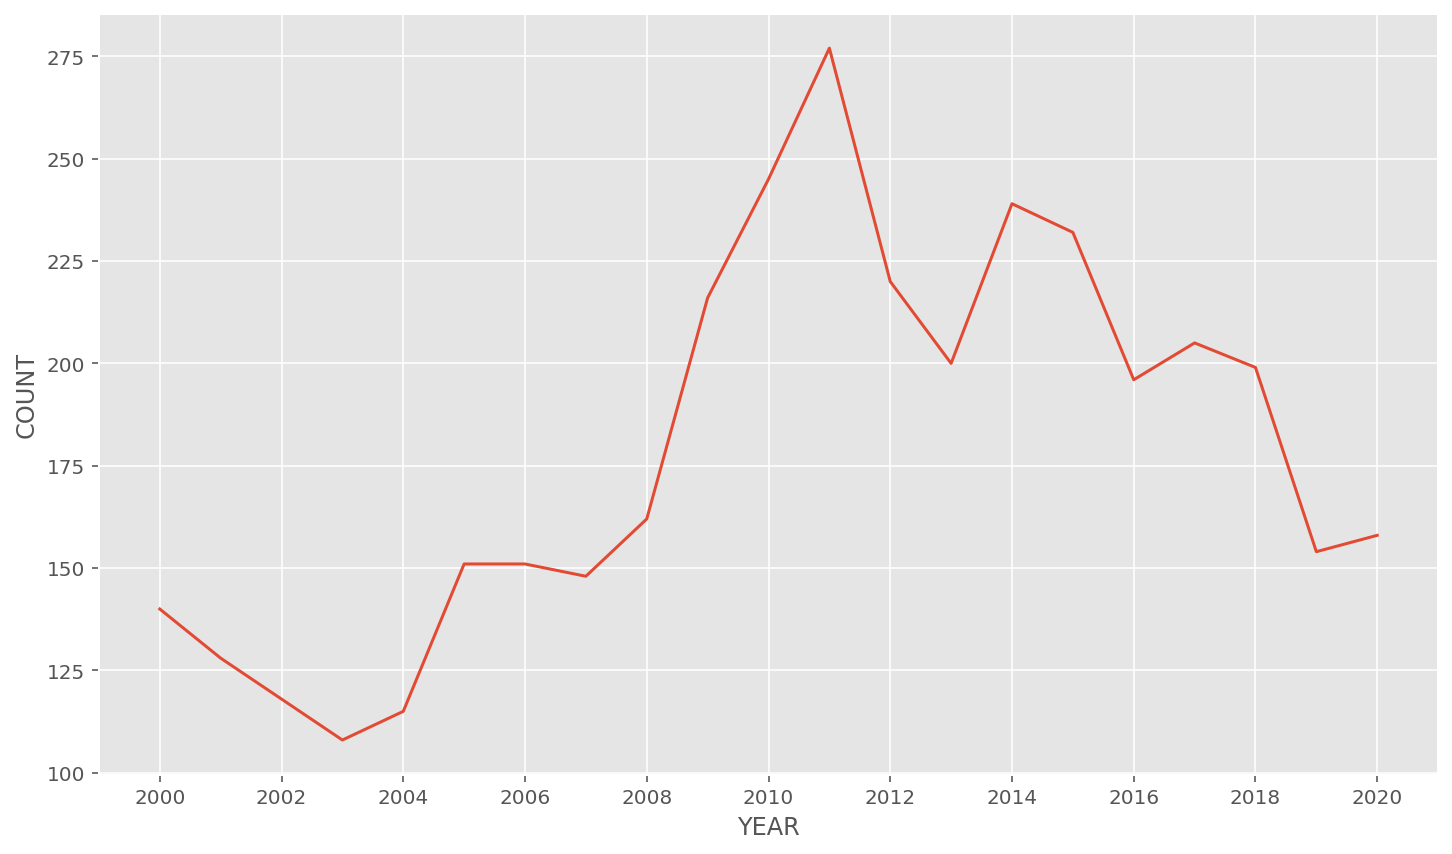

In [9]:
# Creates dataframe with number of works produced each year
year = df["YEAR"].value_counts().to_frame().sort_index().reset_index()
year.columns = ["YEAR", "COUNT"]

# Line plot of number of works produced each year
with plt.style.context('ggplot'):
    sns.lineplot(data=year,x="YEAR", y="COUNT")
    plt.xticks(np.arange(2000,2021,2))

    plt.show()

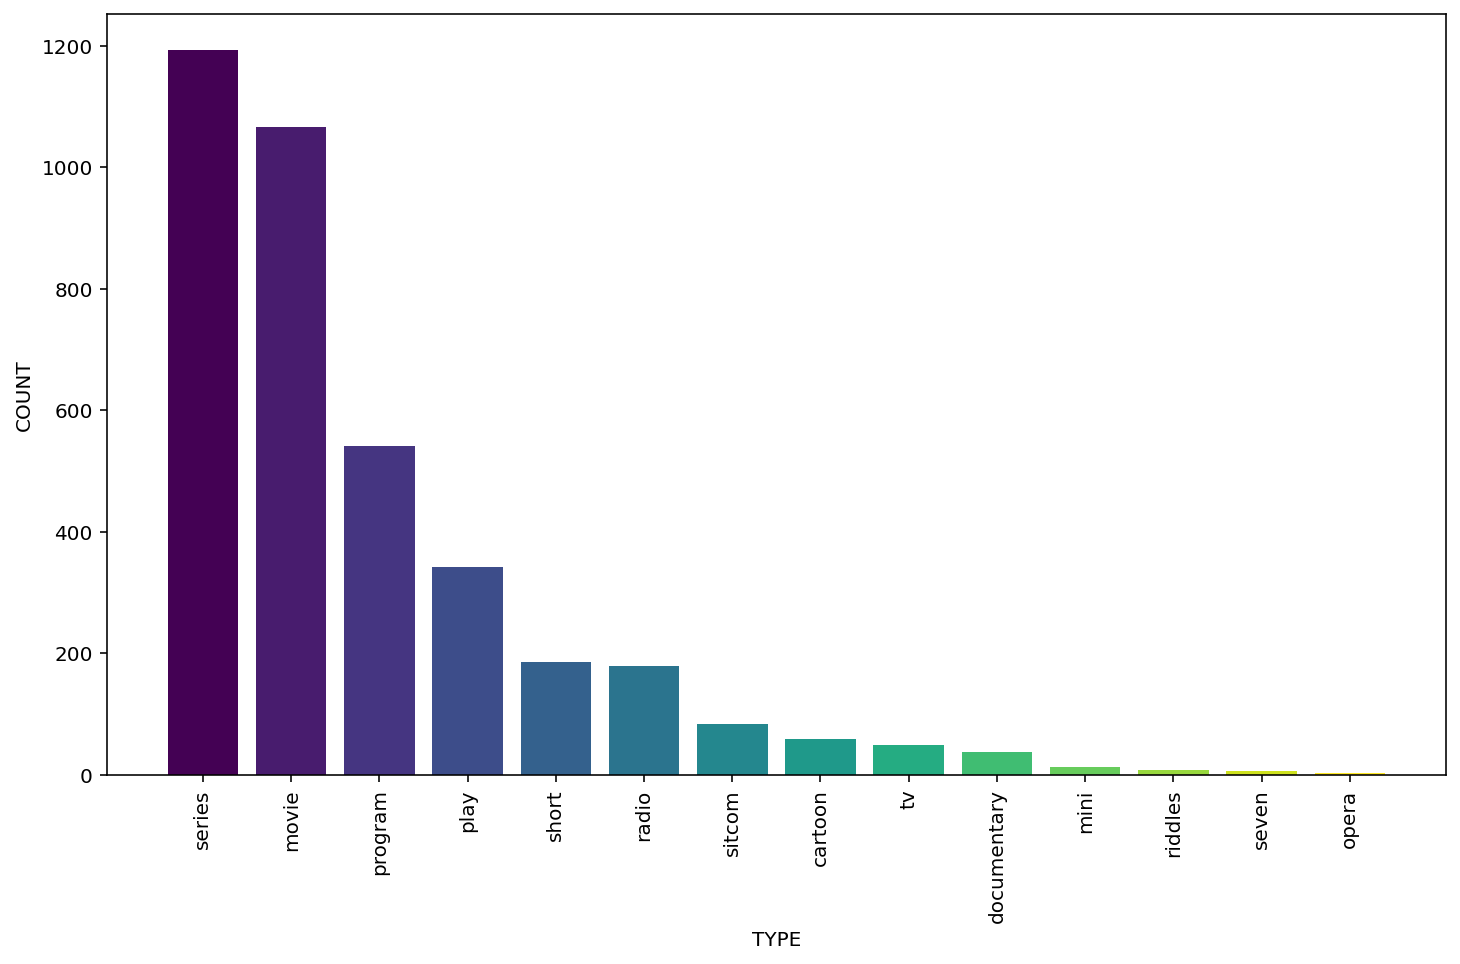

In [10]:
# CREATING MEDIA TYPE COUNT DATA FRAME
mtype = df["TYPE"].value_counts().to_frame().reset_index()
mtype.columns = ["TYPE", "COUNT"]

# Bar chart of number of each media type
viridis = cm.get_cmap('viridis', mtype.shape[0])

plt.bar(mtype["TYPE"], mtype["COUNT"], color = viridis.colors)
plt.xticks(rotation=90)
plt.xlabel("TYPE")
plt.ylabel("COUNT")
plt.show()

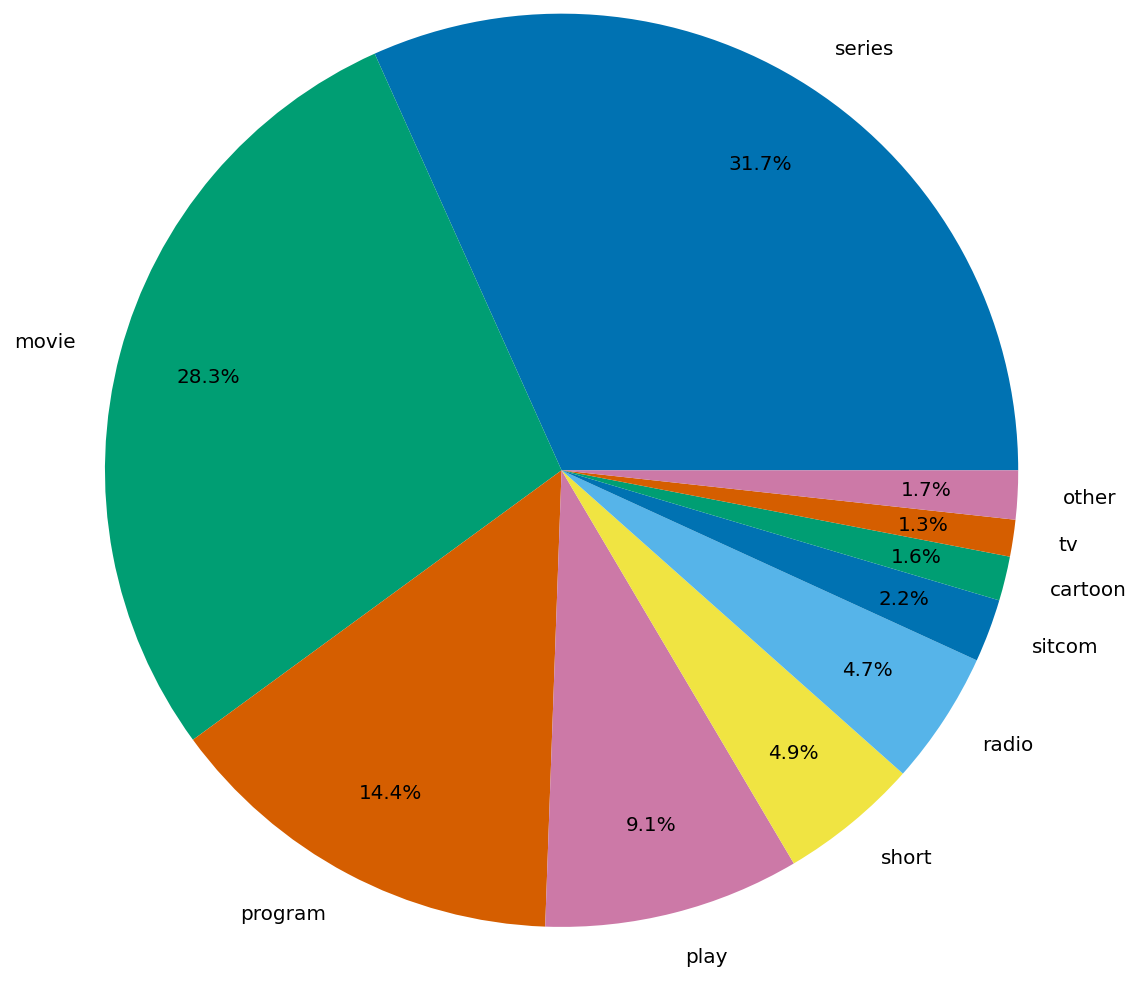

In [11]:
# Grouping media types with lowest frequency under "other"
pie_df = mtype.copy()
pie_df.loc[9,"COUNT"] = pie_df.loc[pie_df["COUNT"] < 49,"COUNT"].sum()
pie_df["TYPE"] = pie_df["TYPE"].replace("documentary", "other")
pie_df = pie_df.drop(index=[10,11,12,13])
pie_df

# Pie chart of media types with percentages indicated
with plt.style.context('seaborn-colorblind'):
    plt.pie(pie_df["COUNT"], labels=pie_df["TYPE"], autopct='%1.1f%%', radius=1.5, pctdistance = 0.8)
    plt.show()

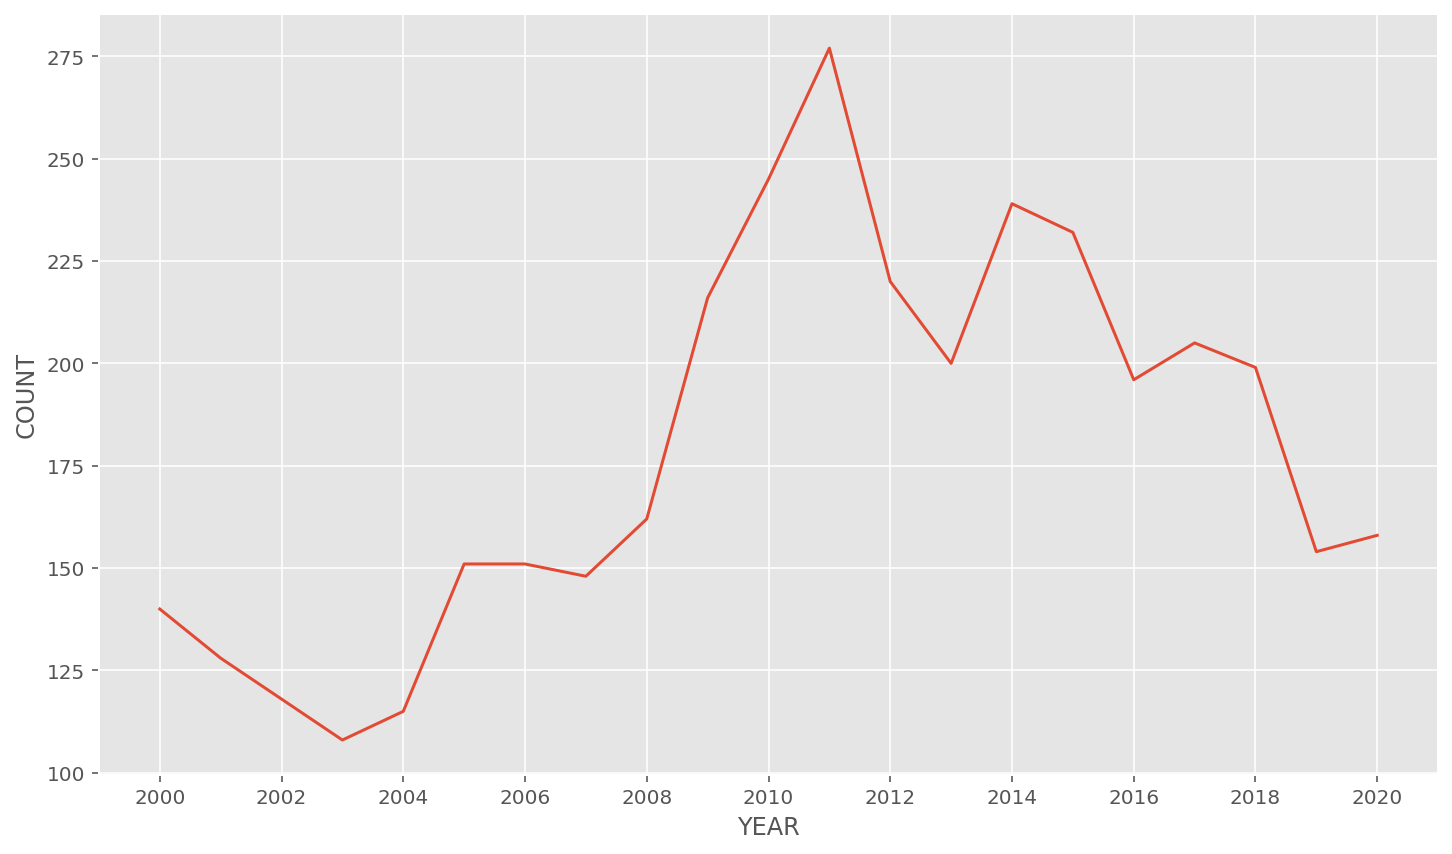

In [12]:
# Creates dataframe with number of works produced each year
year = df["YEAR"].value_counts().to_frame().sort_index().reset_index()
year.columns = ["YEAR", "COUNT"]
year

# Line plot of number of works produced each year
with plt.style.context('ggplot'):
    sns.lineplot(data=year,x="YEAR", y="COUNT")
    plt.xticks(np.arange(2000,2021,2))

    plt.show()

In [13]:
#The following lines of code will separate each type of the "TYPE" column into different variables.

In [14]:
#Series Type
Series = df[ df["TYPE"] == "series" ]

In [15]:
# Movie Type
Movie = df[ df["TYPE"] == "movie" ]

In [16]:
# program Type
Program = df[ df["TYPE"] == "program" ]

In [17]:
# Play Type
Play = df[ df["TYPE"] == "play" ]

In [18]:
# Short Type
Short = df[ df["TYPE"] == "short" ]

In [19]:
# Radio Type
Radio = df[ df["TYPE"] == "radio" ]

In [20]:
# Sitcom Type
Sitcom = df[ df["TYPE"] == "sitcom" ]

In [21]:
# Cartoon Type
Cartoon = df[ df["TYPE"] == "cartoon" ]

In [22]:
# TV Type
TV = df[ df["TYPE"] == "tv" ]

In [23]:
# Documentary Type
Documentary = df[ df["TYPE"] == "documentary" ]

In [24]:
# Mini Type
Mini = df[ df["TYPE"] == "mini" ]

In [25]:
# Riddles Type
Riddles = df[ df["TYPE"] == "riddles" ]

In [26]:
# Seven Type
Seven = df[ df["TYPE"] == "seven" ]

In [27]:
# Opera Type
Opera = df[ df["TYPE"] == "opera" ]

In [28]:
# The following lines of code will calculate the counts of each type in each year.

In [29]:
#Series
vals_S, counts_S = np.unique(Series['YEAR'], return_counts=True)

In [30]:
#Movies
vals_M, counts_M = np.unique(Movie['YEAR'], return_counts=True)

In [31]:
#Programs
vals_PR, counts_PR = np.unique(Program['YEAR'], return_counts=True)

In [32]:
#Play Type
vals_PL, counts_PL = np.unique(Play['YEAR'], return_counts=True)

In [33]:
#Short Type
vals_SH, counts_SH = np.unique(Short['YEAR'], return_counts=True)

In [34]:
#Radio Type
vals_R, counts_R = np.unique(Radio['YEAR'], return_counts=True)

In [35]:
#Sitcom
vals_SI, counts_SI = np.unique(Sitcom['YEAR'], return_counts=True)

In [36]:
#Cartoon Type
vals_C, counts_C= np.unique(Cartoon['YEAR'], return_counts=True)

In [37]:
#TV Type
vals_TV, counts_TV = np.unique(TV['YEAR'], return_counts=True)

In [38]:
#Documentary Type
vals_D, counts_D = np.unique(Documentary['YEAR'], return_counts=True)

In [39]:
#Mini Type
vals_MI, counts_MI = np.unique(Mini['YEAR'], return_counts=True)

In [40]:
#Riddles Type
vals_RI, counts_RI = np.unique(Riddles['YEAR'], return_counts=True)

In [41]:
#Seven Type
vals_SE, counts_SE = np.unique(Seven['YEAR'], return_counts=True)

In [42]:
#Opera
vals_O, counts_O = np.unique(Opera['YEAR'], return_counts=True)

In [43]:
#The following lines of code are line graphs for the first six types.

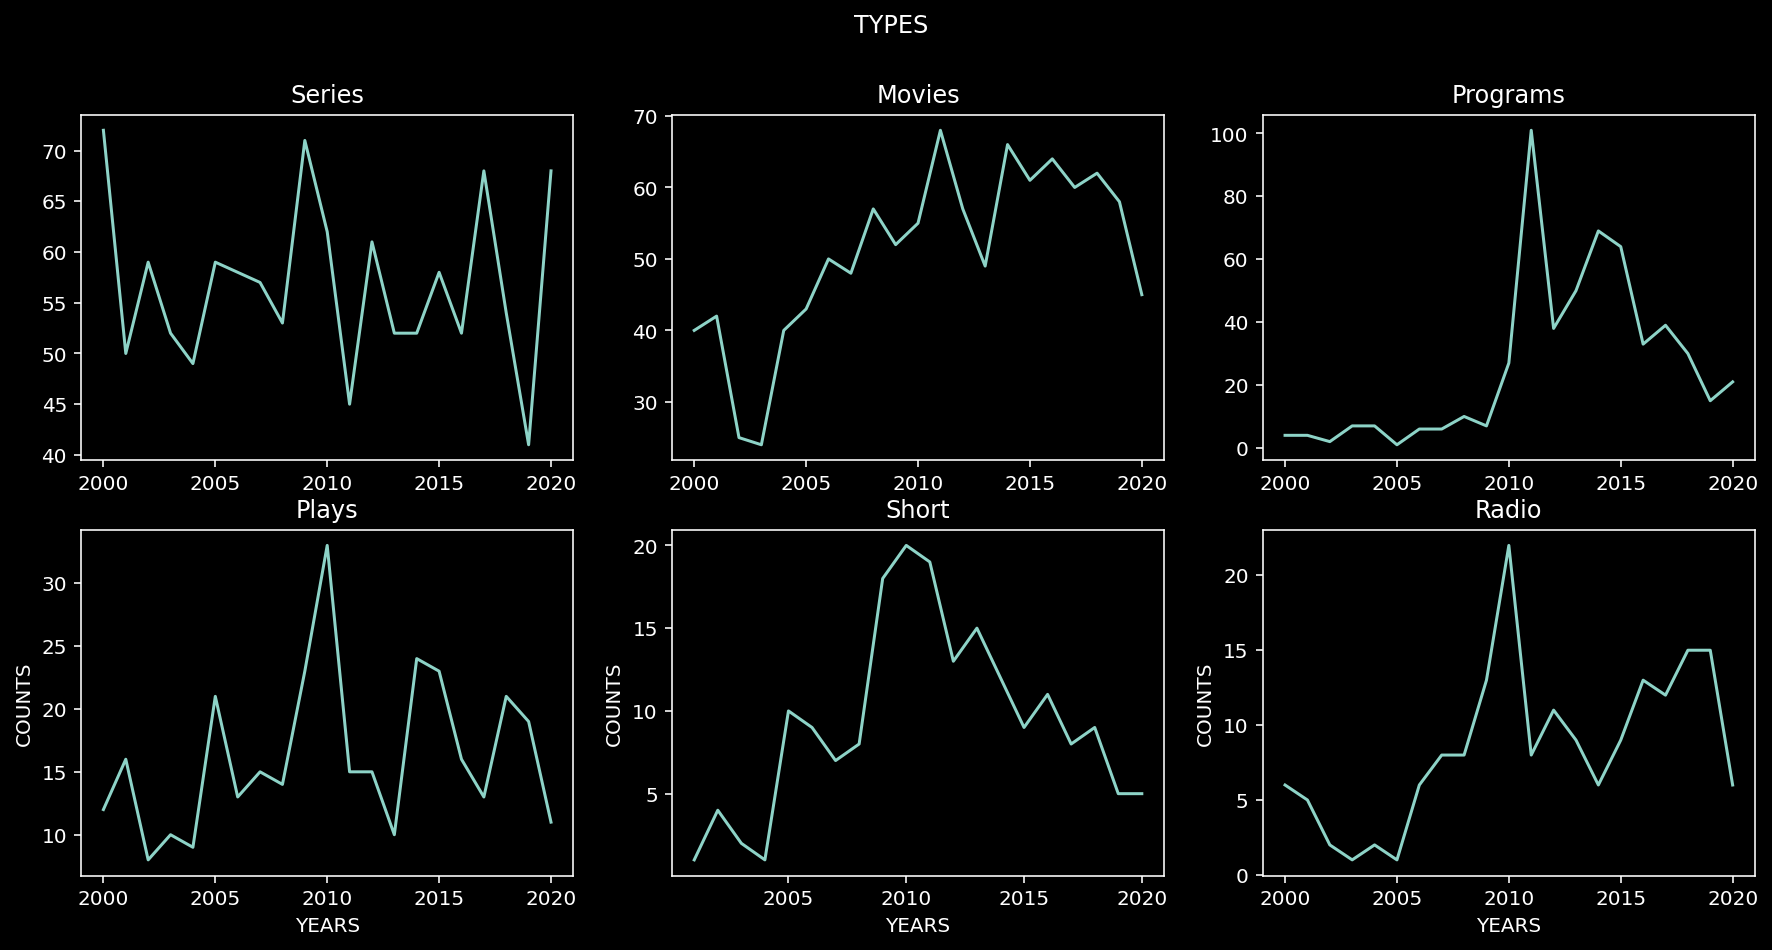

In [44]:
#Choosing the theme of the graph
with plt.style.context('dark_background'):
    #Setting the size and title of the whole graph
    fig, axes = plt.subplots(2,3, figsize=(15, 7))
    fig.suptitle('TYPES')
    #Graphing
    #Series
    sns.lineplot(ax=axes[0, 0], x= vals_S, y = counts_S)
    axes[0,0].set_title('Series')
    #Movies
    sns.lineplot(ax=axes[0, 1], x= vals_M, y = counts_M)
    axes[0,1].set_title('Movies')
    #Program
    sns.lineplot(ax=axes[0, 2], x= vals_PR, y = counts_PR)
    axes[0,2].set_title('Programs')
    #Play
    sns.lineplot(ax=axes[1, 0], x= vals_PL, y = counts_PL)
    axes[1,0].set_title('Plays')
    axes[1,0].set(xlabel='YEARS', ylabel='COUNTS')
    #Short
    sns.lineplot(ax=axes[1, 1], x= vals_SH, y = counts_SH)
    axes[1,1].set_title('Short')
    axes[1,1].set(xlabel='YEARS', ylabel='COUNTS')
    #Radio
    sns.lineplot(ax=axes[1, 2], x= vals_R, y = counts_R)
    axes[1,2].set_title('Radio')
    axes[1,2].set(xlabel='YEARS', ylabel='COUNTS')

In [45]:
#The following line of codes are line graphs for the second six types

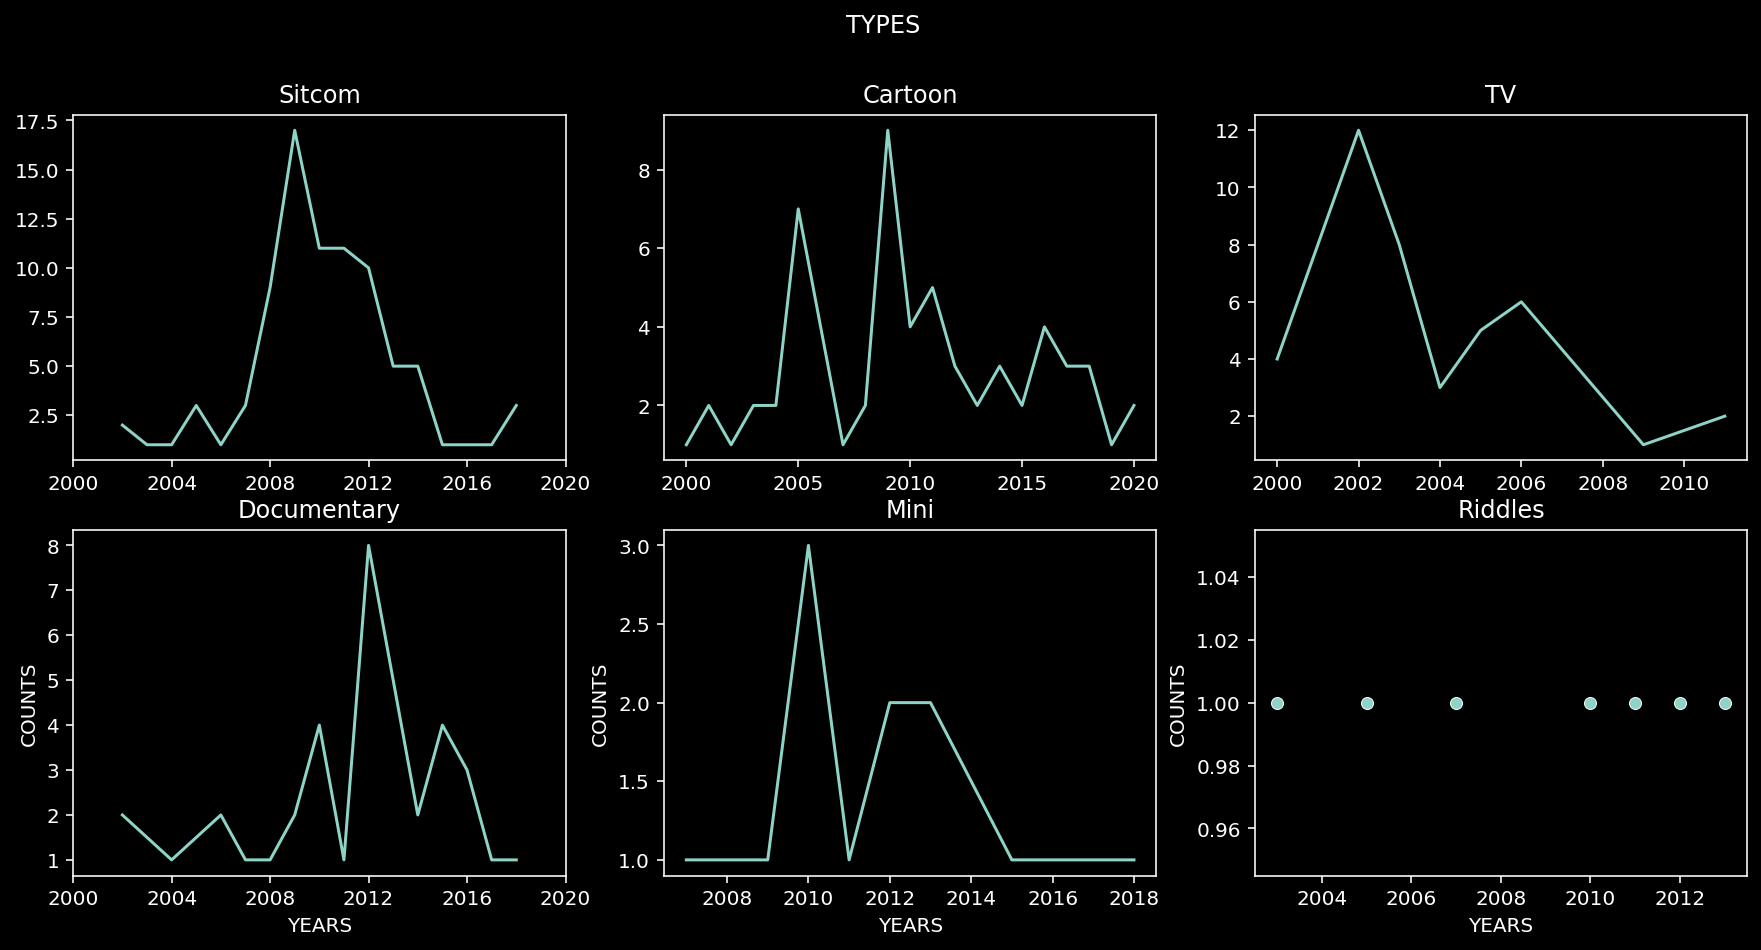

In [46]:
#Choosing the theme of the graph
with plt.style.context('dark_background'):
    #Setting the size and title of the whole graph
    fig, axes = plt.subplots(2,3, figsize=(15, 7))
    fig.suptitle('TYPES')
    #Graphing
    #Sitcom
    sns.lineplot(ax=axes[0, 0], x= vals_SI, y = counts_SI)
    axes[0,0].set_title('Sitcom')
    axes[0,0].set(xticks=np.arange(2000,2021,4))
    #Cartoon
    sns.lineplot(ax=axes[0, 1], x= vals_C, y = counts_C)
    axes[0,1].set_title('Cartoon')
    #TV
    sns.lineplot(ax=axes[0, 2], x= vals_TV, y = counts_TV)
    axes[0,2].set_title('TV')
    #Documentary
    sns.lineplot(ax=axes[1, 0], x= vals_D, y = counts_D)
    axes[1,0].set_title('Documentary')
    axes[1,0].set(xlabel='YEARS', ylabel='COUNTS')
    axes[1,0].set(xticks=np.arange(2000,2021,4))
    #Mini
    sns.lineplot(ax=axes[1, 1], x= vals_MI, y = counts_MI)
    axes[1,1].set_title('Mini')
    axes[1,1].set(xlabel='YEARS', ylabel='COUNTS')
    #Riddles
    sns.scatterplot(ax=axes[1, 2], x= vals_RI, y = counts_RI)
    axes[1,2].set_title('Riddles')
    axes[1,2].set(xlabel='YEARS', ylabel='COUNTS')

In [47]:
#The following line of codes are line graphs for the last three types

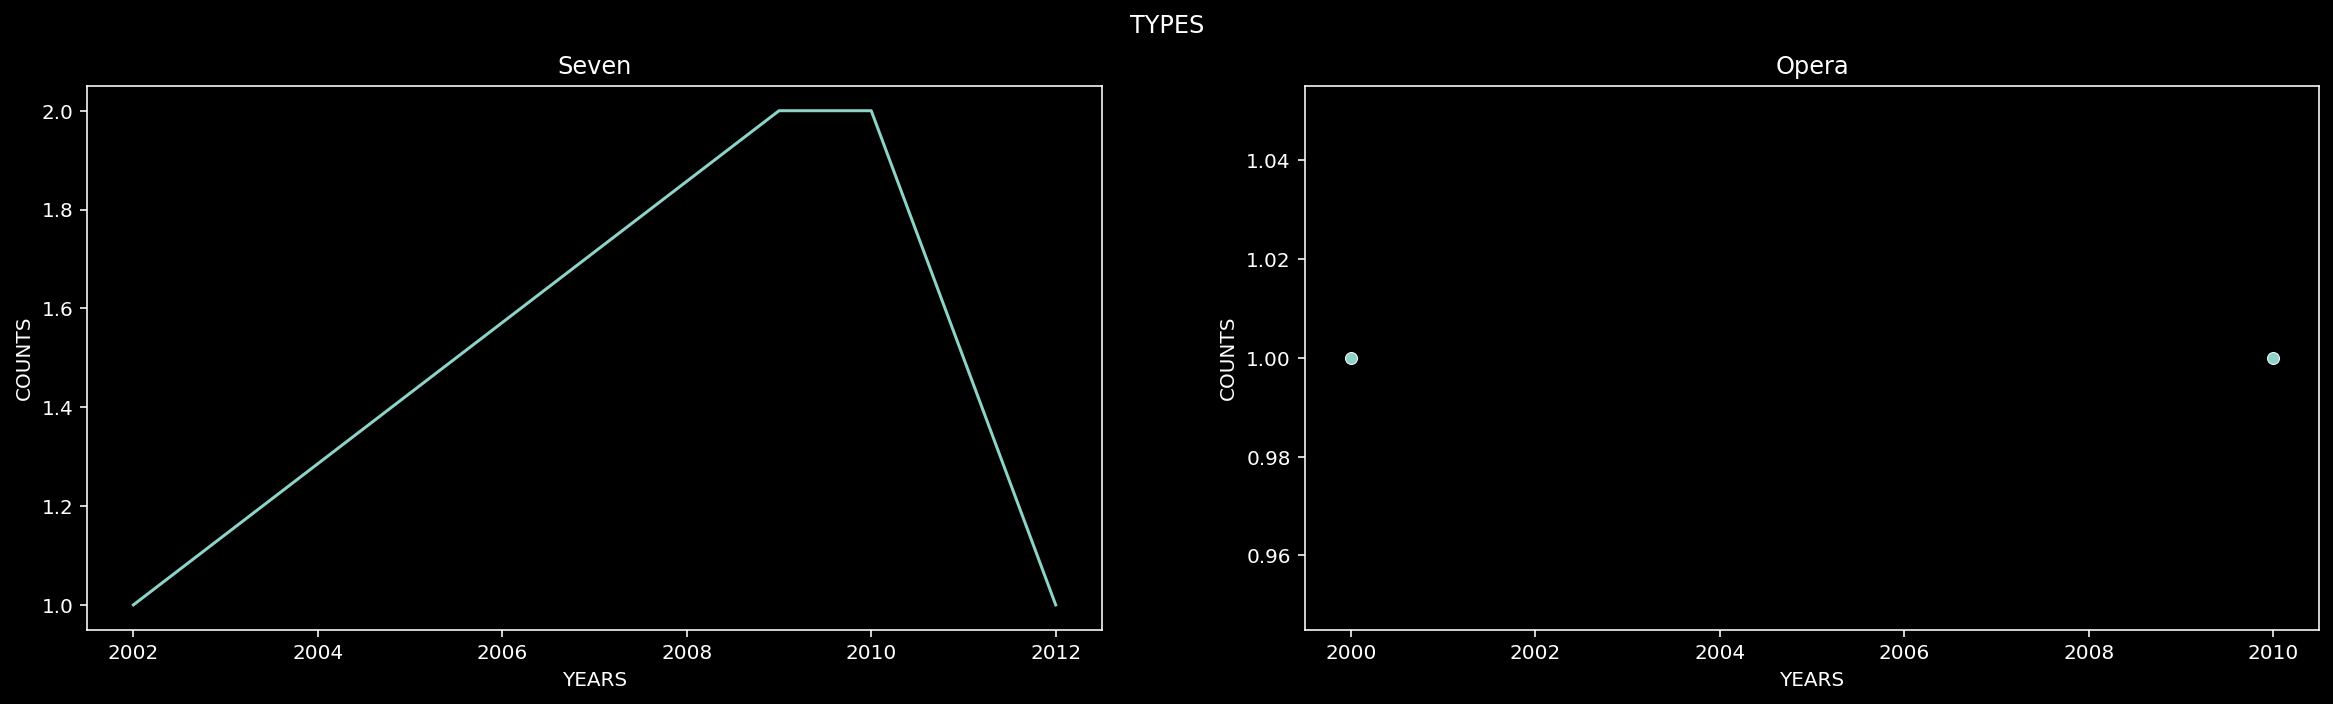

In [48]:
#Choosing the theme of the graph
with plt.style.context('dark_background'):
    #Setting the size and title of the whole graph
    fig, axes = plt.subplots(1,2, figsize=(20, 5))
    fig.suptitle('TYPES')
    #Graphing
    #Seven
    sns.lineplot(ax=axes[0], x= vals_SE, y = counts_SE)
    axes[0].set_title('Seven')
    axes[0].set(xlabel='YEARS', ylabel='COUNTS')
    #Opera
    sns.scatterplot(ax=axes[1], x= vals_O, y = counts_O)
    axes[1].set_title('Opera')
    axes[1].set(xlabel='YEARS', ylabel='COUNTS')

In [49]:
# CREATING DATA FRAME OF MEDIA TYPE COUNT EVERY YEAR
# for top 4 media types
# and standardizing counts

series = df[df["TYPE"]=="series"]["YEAR"].value_counts().to_frame().sort_index().reset_index()
series.columns = ["YEAR", "COUNT"]
series["STANDARD"] = preprocessing.scale(series["COUNT"])

movies = df[df["TYPE"]=="movie"]["YEAR"].value_counts().to_frame().sort_index().reset_index()
movies.columns = ["YEAR", "COUNT"]
movies["STANDARD"] = preprocessing.scale(movies["COUNT"])

program = df[df["TYPE"]=="program"]["YEAR"].value_counts().to_frame().sort_index().reset_index()
program.columns = ["YEAR", "COUNT"]
program["STANDARD"] = preprocessing.scale(program["COUNT"])

play = df[df["TYPE"]=="play"]["YEAR"].value_counts().to_frame().sort_index().reset_index()
play.columns = ["YEAR", "COUNT"]
play["STANDARD"] = preprocessing.scale(play["COUNT"])

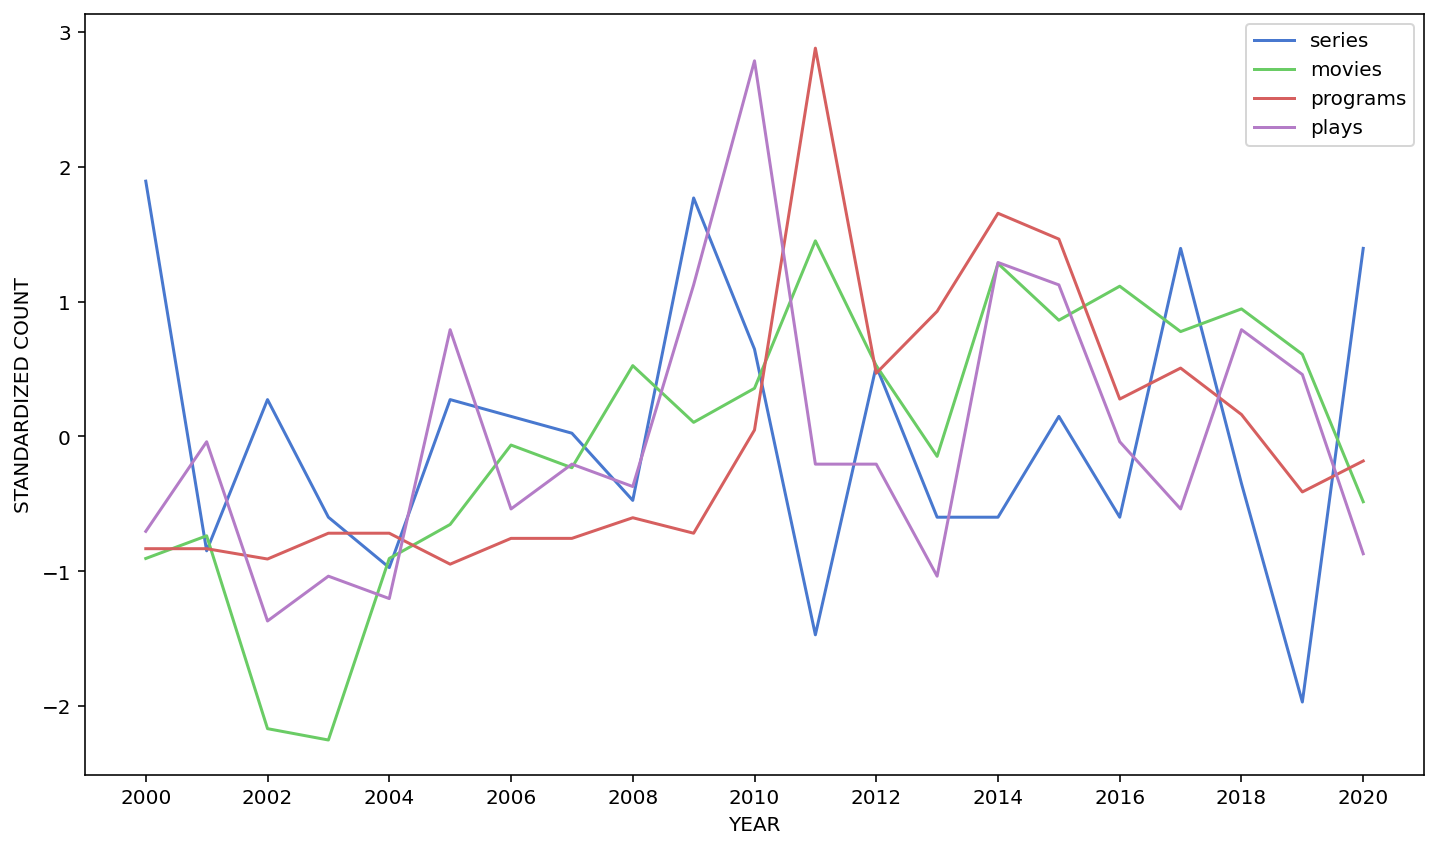

In [50]:
# Line plot of all media types, series, movies, and other 
# Can be used for observing correlations 

with plt.style.context("seaborn-muted"):
    sns.lineplot(data=series,x="YEAR", y="STANDARD")
    sns.lineplot(data=movies,x="YEAR", y="STANDARD")
    sns.lineplot(data=program,x="YEAR", y="STANDARD")
    sns.lineplot(data=play,x="YEAR", y="STANDARD")



    plt.xticks(np.arange(2000,2021,2))
    plt.ylabel("STANDARDIZED COUNT")
    plt.legend(["series", "movies","programs","plays"])

    plt.show()

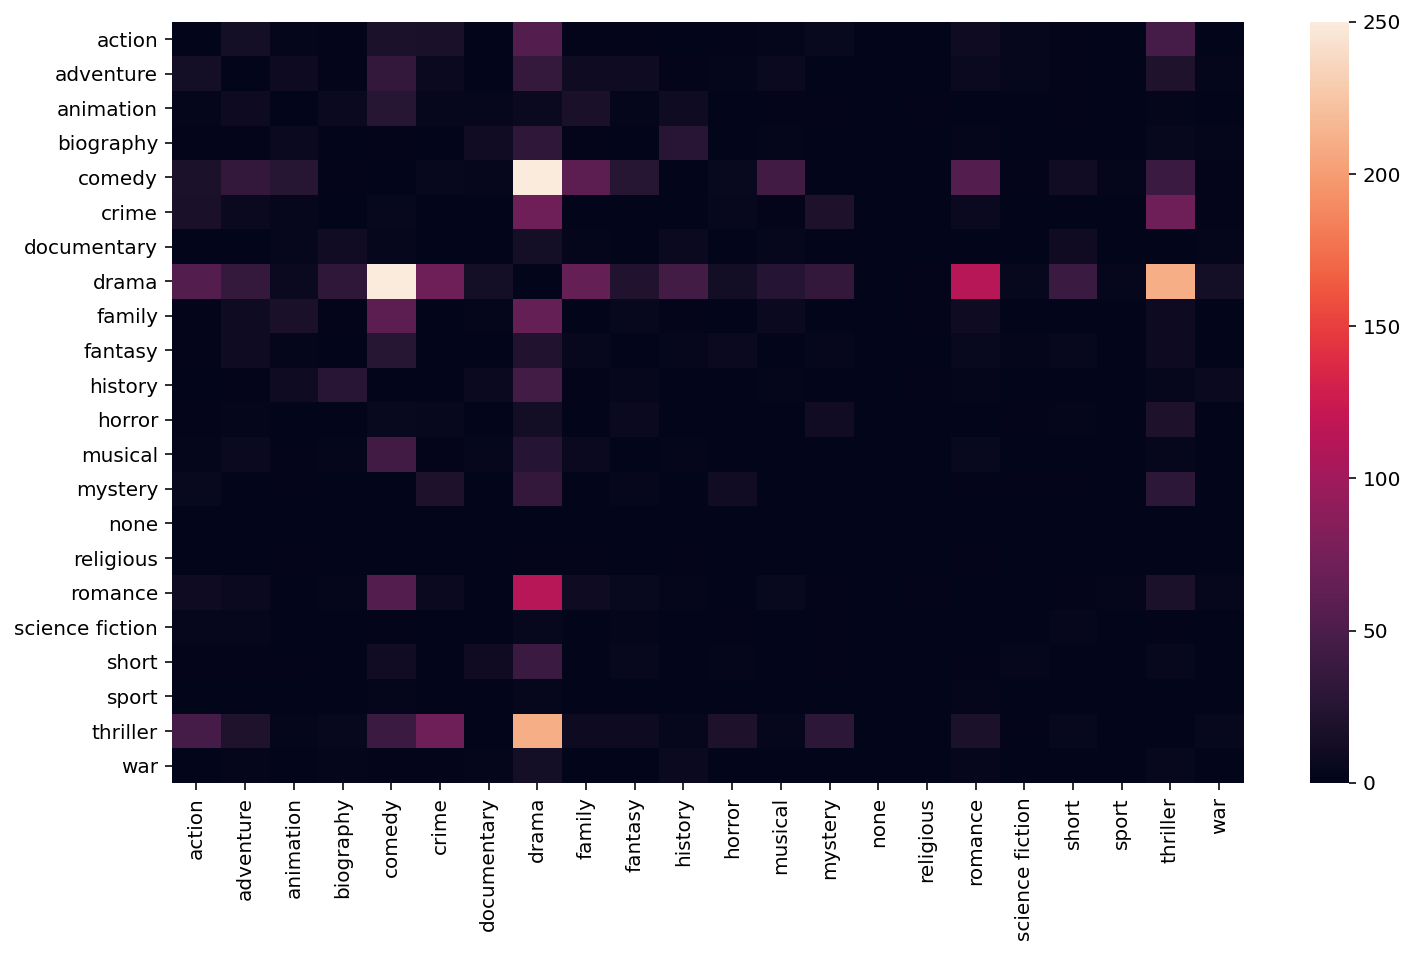

In [51]:
# Co-occurrence matrix of genres
df_asint = cleaned.astype(int)
coocc = cleaned.T.dot(df_asint)
np.fill_diagonal(coocc.values, 0)
sns.heatmap(coocc, xticklabels=True, yticklabels=True)

plt.show()

In [52]:
# created list of all movie genres column names

movie_genres= cleaned.columns

years_df = pd.DataFrame()  #created empty dataframe
years = np.sort(df_new['YEAR'].unique())   #stored unique years in a sorted series

for i in range(len(years)):   #for loop to add to empty dataframe sum of movie genres per year       
    years_df[years[i]] = df_new[(df_new["YEAR"]==years[i])][movie_genres].sum()
    
years_df

2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  \
action              2     0     1     0     0     3     0     4     3     1   
adventure           2     6     1     1     4     3     2     4     9     8   
animation           3     2     4     2     1     6     2     1     0     3   
biography           1     3     3     2     3     0     5     3     4     3   
comedy             21    23    18    18    25    23    31    30    32    50   
crime               7     2     3     1     1     4     2     9     6     9   
documentary         1     0     2     1     4     1     1     2     1     4   
drama              55    54    53    48    41    45    47    63    65    88   
family              1     8     7    13     9     6     5     7     5     8   
fantasy             0     2     1     0     1     3     2     2     4     3   
history             7     9     8     3     3     3     5     2     5     1   
horror              0     0     0     0     0     0     0     1     2     0   
musical             3     5     2     5     4     2     8     2     5     4   
mystery             1     2     1     1     0     2     1     1     0     1   
none               60    49    47    40    46    78    70    60    70    96   
religious           0     0     0     0     0     0     0     0     0     2   
romance             4     6     4     5     9     8    13     9     8     9   
science fiction     1     0     0     0     0     0     0     0     1     0   
short               0     2     0     0     0     1     4     1     0     3   
sport               0     0     0     0     0     0     1     0     1     0   
thriller            7     6     7     4     7     9     9    10    14    19   
war                 0     1     2     1     3     0     0     0     0     1   

                 ...  2011  2012  2013  2014  2015  2016  2017  2018  2019  \
action           ...     2     5     5     5    16    10     8    10    13   
adventure        ...     4     3     0     1     6     4     0     2     1   
animation        ...     5     7     7     7     7     7     9     9     2   
biography        ...     6     4     4     4     2     3     1     5     1   
comedy           ...    60    47    52    59    63    45    57    60    47   
crime            ...     2    10     2     6    12    10     3     5     5   
documentary      ...    13    14    13    11    10     8     4    11     4   
drama            ...    71    95    69    66    74    61    60    60    47   
family           ...    10     5     7    14     9     3     4     4     2   
fantasy          ...     3     3     2     5     5     4     0     5     2   
history          ...     1     4     5     7     8     1     3     2     2   
horror           ...     3     1     0     4     3     6     3     1     7   
musical          ...     6     4     4     6     7     4     2     2     4   
mystery          ...     1     0     2     4     8     9     3     6     3   
none             ...   128    77    65    79    75    63    64    55    36   
religious        ...     0     1     0     1     0     0     0     0     0   
romance          ...     7     9    10     8    17     9     7     3     7   
science fiction  ...     0     0     0     1     0     1     0     1     0   
short            ...    24     5     8    12     7    10    10     8    10   
sport            ...     0     0     1     1     5     0     0     1     1   
thriller         ...    11    23    12    16    29    26    22    27    21   
war              ...     2     0     1     2     1     1     0     0     1   

                 2020  
action              6  
adventure           4  
animation           4  
biography           1  
comedy             41  
crime               3  
documentary         0  
drama              63  
family              1  
fantasy             3  
history             2  
horror              8  
musical             0  
mystery             7  
none               36  
religious           

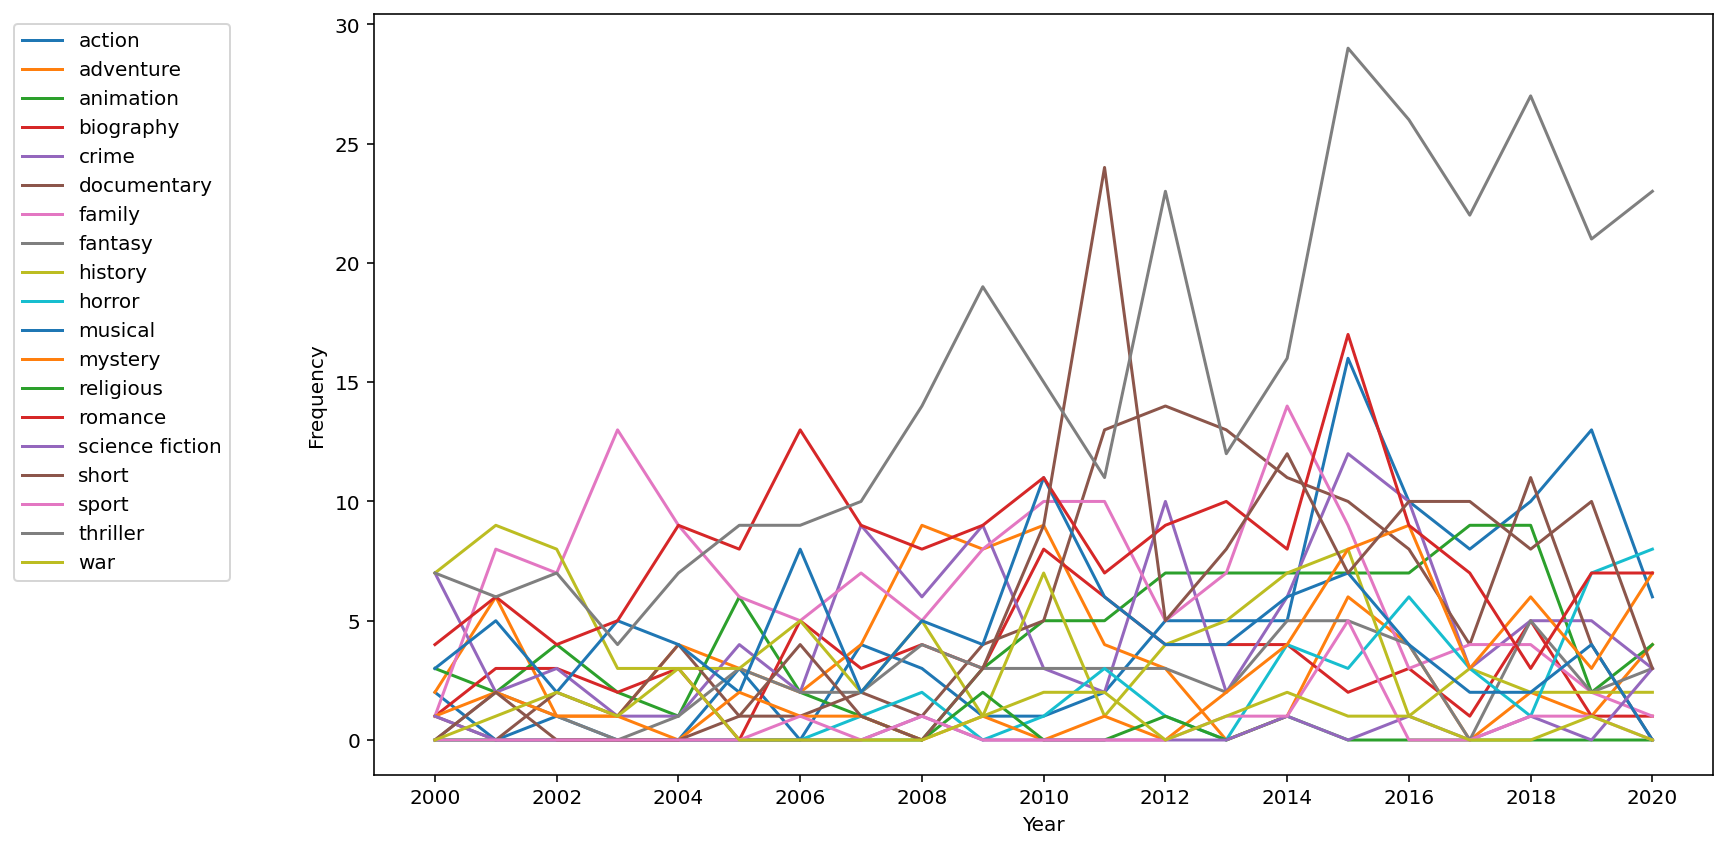

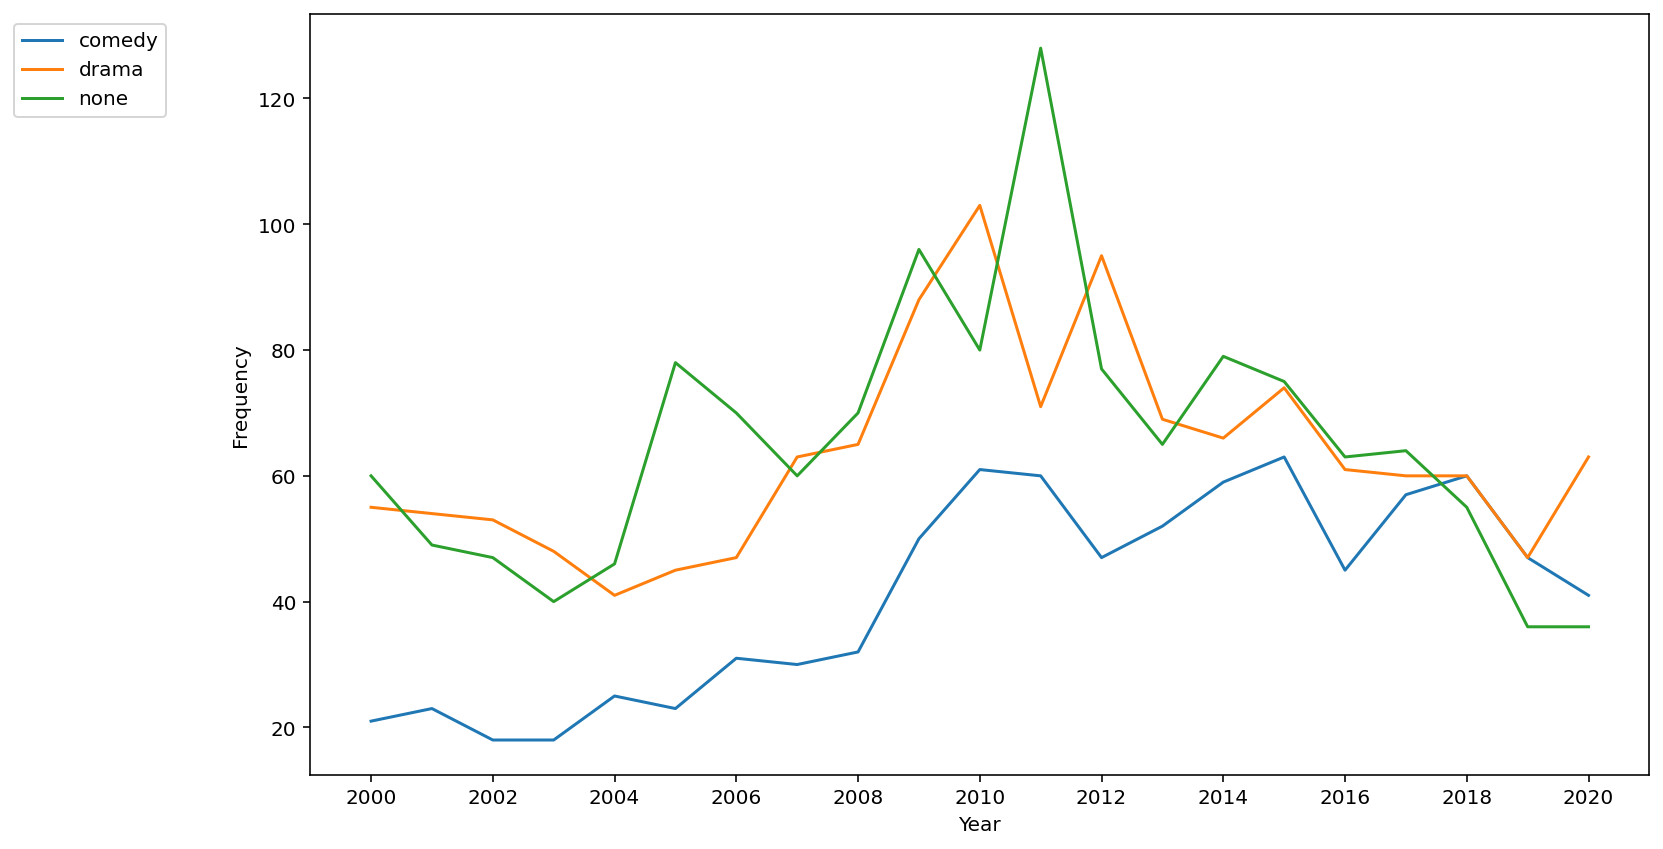

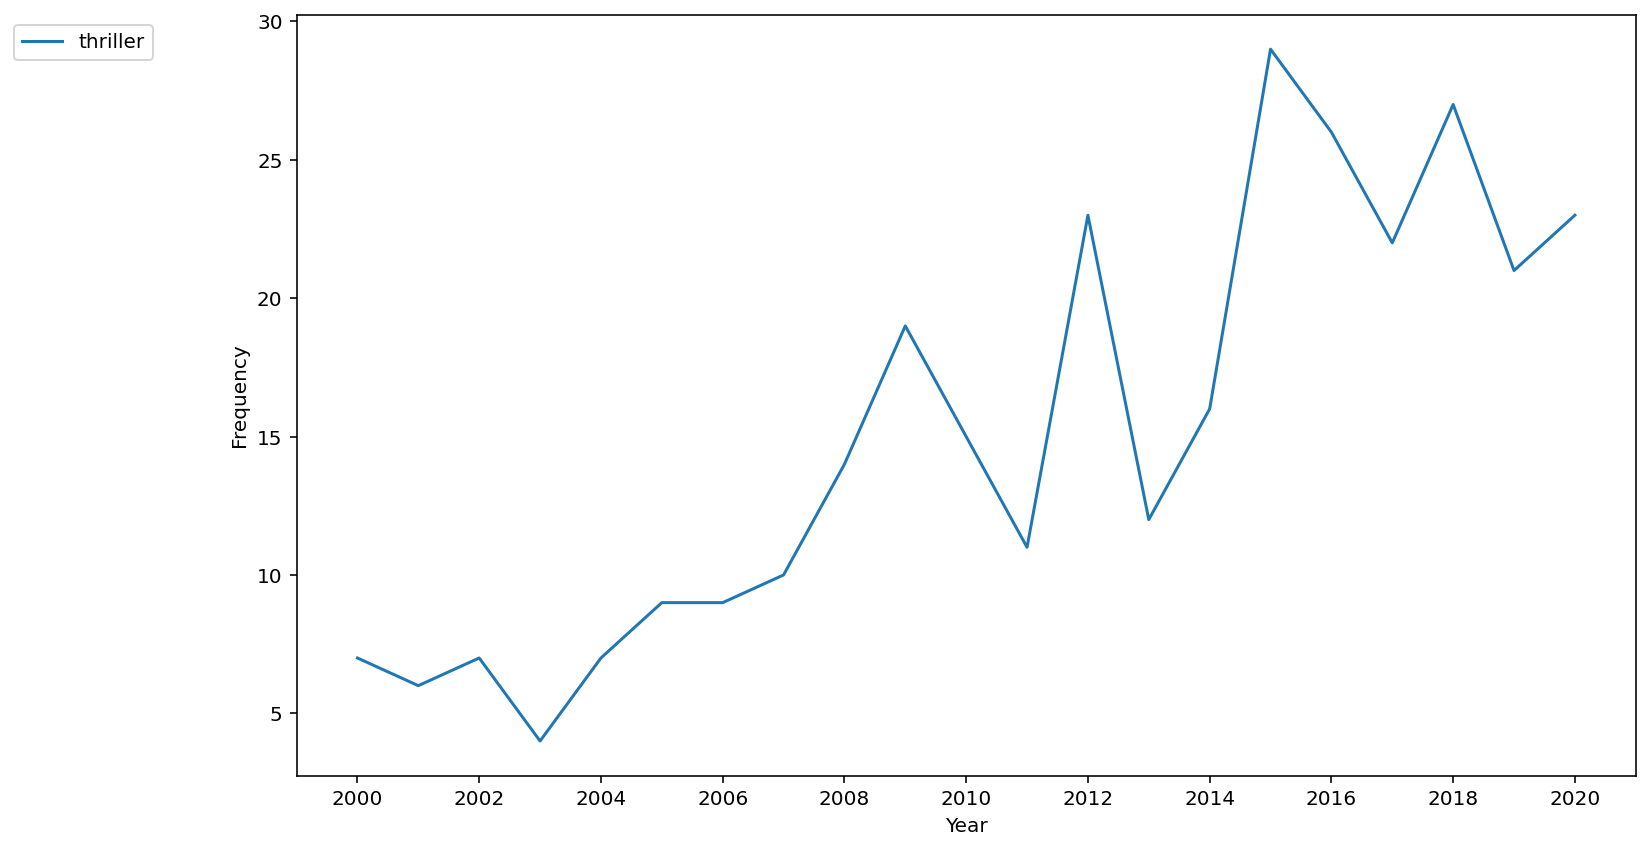

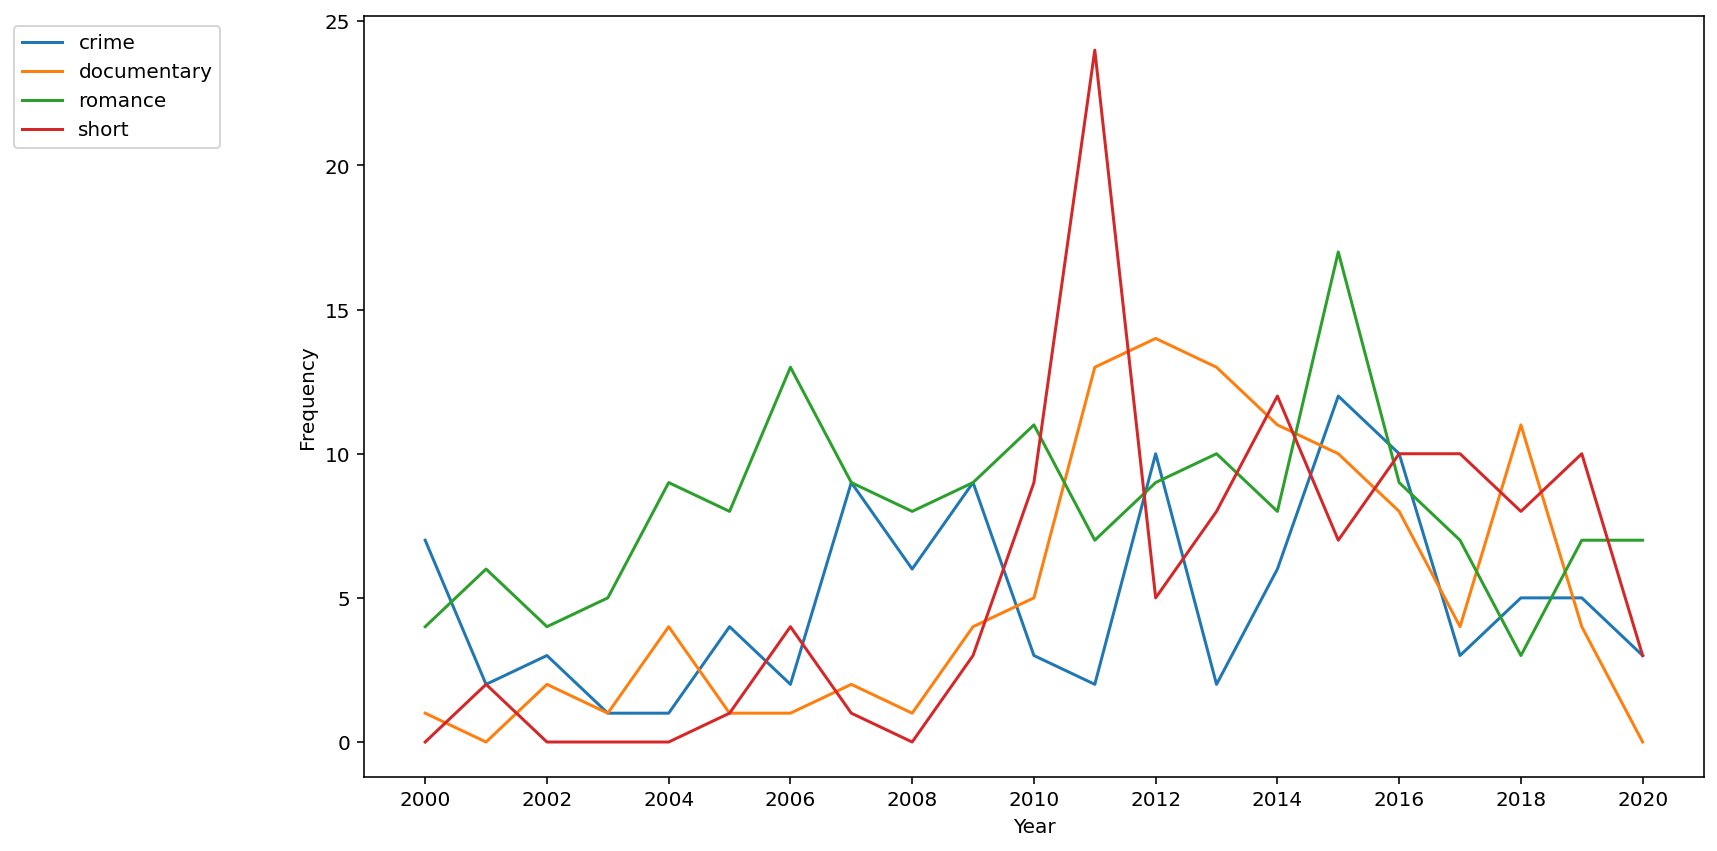

In [53]:
#time series for genres 
years_df_transpose=years_df.T #took the transpose of the dataframe so it can be plotted in an easier way

years_df.T 

x=[0,1,2,3,5,6,8,9,10,11,12,13,15,16,17,18,19,20,21] #chose the genres that fall within a similar range
years_df_transpose.iloc[:,x].plot()
plt.legend(loc="upper right", bbox_to_anchor=(-0.1,1.0)) #moved the legend outside to avoid cluttering the graph
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.xticks(np.arange(2000,2021,2))
plt.show()

x= [4,7,14] # genres that occured within a higher range
years_df_transpose.iloc[:,x].plot() 
plt.legend(loc="upper right", bbox_to_anchor=(-0.1,1.0))
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.xticks(np.arange(2000,2021,2))
plt.show()

x=[20] #chose to plot thriller since its trend is unusual
years_df_transpose.iloc[:,x].plot()
plt.legend(loc="upper right", bbox_to_anchor=(-0.1,1.0)) #moved the legend outside to avoid cluttering the graph
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.xticks(np.arange(2000,2021,2))
plt.show()

x=[5,6,16,18] #chose to plot important genres 
years_df_transpose.iloc[:,x].plot()
plt.legend(loc="upper right", bbox_to_anchor=(-0.1,1.0)) #moved the legend outside to avoid cluttering the graph
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.xticks(np.arange(2000,2021,2))
plt.show()

In [54]:
#classifying by years: to see how many piece of work from each genre were produced each year 
np.unique(df_new["YEAR"], return_counts=True)

(array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
        2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]),
 array([140, 128, 118, 108, 115, 151, 151, 148, 162, 216, 245, 277, 220,
        200, 239, 232, 196, 205, 199, 154, 158]))

In [55]:
df_new.sort_values("YEAR")

YEAR    TYPE           GENRES                TITLE  action  \
key_0                                                                 
2035301  2000  series            drama               Hamsat       0   
1007823  2000   movie            drama  Al'abwab almughliqa       0   
1460146  2000  series            drama  Sayf Sakhin Jiddaan       0   
1339389  2000  series            drama         Khial alzili       0   
1820950  2000  series           comedy       اوتار التغريبة       0   
...       ...     ...              ...                  ...     ...   
2059626  2020  series            drama            Al-Prince       0   
2059664  2020  series  thriller,action   Shadid Al Khutoura       1   
2059688  2020  series    romance,drama     W Neheb Tany Leh       0   
2059386  2020   radio             none            لغز مفتوح       0   
2068747  2020    play             none            الأسانسير       0   

         adventure  animation  biography  comedy  crime  ...  musical  \
key_0                                                    ...            
2035301          0          0          0       0      0  ...        0   
1007823          0          0          0       0      0  ...        0   
1460146          0          0          0       0      0  ...        0   
1339389          0          0          0       0      0  ...        0   
1820950          0          0          0       1      0  ...        0   
...            ...        ...        ...     ...    ...  ...      ...   
2059626          0          0          0       0      0  ...        0   
2059664          0          0          0       0      0  ...        0   
2059688          0          0          0       0      0  ...        0   
2059386          0          0          0       0      0  ...        0   
2068747          0          0          0       0      0  ...        0   

         mystery  none  religious  romance  science fiction  short  sport  \
key_0                                                                       
2035301        0     0          0        0                0      0      0   
1007823        0     0          0        0                0      0      0   
1460146        0     0          0        0                0      0      0   
1339389        0     0          0        0                0      0      0   
1820950        0     0          0        0                0      0      0   
...          ...   ...        ...      ...              ...    ...    ...   
2059626        0     0          0        0                0      0      0   
2059664        0     0          0        0                0      0      0   
2059688        0     0          0        1                0      0      0   
2059386        0     1          0        0                0      0      0   
2068747        0     1          0        0                0      0      0   

         thriller  war  
key_0                   
2035301         0    0  
1007823         0    0  
1460146         0    0  
1339389         0    0  
1820950         0    0  
...           ...  ...  
2059626         0    0  
2059664         1    0  
2059688         0    0  
2059386         0    0  
2068747         0    0  

[3762 rows x 26 columns]

In [56]:
movie_genres = cleaned.columns

In [57]:
#"movie_bygenres" followed by the year number; is used to get the number of art pieces of each genre produced in one year

#for the year 2000
year2000= df_new[(df_new["YEAR"]==2000)]
movies_bygenres2000=year2000[movie_genres].sum()

#for the year 2001
year2001= df_new[(df_new["YEAR"]==2001)]
movies_bygenres2001=year2001[movie_genres].sum()

#for the year 2002
year2002= df_new[(df_new["YEAR"]==2002)]
movies_bygenres2002=year2002[movie_genres].sum()

#for the year 2003
year2003= df_new[(df_new["YEAR"]==2003)]
movies_bygenres2003=year2003[movie_genres].sum()

#for the year 2004
year2004= df_new[(df_new["YEAR"]==2004)]
movies_bygenres2004=year2004[movie_genres].sum()

#for the year 2005
year2005= df_new[(df_new["YEAR"]==2005)]
movies_bygenres2005=year2005[movie_genres].sum()

#for the year 2006
year2006= df_new[(df_new["YEAR"]==2006)]
movies_bygenres2006=year2006[movie_genres].sum()

#for the year 2007
year2007= df_new[(df_new["YEAR"]==2007)]
movies_bygenres2007=year2007[movie_genres].sum()

#for the year 2008
year2008= df_new[(df_new["YEAR"]==2008)]
movies_bygenres2008=year2008[movie_genres].sum()

#for the year 2009
year2009= df_new[(df_new["YEAR"]==2009)]
movies_bygenres2009=year2009[movie_genres].sum()

#for the year 2010
year2010= df_new[(df_new["YEAR"]==2010)]
movies_bygenres2010=year2010[movie_genres].sum()

#for the year 2011
year2011= df_new[(df_new["YEAR"]==2011)]
movies_bygenres2011=year2011[movie_genres].sum()

#for the year 2012
year2012= df_new[(df_new["YEAR"]==2012)]
movies_bygenres2012=year2012[movie_genres].sum()

#for the year 2013
year2013= df_new[(df_new["YEAR"]==2013)]
movies_bygenres2013=year2013[movie_genres].sum()

#for the year 2014
year2014= df_new[(df_new["YEAR"]==2014)]
movies_bygenres2014=year2014[movie_genres].sum()

#for the year 2015
year2015= df_new[(df_new["YEAR"]==2015)]
movies_bygenres2015=year2012[movie_genres].sum()

#for the year 2016
year2016= df_new[(df_new["YEAR"]==2016)]
movies_bygenres2016=year2016[movie_genres].sum()

#for the year 2017
year2017= df_new[(df_new["YEAR"]==2017)]
movies_bygenres2017=year2017[movie_genres].sum()

#for the year 2018
year2018= df_new[(df_new["YEAR"]==2018)]
movies_bygenres2018=year2018[movie_genres].sum()

#for the year 2019
year2019= df_new[(df_new["YEAR"]==2019)]
movies_bygenres2019=year2019[movie_genres].sum()

#for the year 2020
year2020= df_new[(df_new["YEAR"]==2020)]
movies_bygenres2020=year2020[movie_genres].sum()


Text(0.5, 1.0, 'Bar Chart for the year 2000')

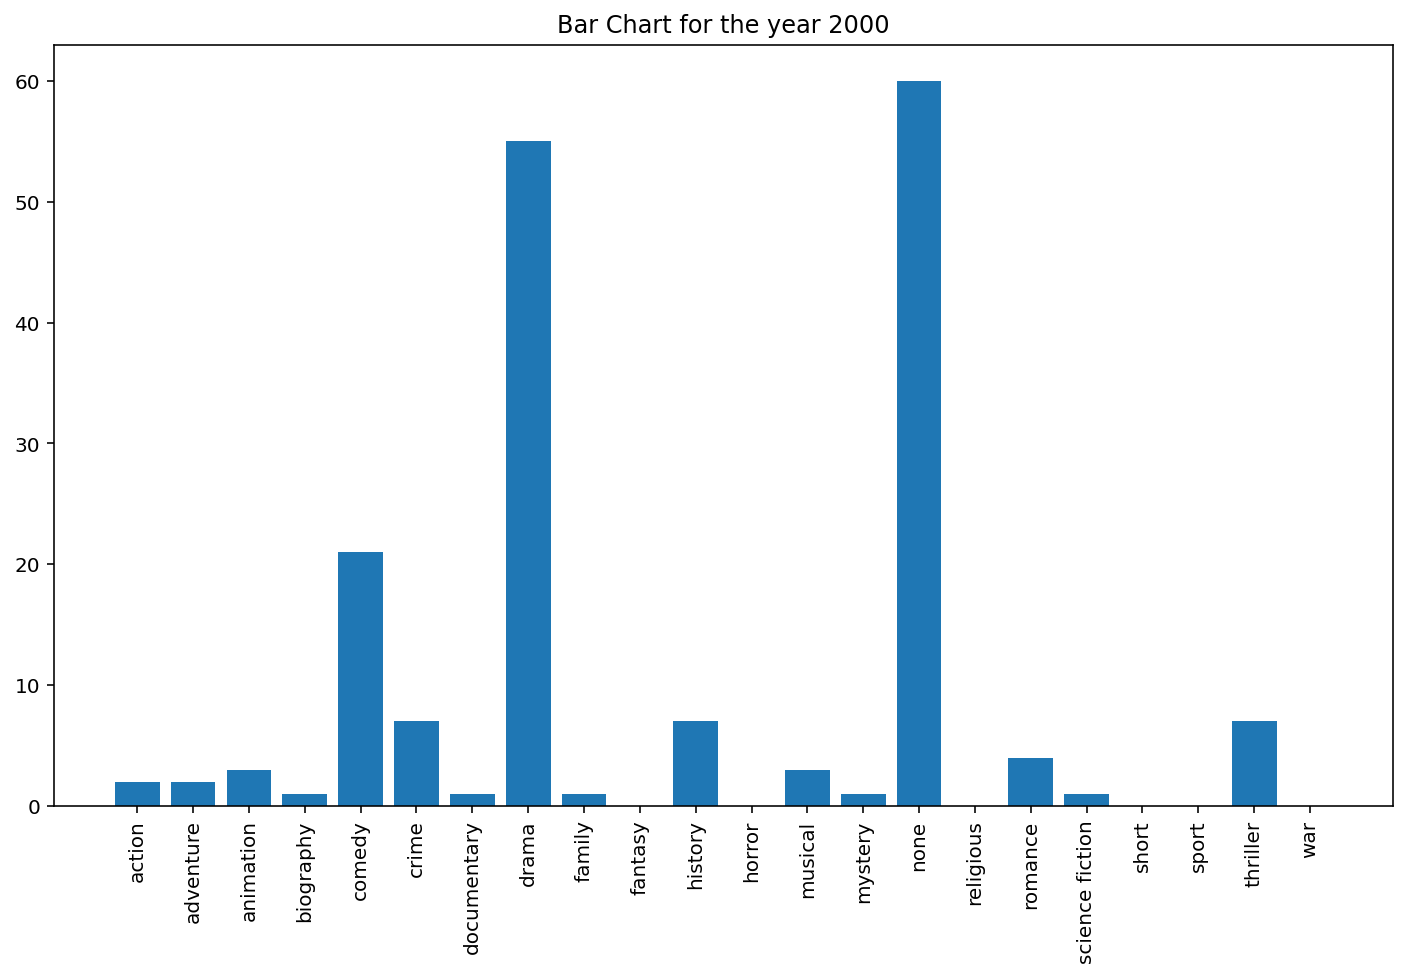

In [58]:
#code for bar chart for the number of the different genres of all the media types produced in the year 2000
bar_for2000= plt.bar(movie_genres,movies_bygenres2000)
plt.xticks(movie_genres, rotation=90) #to make x-axis labels vertical 
plt.title("Bar Chart for the year 2000")

Text(0.5, 1.0, 'pie chart for genres in the year 2000')

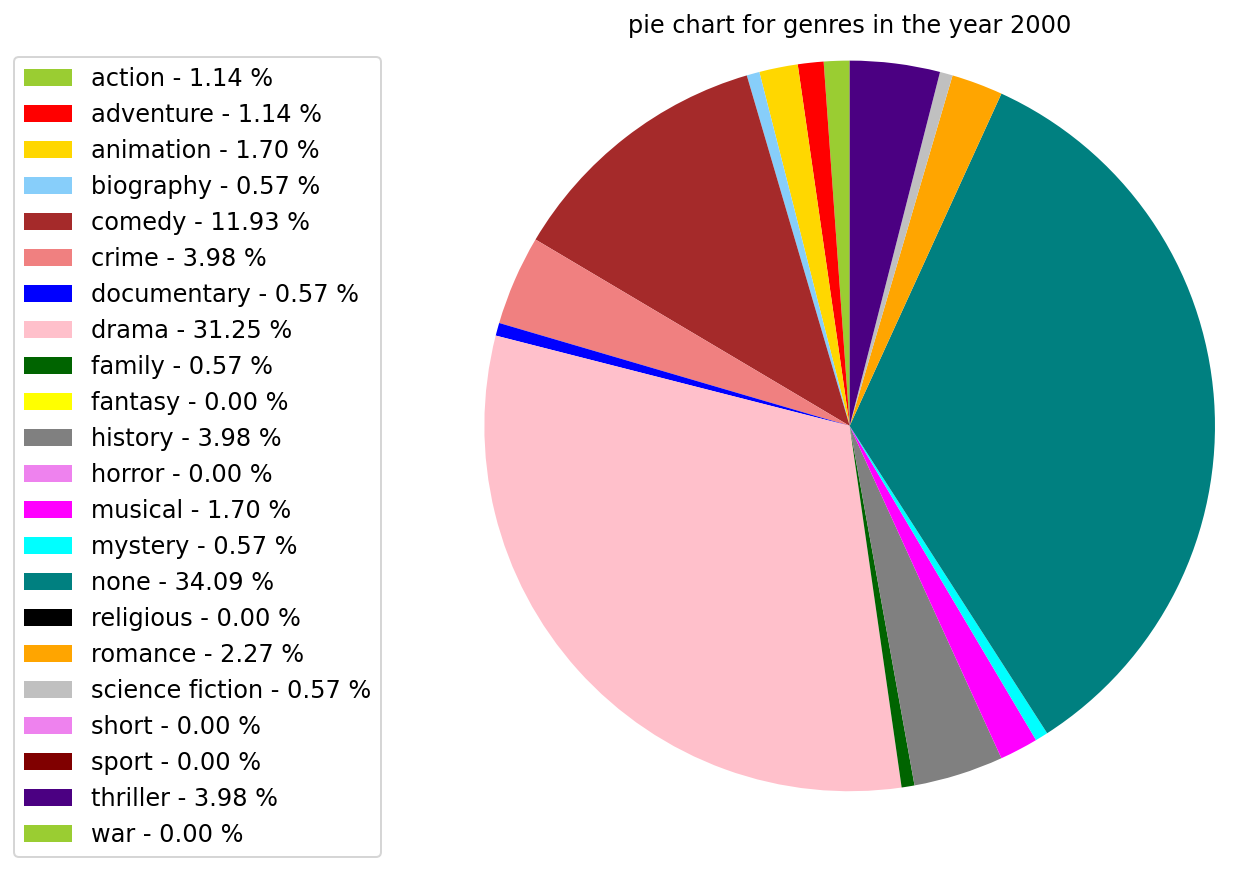

In [59]:
colors = ['yellowgreen','red','gold','lightskyblue','brown','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','teal','black','orange','silver','violet','maroon','indigo']
#to set the different colours in the pie chart
porcent = 100.*movies_bygenres2000/movies_bygenres2000.sum()
#to be able to show percentage in the legend, this code was made to calculate the percentage of each genre

patches, texts = plt.pie(movies_bygenres2000, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(movie_genres, porcent)]

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.0),
           fontsize=12)
plt.title("pie chart for genres in the year 2000")

Text(0.5, 1.0, 'Bar Chart for the year 2001')

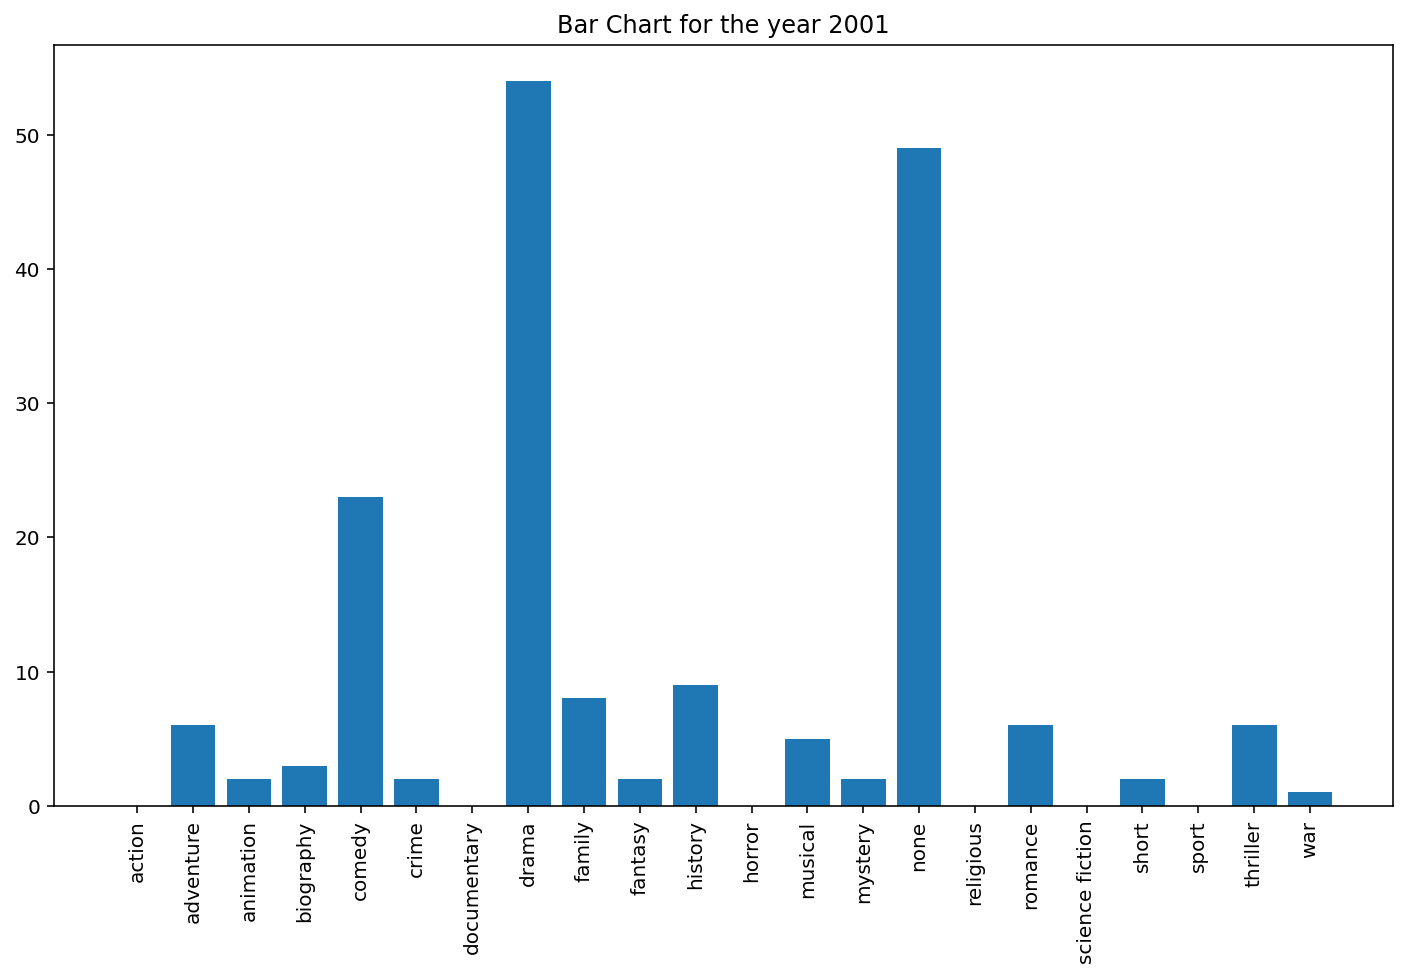

In [60]:
#code for bar chart for the number of the different genres of all the media types produced in the year 2001
bar_for2001= plt.bar(movie_genres,movies_bygenres2001)
plt.xticks(movie_genres, rotation=90) #to make x-axis labels vertical 
plt.title("Bar Chart for the year 2001")


Text(0.5, 1.0, 'pie chart for genres in the year 2001')

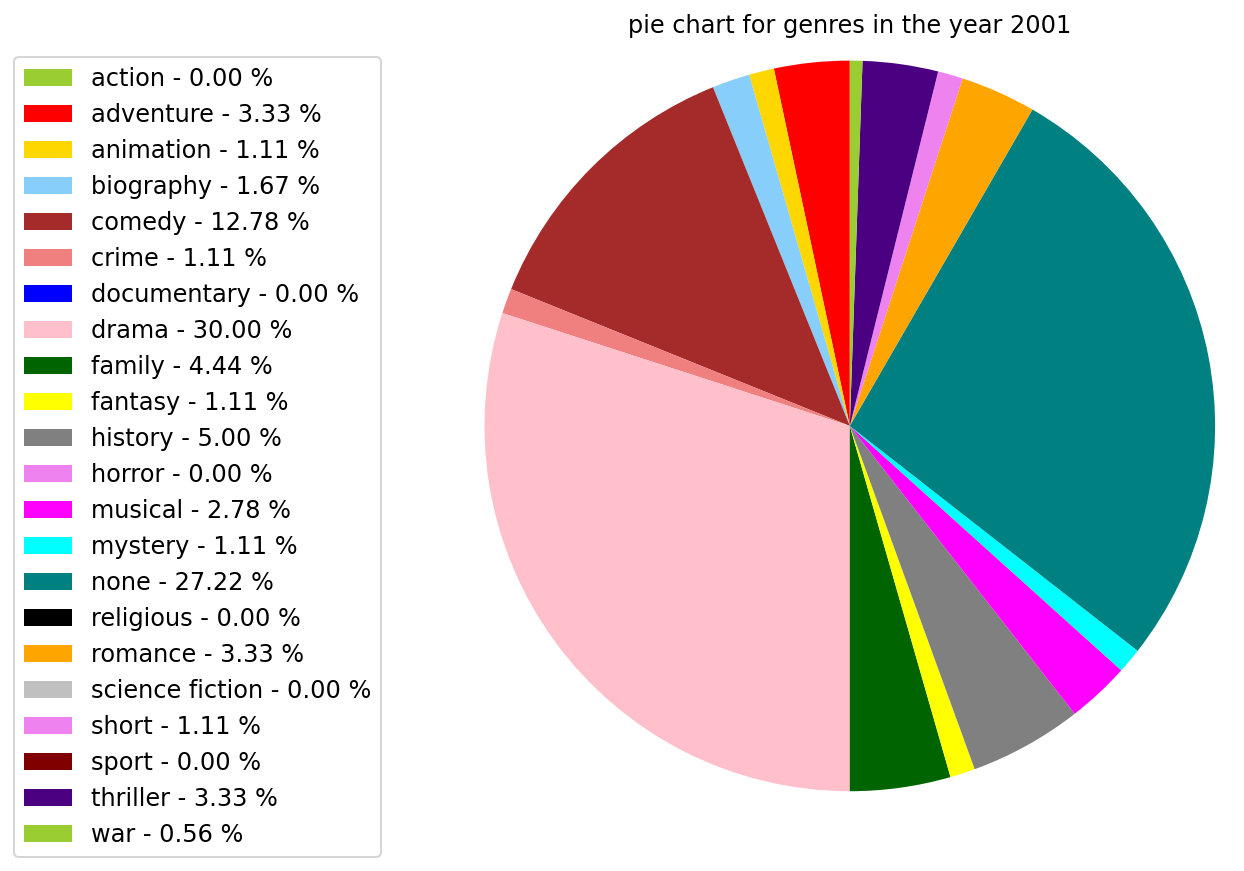

In [61]:
colors = ['yellowgreen','red','gold','lightskyblue','brown','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','teal','black','orange','silver','violet','maroon','indigo']
#to set the different colours in the pie chart
porcent = 100.*movies_bygenres2001/movies_bygenres2001.sum()
#to be able to show percentage in the legend, this code was made to calculate the percentage of each genre

patches, texts = plt.pie(movies_bygenres2001, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(movie_genres, porcent)]


plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title("pie chart for genres in the year 2001")

Text(0.5, 1.0, 'Bar Chart for the year 2002')

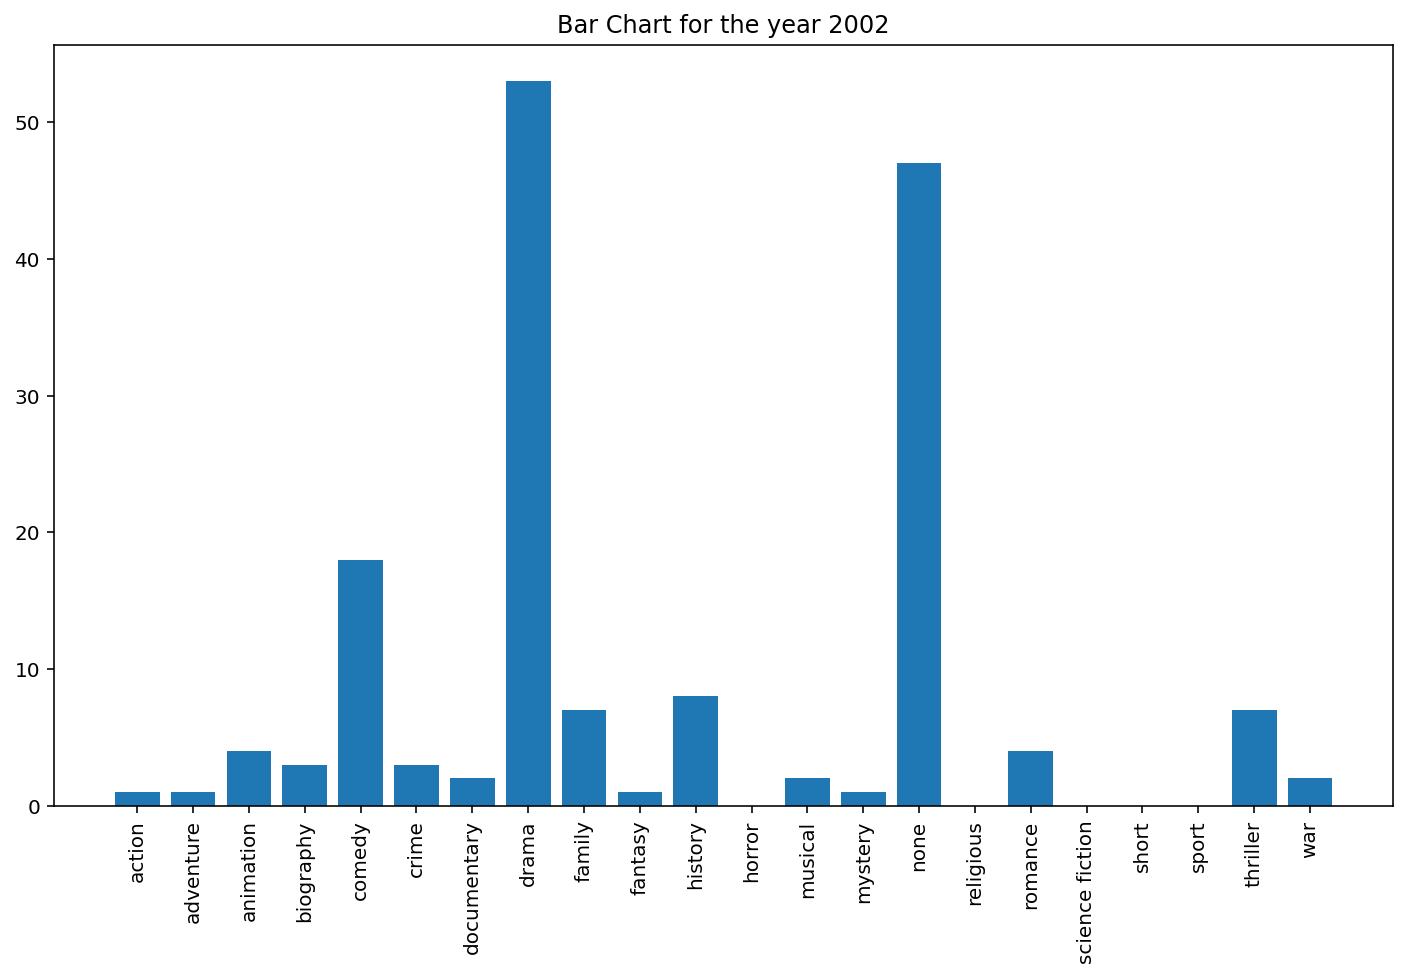

In [62]:
#code for bar chart for the number of the different genres of all the media types produced in the year 2002
bar_for2002= plt.bar(movie_genres,movies_bygenres2002)
plt.xticks(movie_genres, rotation=90) #to make x-axis labels vertical 
plt.title("Bar Chart for the year 2002")


Text(0.5, 1.0, 'pie chart for genres in the year 2002')

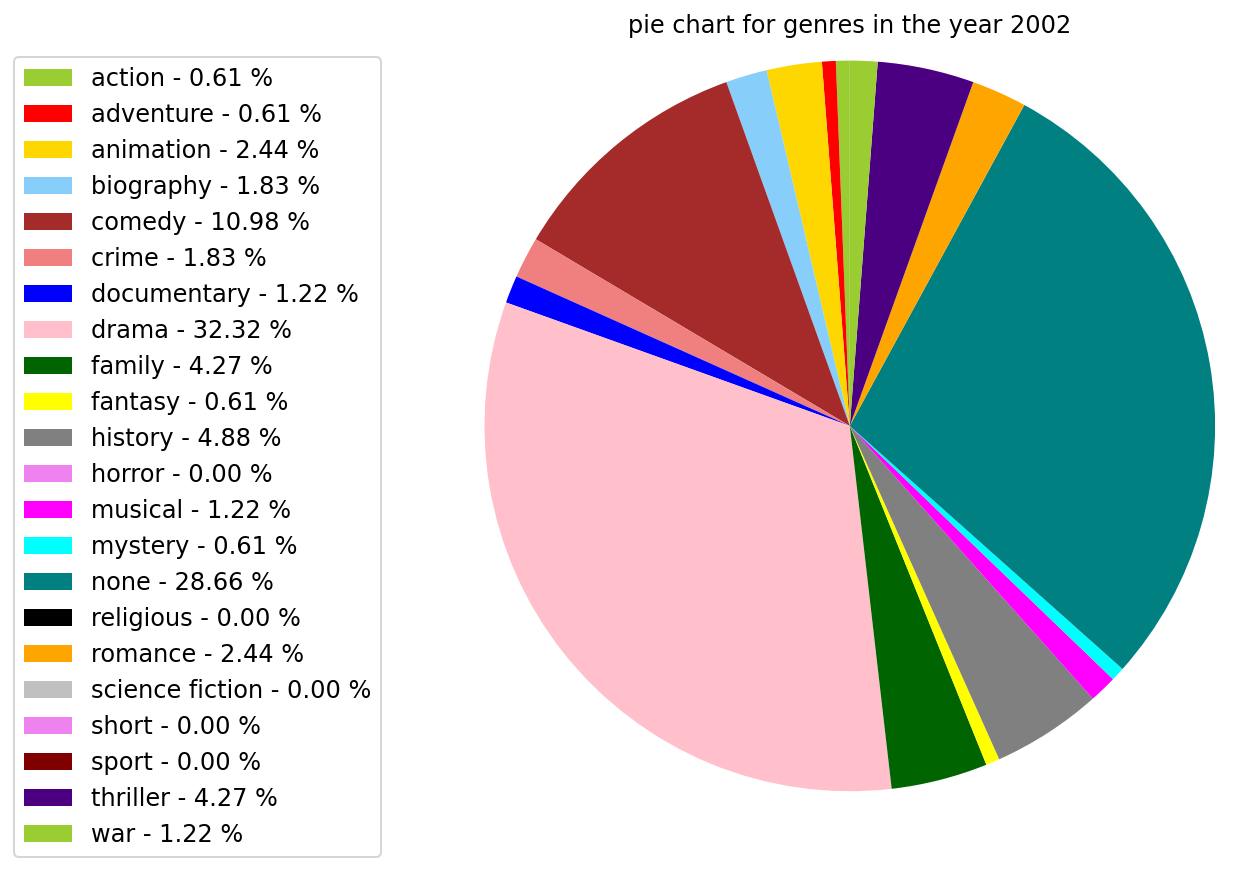

In [63]:
colors = ['yellowgreen','red','gold','lightskyblue','brown','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','teal','black','orange','silver','violet','maroon','indigo']
#to set the different colours in the pie chart
porcent = 100.*movies_bygenres2002/movies_bygenres2002.sum()
#to be able to show percentage in the legend, this code was made to calculate the percentage of each genre

patches, texts = plt.pie(movies_bygenres2002, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(movie_genres, porcent)]

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title("pie chart for genres in the year 2002")

Text(0.5, 1.0, 'Bar Chart for the year 2003')

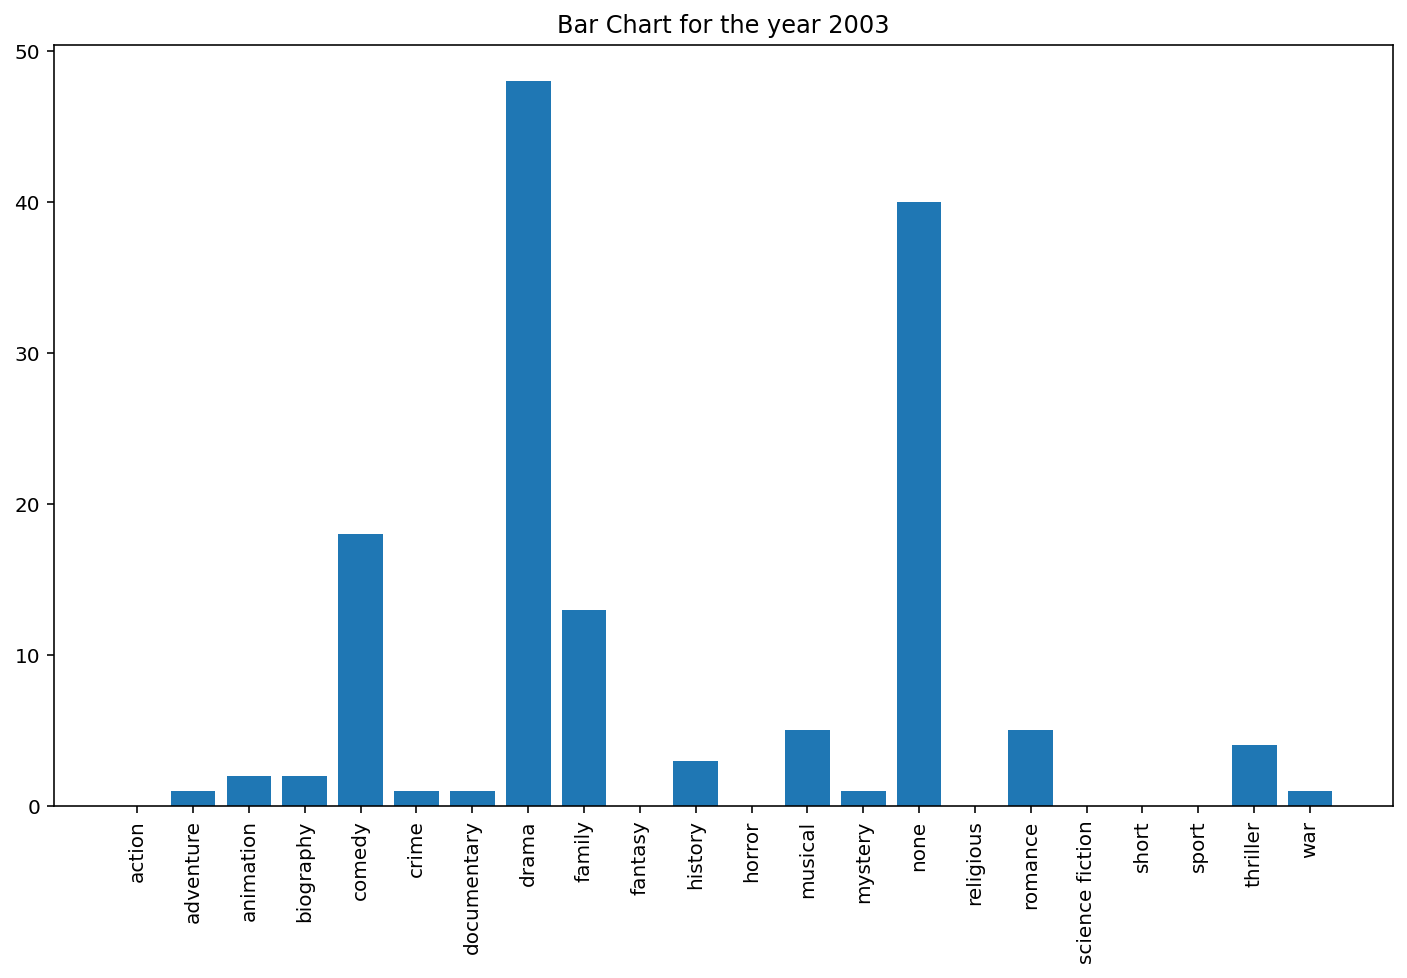

In [64]:
#code for bar chart for the number of the different genres of all the media types produced in the year 2003
bar_for2003= plt.bar(movie_genres,movies_bygenres2003)
plt.xticks(movie_genres, rotation=90) #to make x-axis labels vertical 
plt.title("Bar Chart for the year 2003")


Text(0.5, 1.0, 'pie chart for genres in the year 2003')

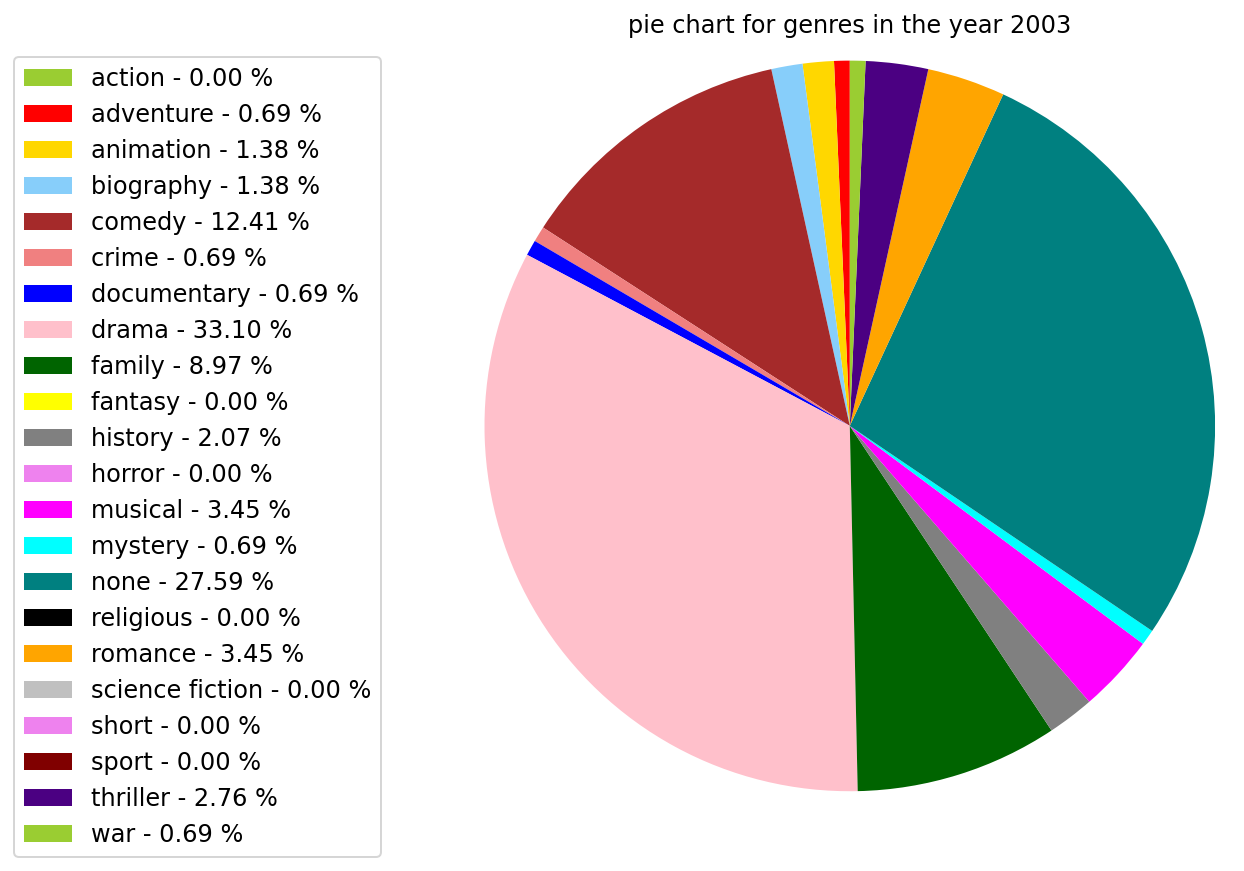

In [65]:
colors = ['yellowgreen','red','gold','lightskyblue','brown','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','teal','black','orange','silver','violet','maroon','indigo']
#to set the different colours in the pie chart
porcent = 100.*movies_bygenres2003/movies_bygenres2003.sum()
#to be able to show percentage in the legend, this code was made to calculate the percentage of each genre

patches, texts = plt.pie(movies_bygenres2003, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(movie_genres, porcent)]


plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title("pie chart for genres in the year 2003")

Text(0.5, 1.0, 'Bar Chart for the year 2004')

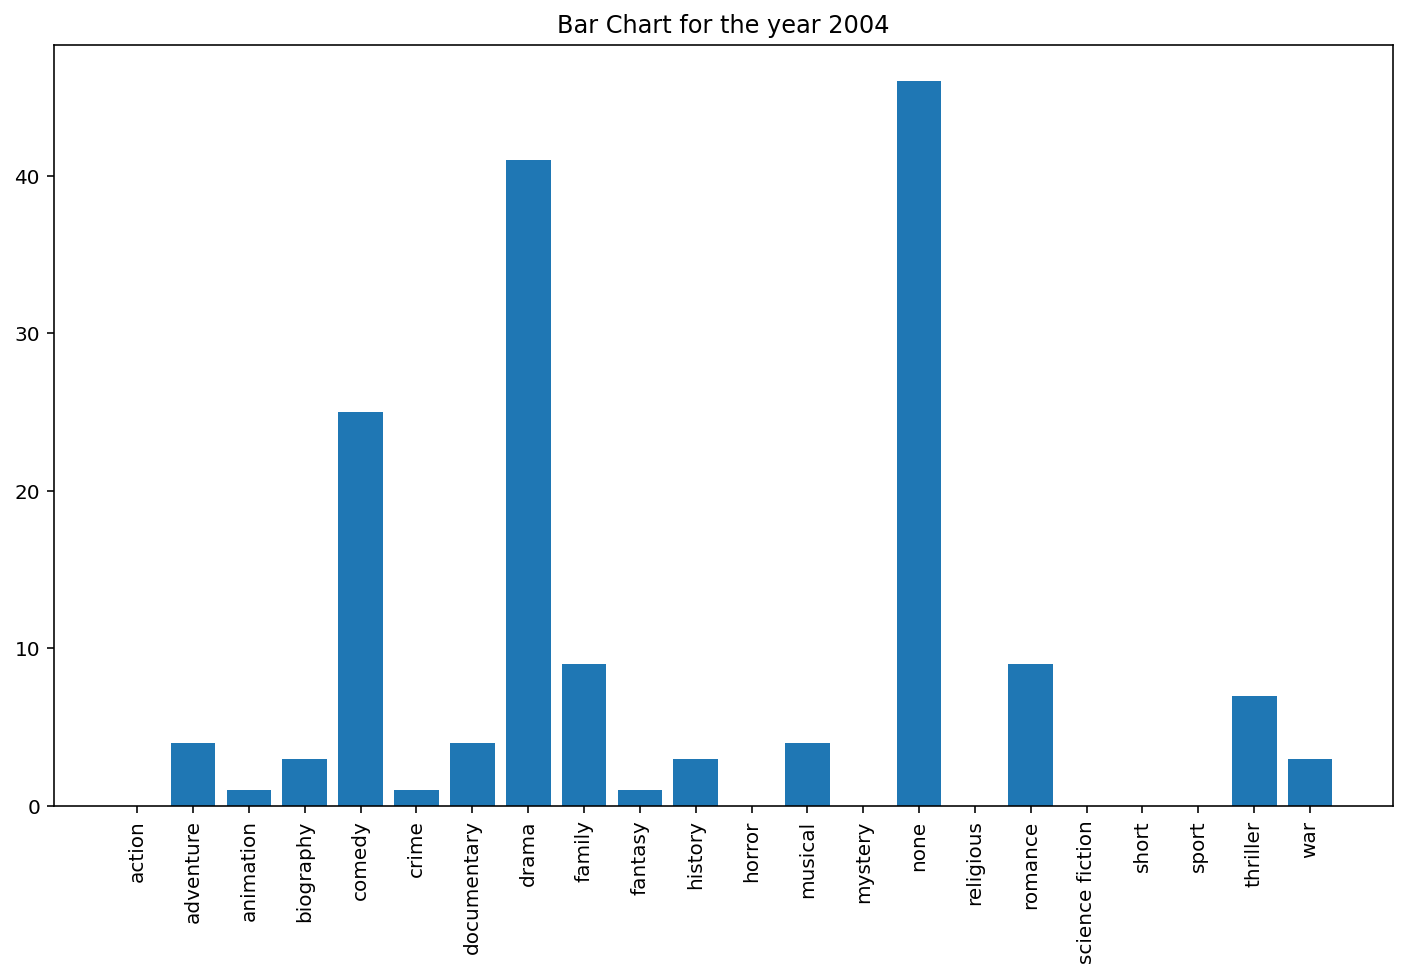

In [66]:
#code for bar chart for the number of the different genres of all the media types produced in the year 2004
bar_for2004= plt.bar(movie_genres,movies_bygenres2004)
plt.xticks(movie_genres, rotation=90) #to make x-axis labels vertical 
plt.title("Bar Chart for the year 2004")


Text(0.5, 1.0, 'pie chart for genres in the year 2004')

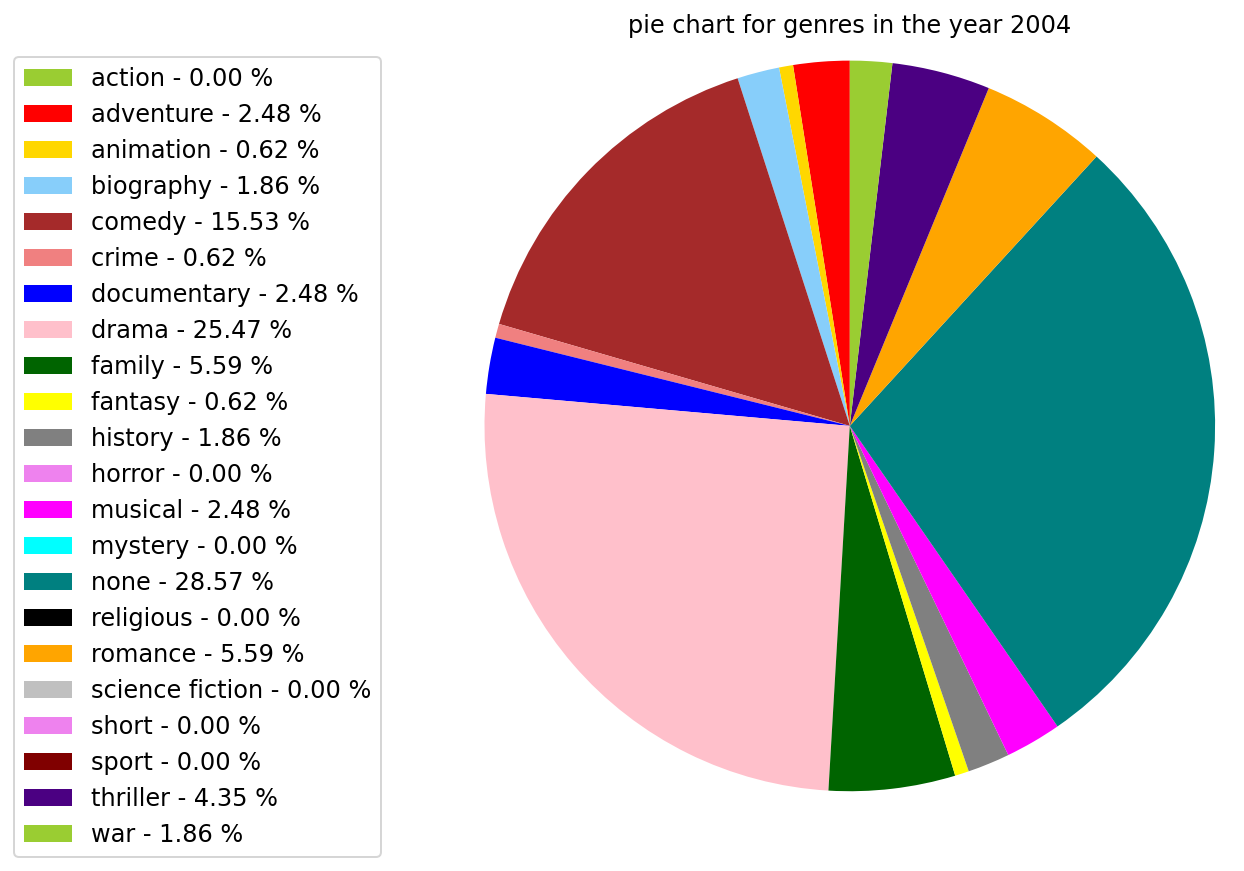

In [67]:
colors = ['yellowgreen','red','gold','lightskyblue','brown','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','teal','black','orange','silver','violet','maroon','indigo']
#to set the different colours in the pie chart
porcent = 100.*movies_bygenres2004/movies_bygenres2004.sum()
#to be able to show percentage in the legend, this code was made to calculate the percentage of each genre

patches, texts = plt.pie(movies_bygenres2004, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(movie_genres, porcent)]


plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title("pie chart for genres in the year 2004")

Text(0.5, 1.0, 'Bar Chart for the year 2005')

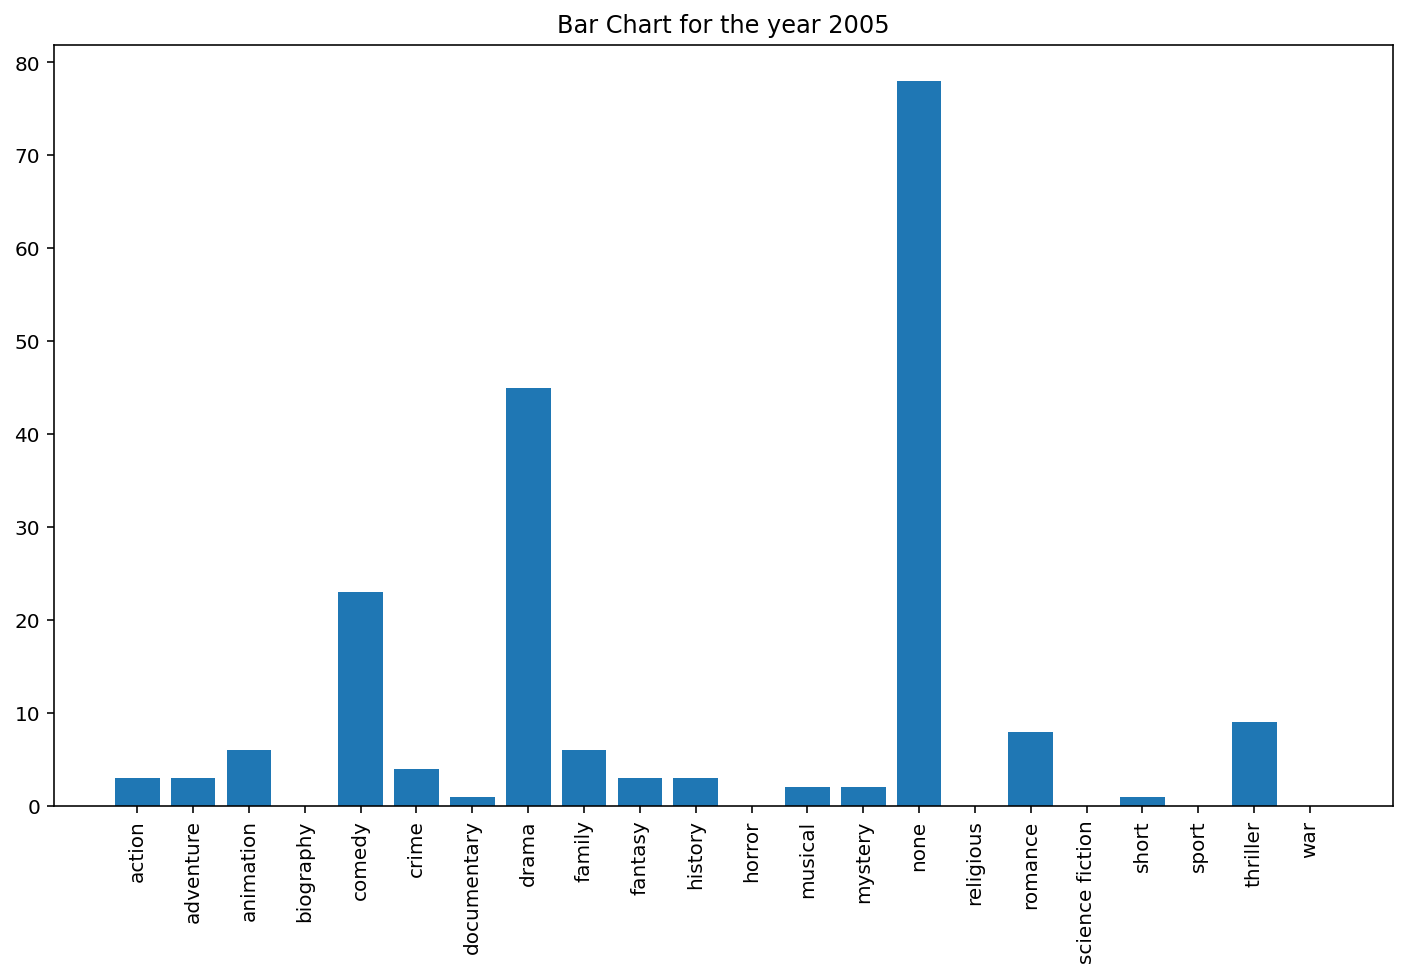

In [68]:
#code for bar chart for the number of the different genres of all the media types produced in the year 2005
bar_for2005= plt.bar(movie_genres,movies_bygenres2005)
plt.xticks(movie_genres, rotation=90) #to make x-axis labels vertical 
plt.title("Bar Chart for the year 2005")


Text(0.5, 1.0, 'pie chart for genres in the year 2005')

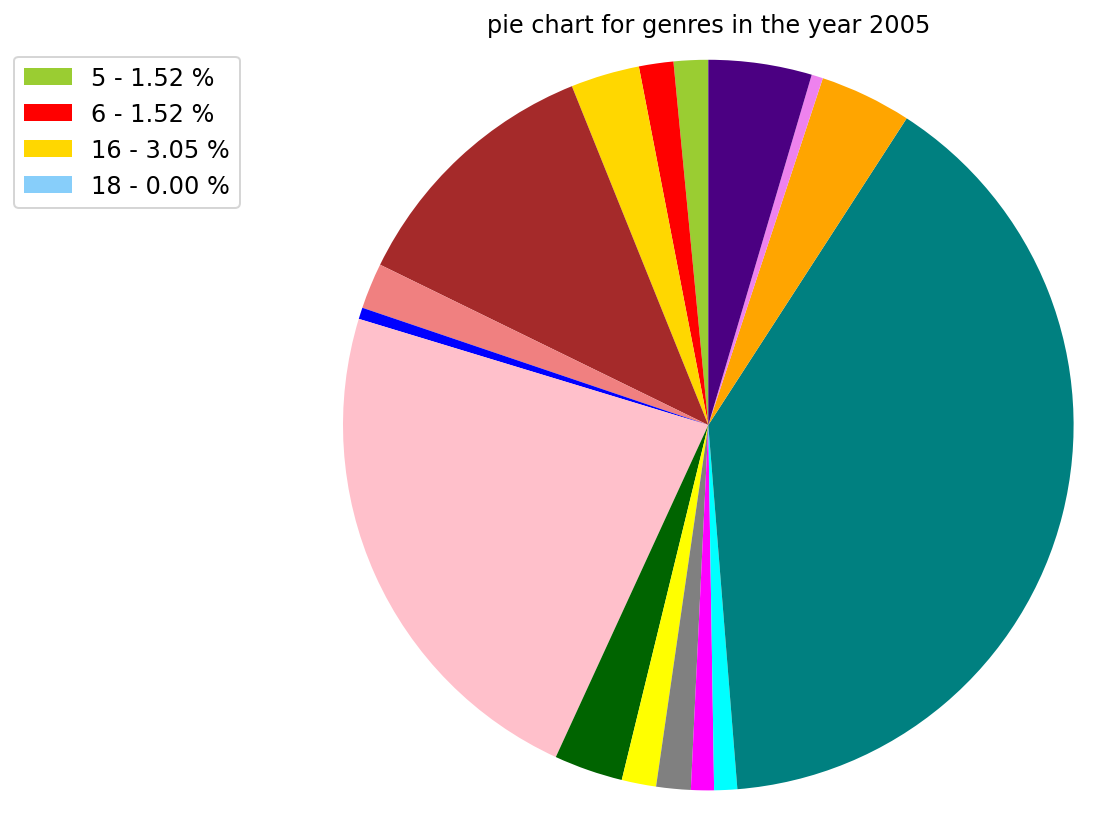

In [69]:
colors = ['yellowgreen','red','gold','lightskyblue','brown','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','teal','black','orange','silver','violet','maroon','indigo']
#to set the different colours in the pie chart
porcent = 100.*movies_bygenres2005/movies_bygenres2005.sum()
#to be able to show percentage in the legend, this code was made to calculate the percentage of each genre

patches, texts = plt.pie(movies_bygenres2005, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title("pie chart for genres in the year 2005")

Text(0.5, 1.0, 'Bar Chart for the year 2006')

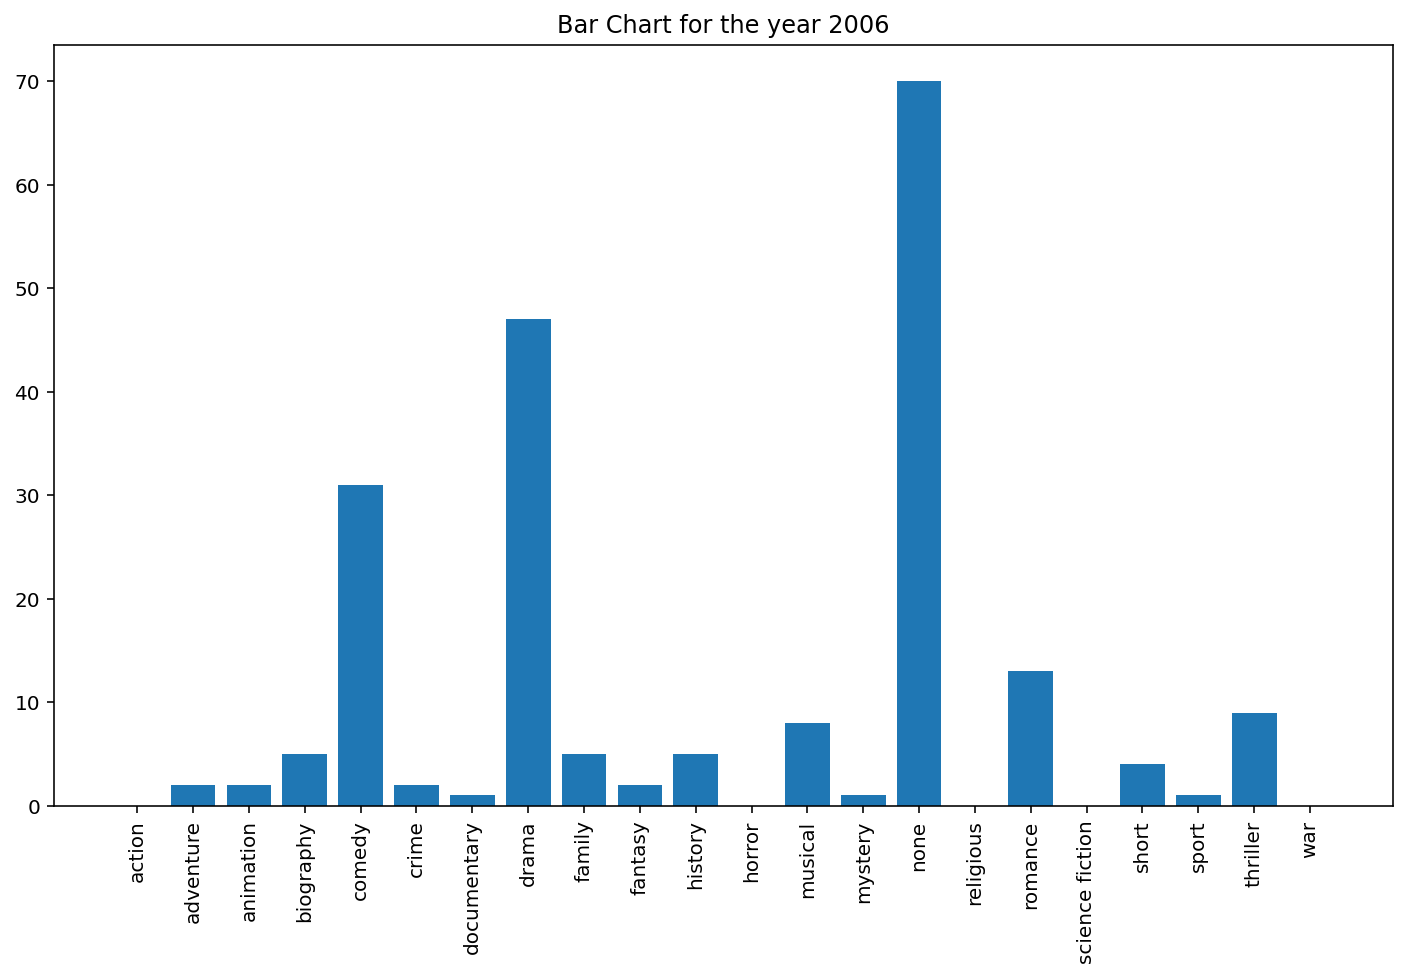

In [70]:
#code for bar chart for the number of the different genres of all the media types produced in the year 2006
bar_for2006= plt.bar(movie_genres,movies_bygenres2006)
plt.xticks(movie_genres, rotation=90) #to make x-axis labels vertical 
plt.title("Bar Chart for the year 2006")


Text(0.5, 1.0, 'pie chart for genres in the year 2006')

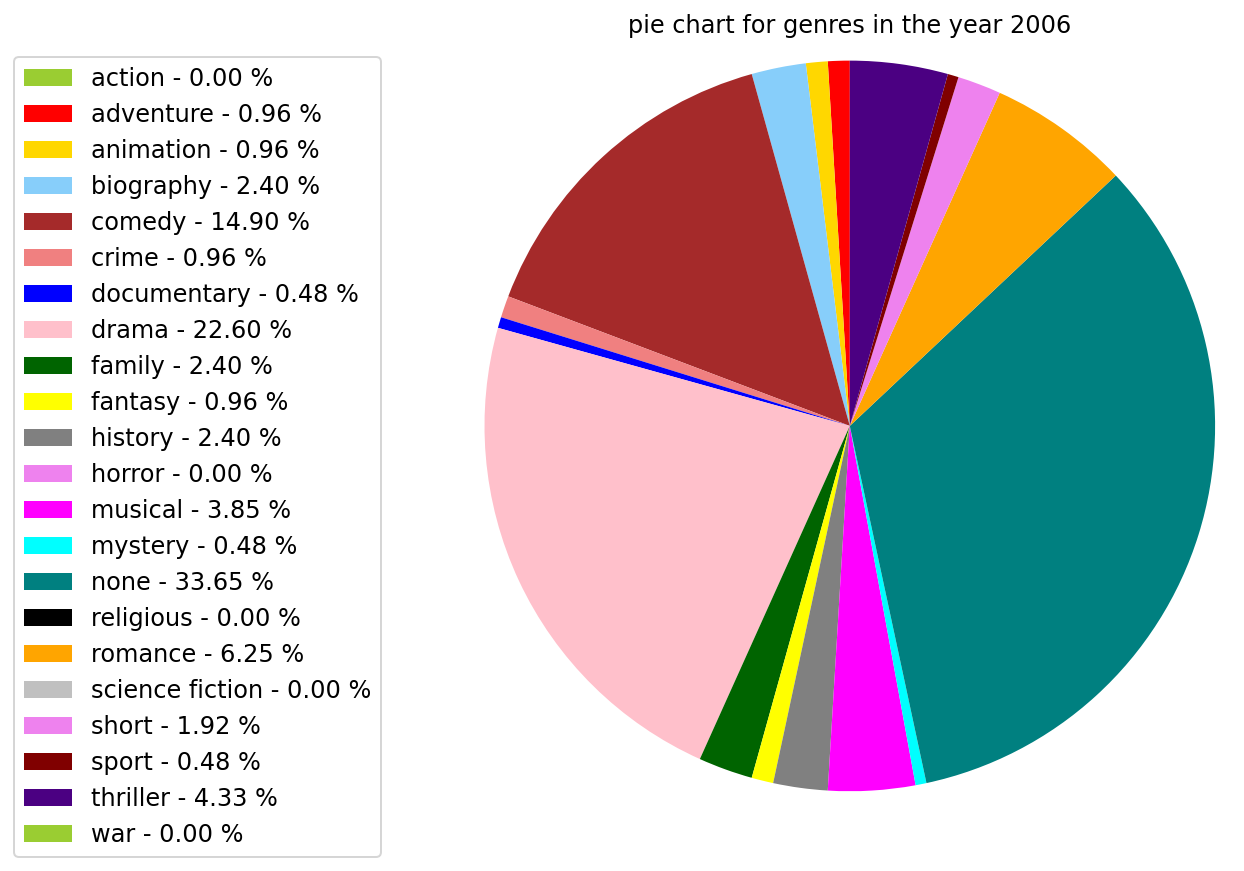

In [71]:
colors = ['yellowgreen','red','gold','lightskyblue','brown','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','teal','black','orange','silver','violet','maroon','indigo']
#to set the different colours in the pie chart
porcent = 100.*movies_bygenres2006/movies_bygenres2006.sum()
#to be able to show percentage in the legend, this code was made to calculate the percentage of each genre

patches, texts = plt.pie(movies_bygenres2006, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(movie_genres, porcent)]


plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title("pie chart for genres in the year 2006")

Text(0.5, 1.0, 'Bar Chart for the year 2007')

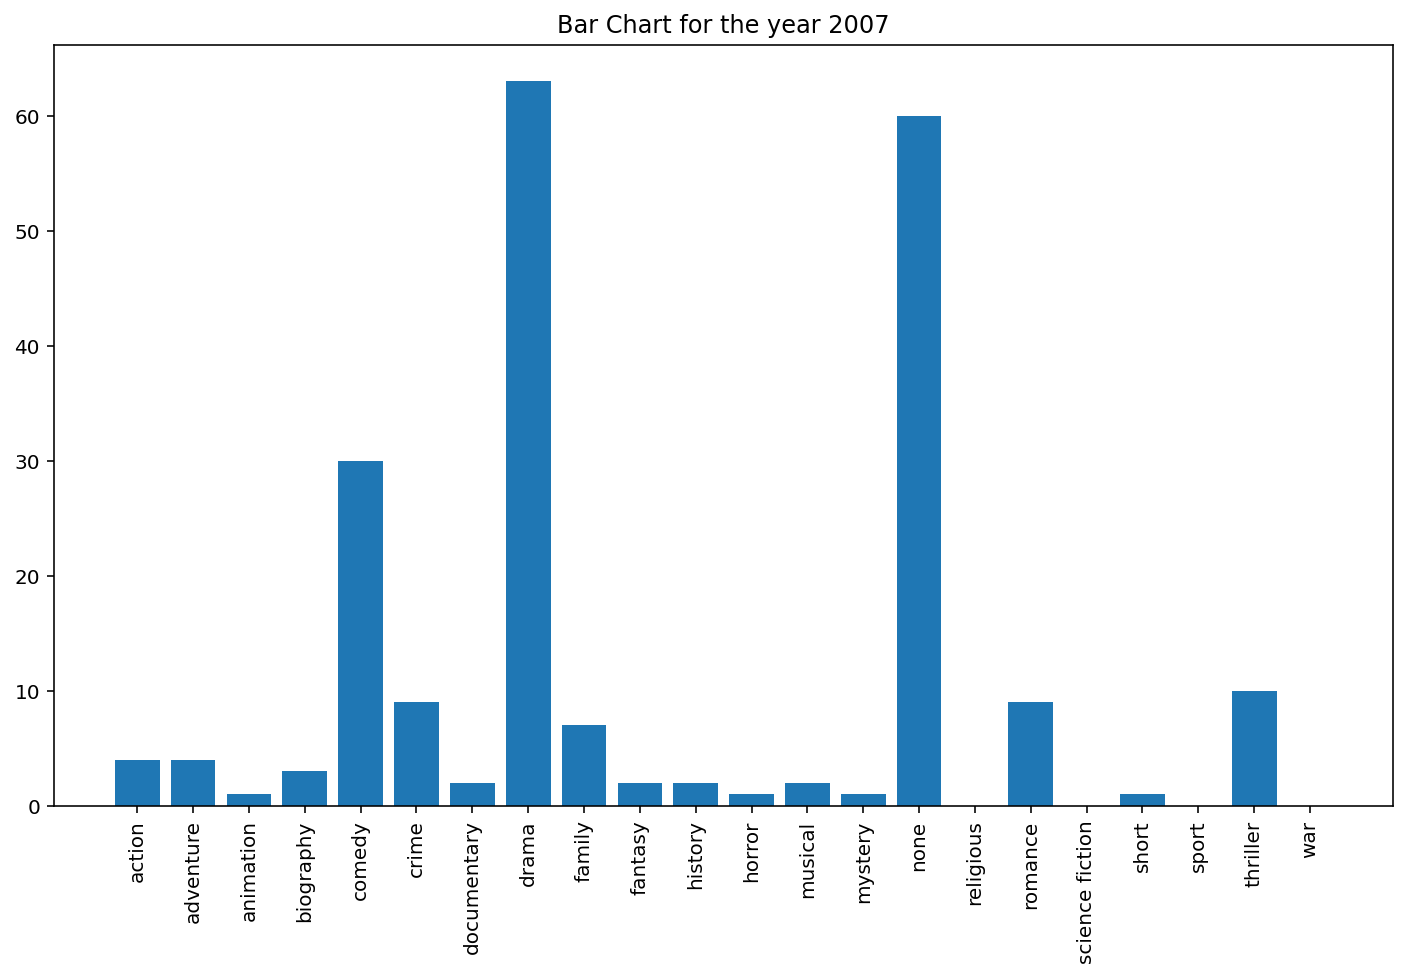

In [72]:
#code for bar chart for the number of the different genres of all the media types produced in the year 2007
bar_for2007= plt.bar(movie_genres,movies_bygenres2007)
plt.xticks(movie_genres, rotation=90) #to make x-axis labels vertical 
plt.title("Bar Chart for the year 2007")


Text(0.5, 1.0, 'pie chart for genres in the year 2007')

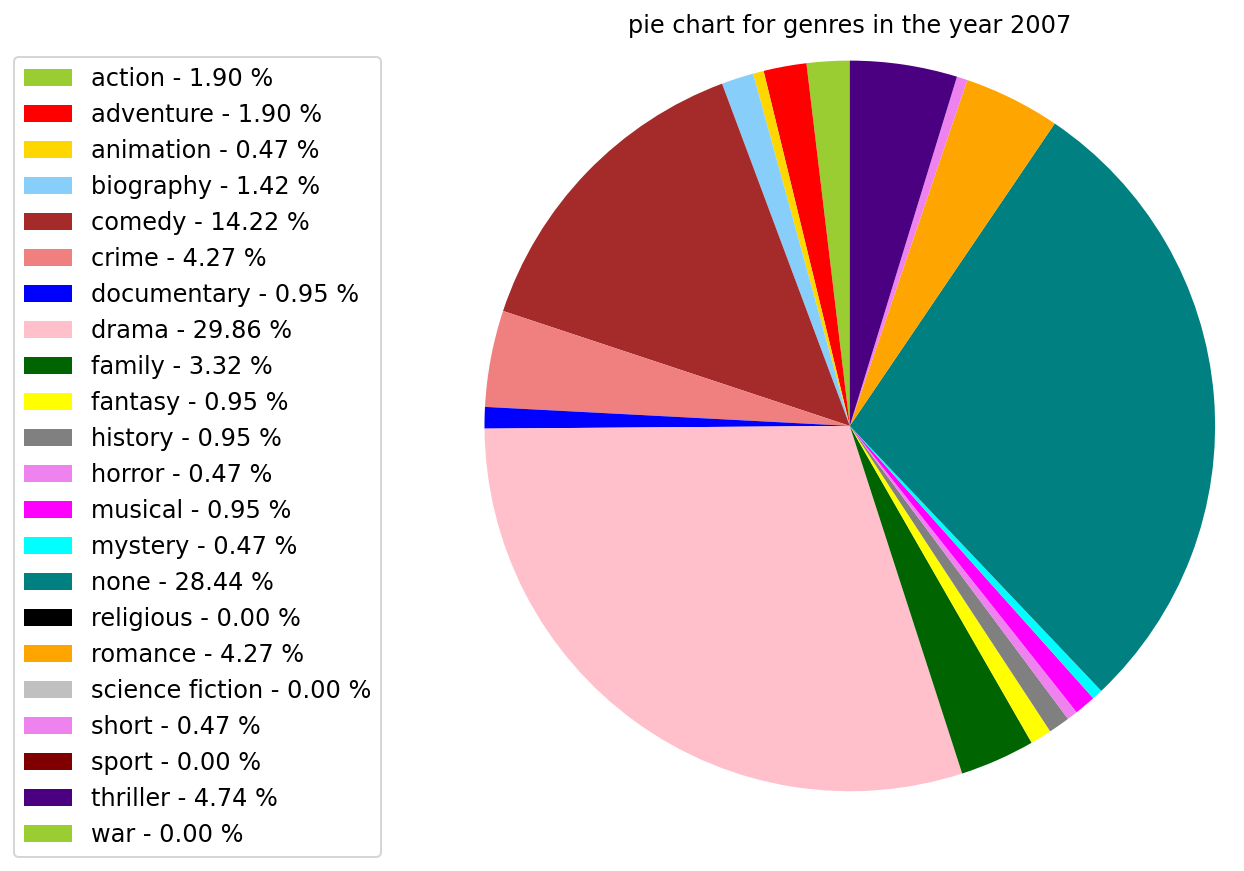

In [73]:
colors = ['yellowgreen','red','gold','lightskyblue','brown','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','teal','black','orange','silver','violet','maroon','indigo']
#to set the different colours in the pie chart
porcent = 100.*movies_bygenres2007/movies_bygenres2007.sum()
#to be able to show percentage in the legend, this code was made to calculate the percentage of each genre

patches, texts = plt.pie(movies_bygenres2007, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(movie_genres, porcent)]

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title("pie chart for genres in the year 2007")

Text(0.5, 1.0, 'Bar Chart for the year 2008')

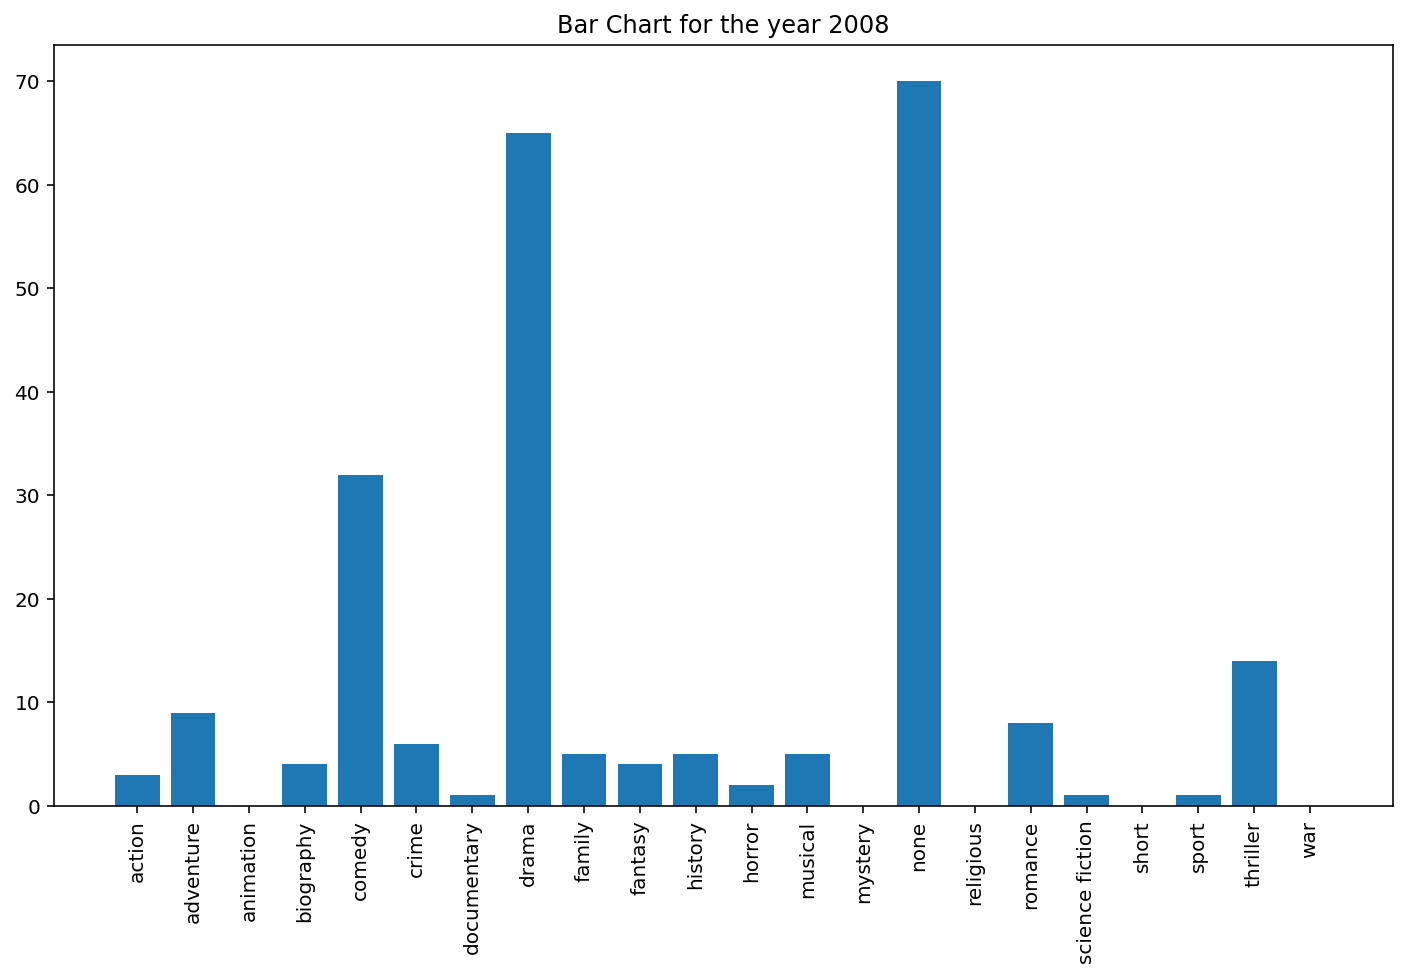

In [74]:
#code for bar chart for the number of the different genres of all the media types produced in the year 2008
bar_for2008= plt.bar(movie_genres,movies_bygenres2008)
plt.xticks(movie_genres, rotation=90) #to make x-axis labels vertical 
plt.title("Bar Chart for the year 2008")


Text(0.5, 1.0, 'pie chart for genres in the year 2008')

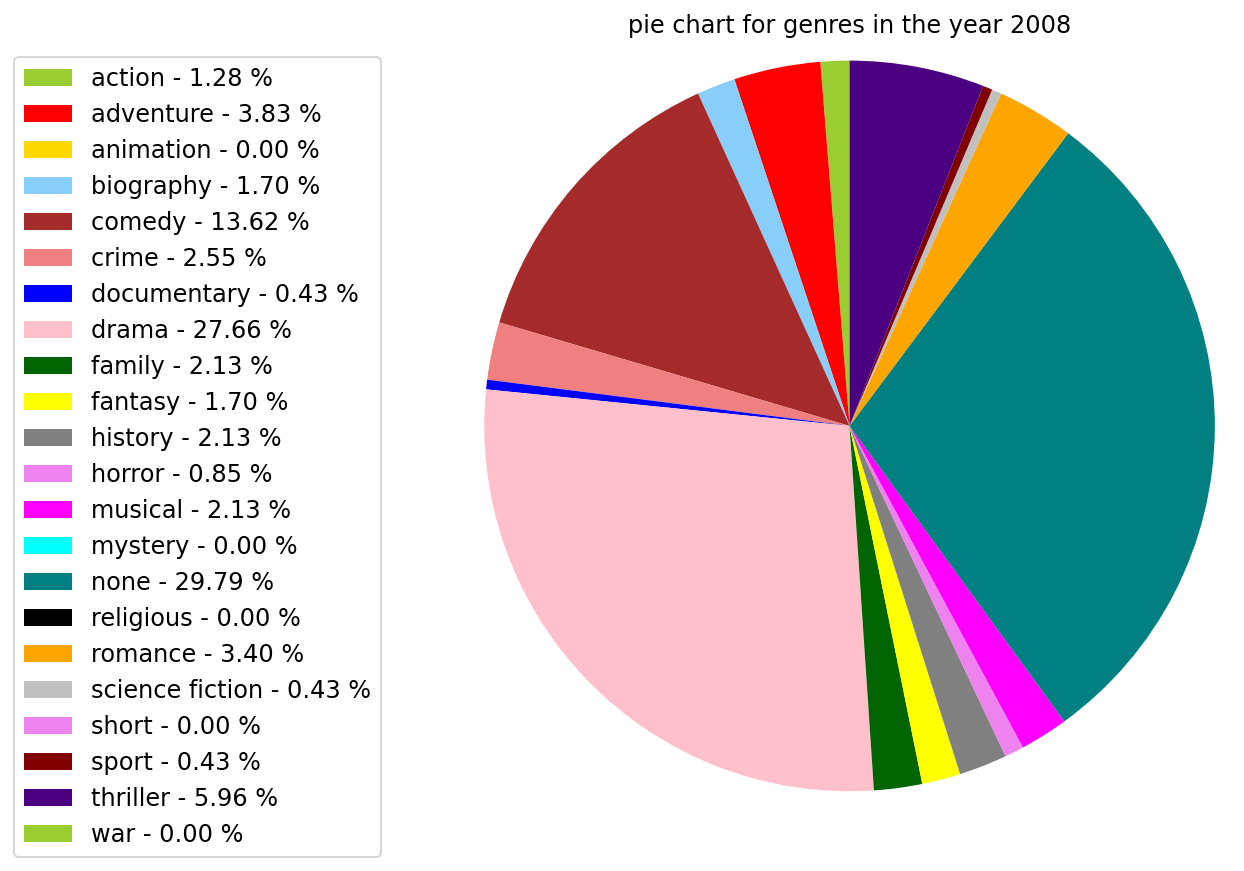

In [75]:
colors = ['yellowgreen','red','gold','lightskyblue','brown','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','teal','black','orange','silver','violet','maroon','indigo']
#to set the different colours in the pie chart
porcent = 100.*movies_bygenres2008/movies_bygenres2008.sum()
#to be able to show percentage in the legend, this code was made to calculate the percentage of each genre

patches, texts = plt.pie(movies_bygenres2008, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(movie_genres, porcent)]

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title("pie chart for genres in the year 2008")

Text(0.5, 1.0, 'Bar Chart for the year 2009')

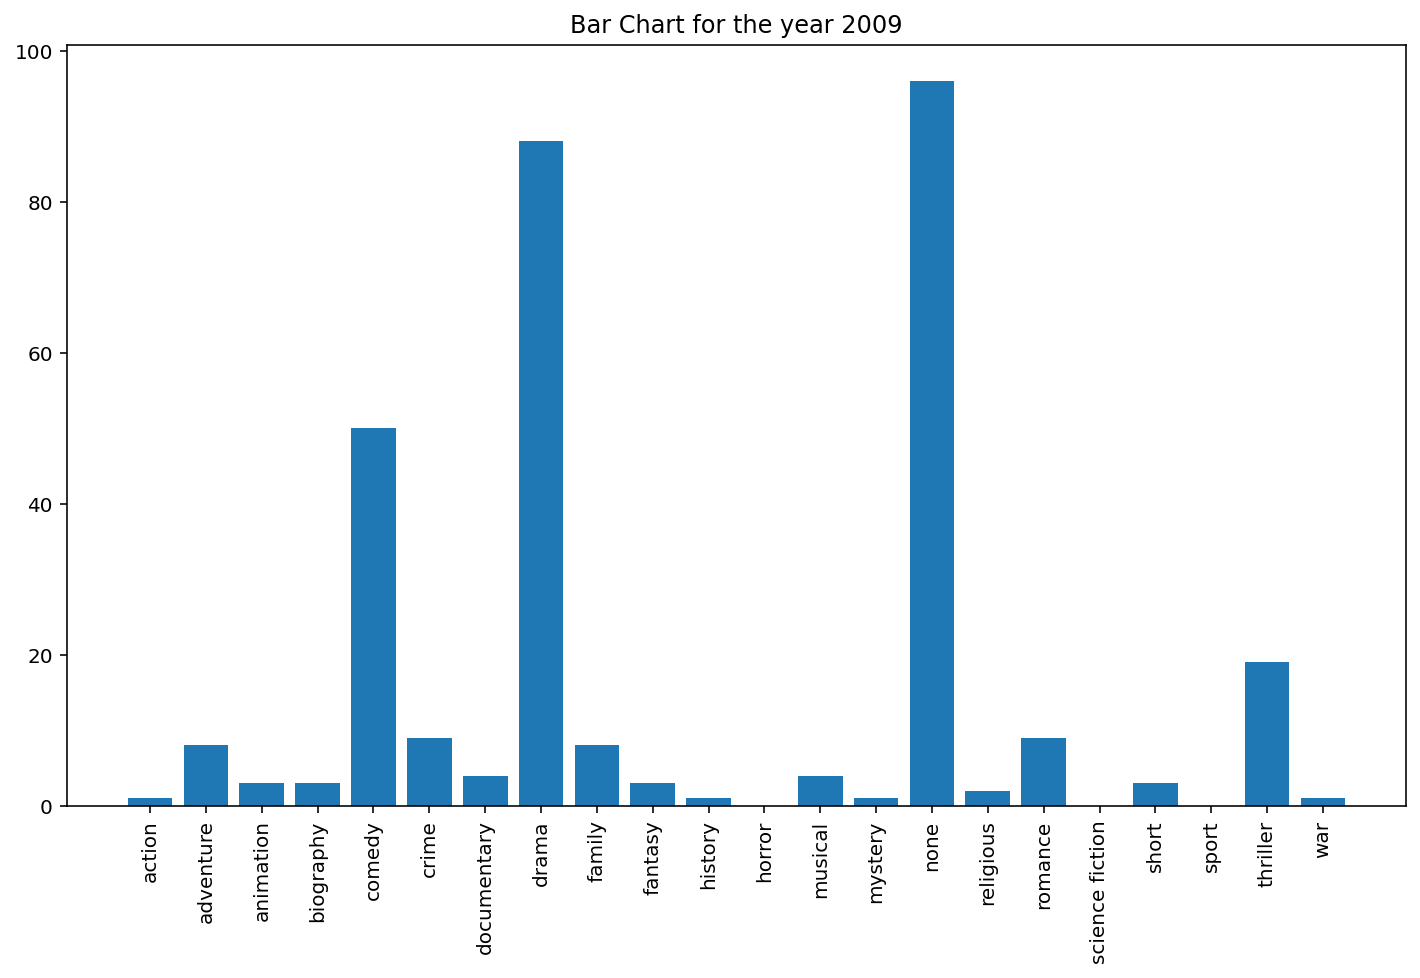

In [76]:
#code for bar chart for the number of the different genres of all the media types produced in the year 2009
bar_for2009= plt.bar(movie_genres,movies_bygenres2009)
plt.xticks(movie_genres, rotation=90) #to make x-axis labels vertical 
plt.title("Bar Chart for the year 2009")


Text(0.5, 1.0, 'pie chart for genres in the year 2009')

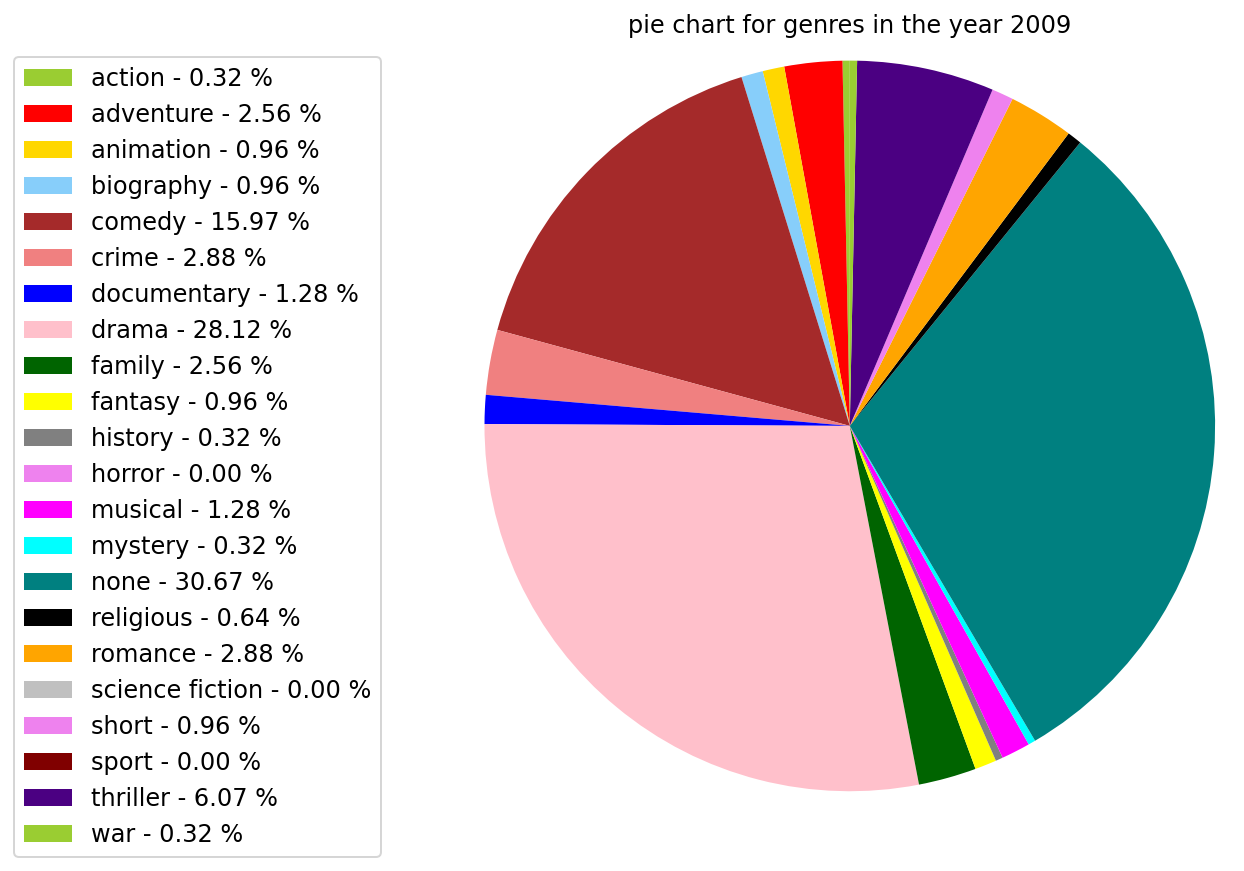

In [77]:
colors = ['yellowgreen','red','gold','lightskyblue','brown','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','teal','black','orange','silver','violet','maroon','indigo']
#to set the different colours in the pie chart
porcent = 100.*movies_bygenres2009/movies_bygenres2009.sum()
#to be able to show percentage in the legend, this code was made to calculate the percentage of each genre

patches, texts = plt.pie(movies_bygenres2009, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(movie_genres, porcent)]

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title("pie chart for genres in the year 2009")

Text(0.5, 1.0, 'Bar Chart for the year 2010')

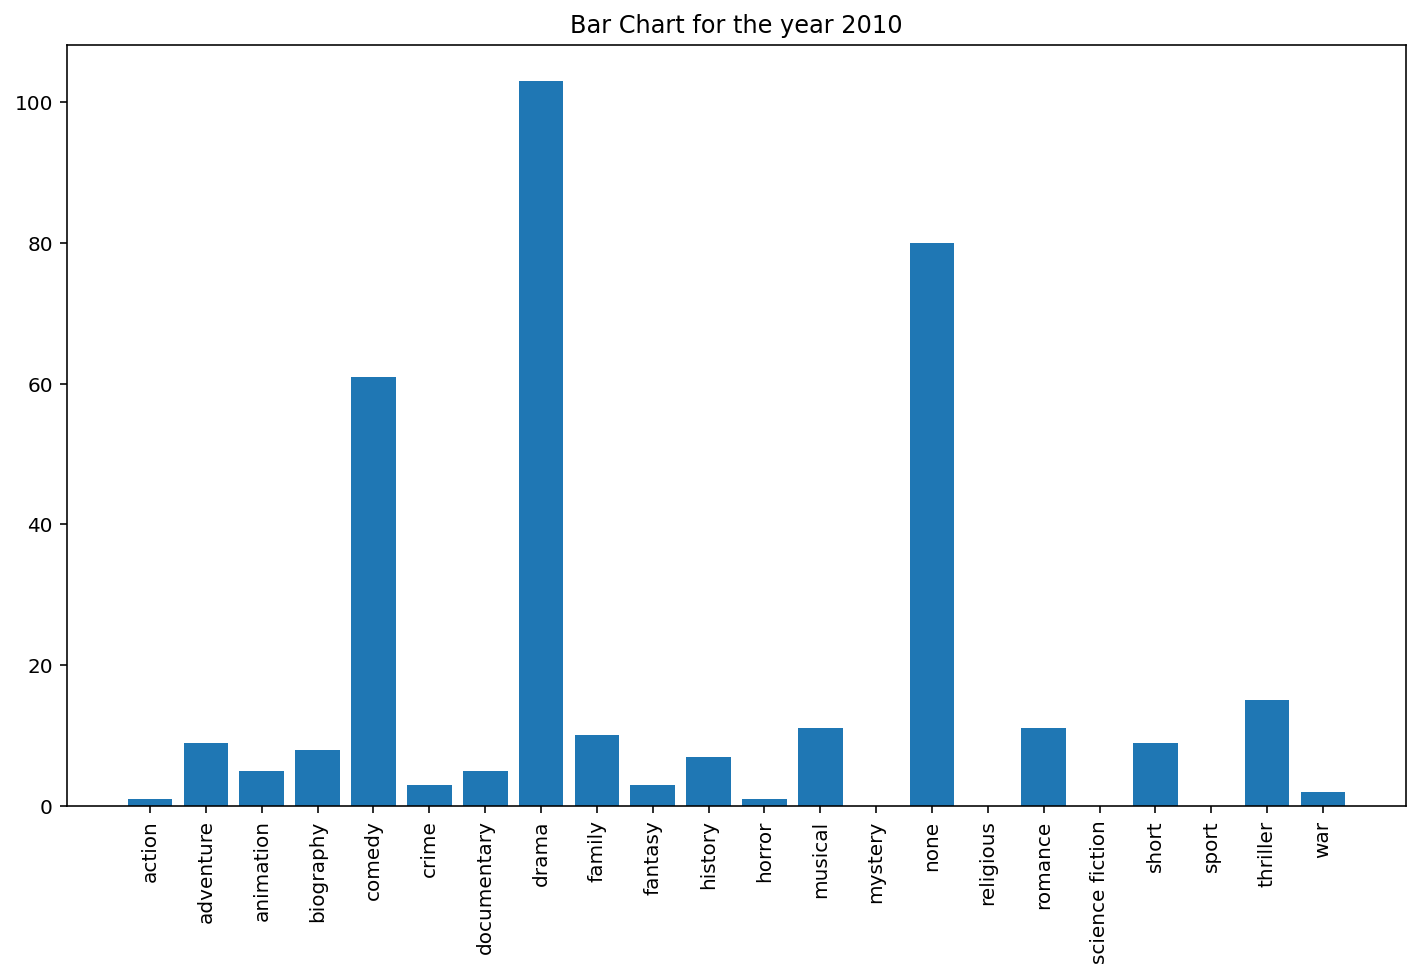

In [78]:
#code for bar chart for the number of the different genres of all the media types produced in the year 2010
bar_for2010= plt.bar(movie_genres,movies_bygenres2010)
plt.xticks(movie_genres, rotation=90) #to make x-axis labels vertical 
plt.title("Bar Chart for the year 2010")


Text(0.5, 1.0, 'pie chart for genres in the year 2010')

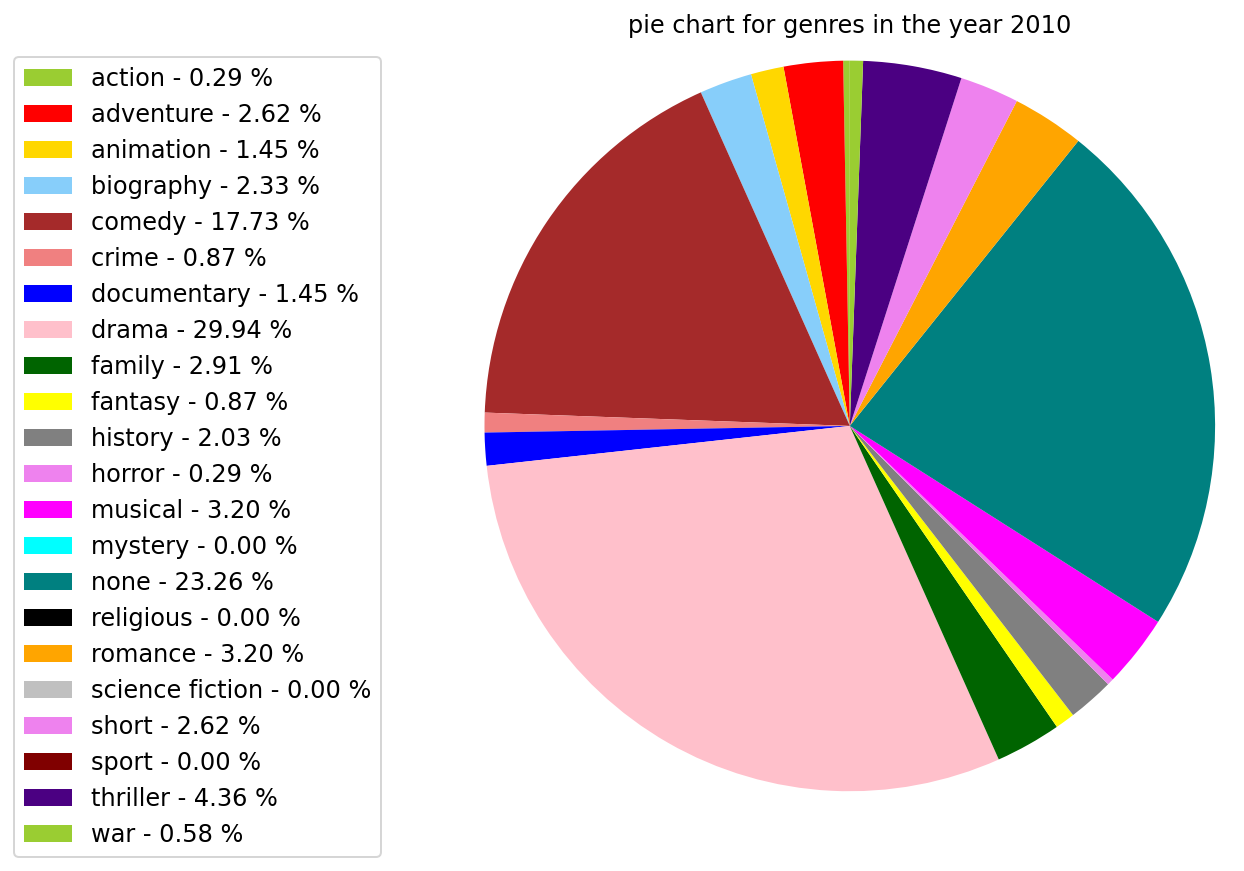

In [79]:
colors = ['yellowgreen','red','gold','lightskyblue','brown','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','teal','black','orange','silver','violet','maroon','indigo']
#to set the different colours in the pie chart
porcent = 100.*movies_bygenres2010/movies_bygenres2010.sum()
#to be able to show percentage in the legend, this code was made to calculate the percentage of each genre

patches, texts = plt.pie(movies_bygenres2010, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(movie_genres, porcent)]


plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title("pie chart for genres in the year 2010")

Text(0.5, 1.0, 'Bar Chart for the year 2011')

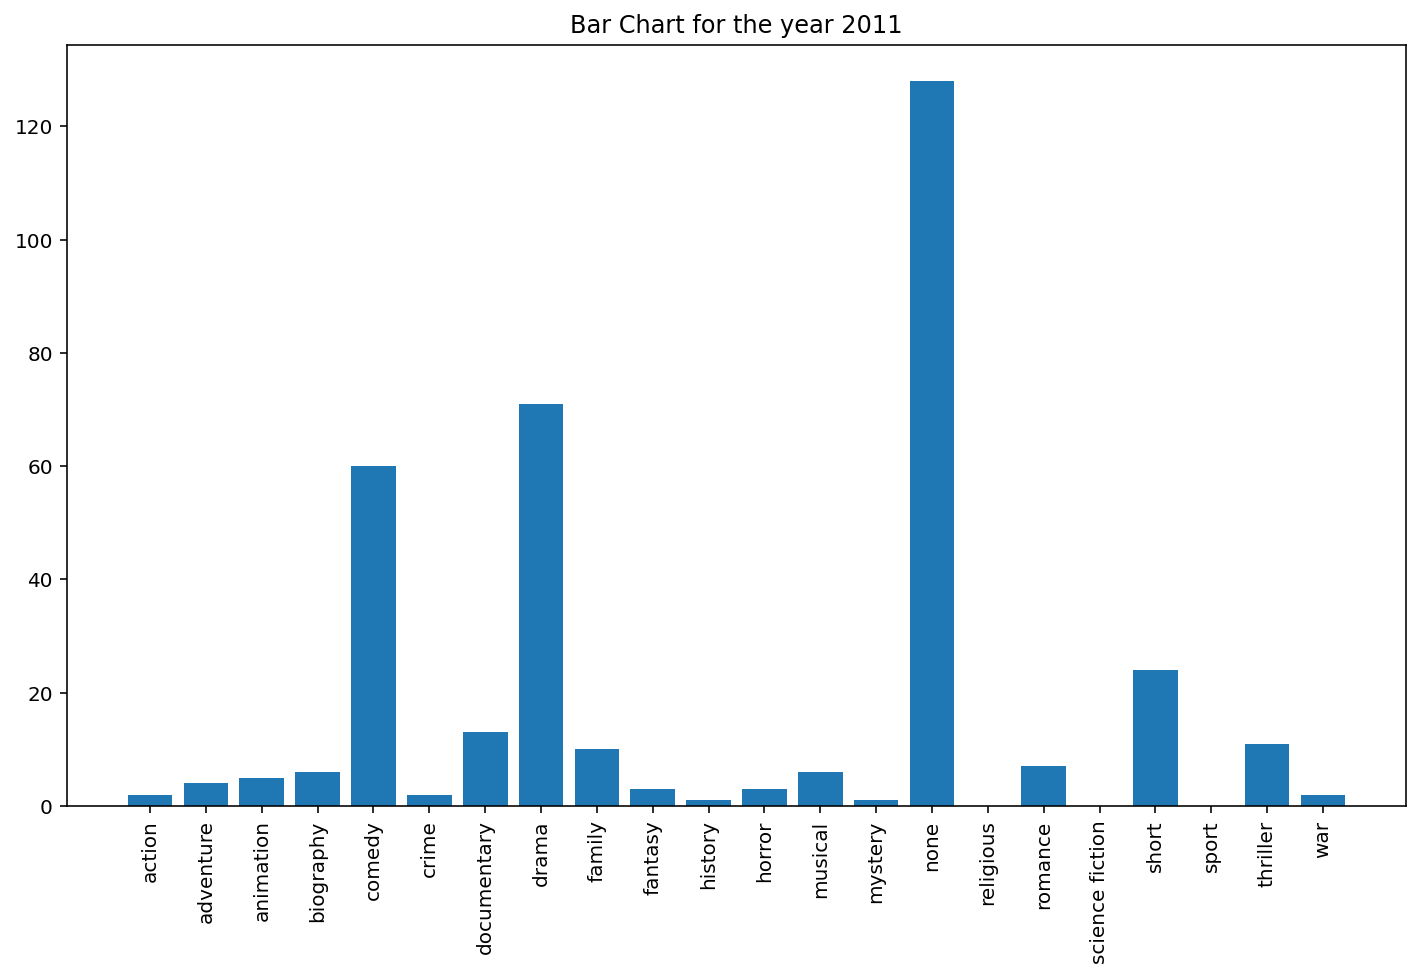

In [80]:
#code for bar chart for the number of the different genres of all the media types produced in the year 2011
bar_for2011= plt.bar(movie_genres,movies_bygenres2011)
plt.xticks(movie_genres, rotation=90) #to make x-axis labels vertical 
plt.title("Bar Chart for the year 2011")


Text(0.5, 1.0, 'pie chart for genres in the year 2011')

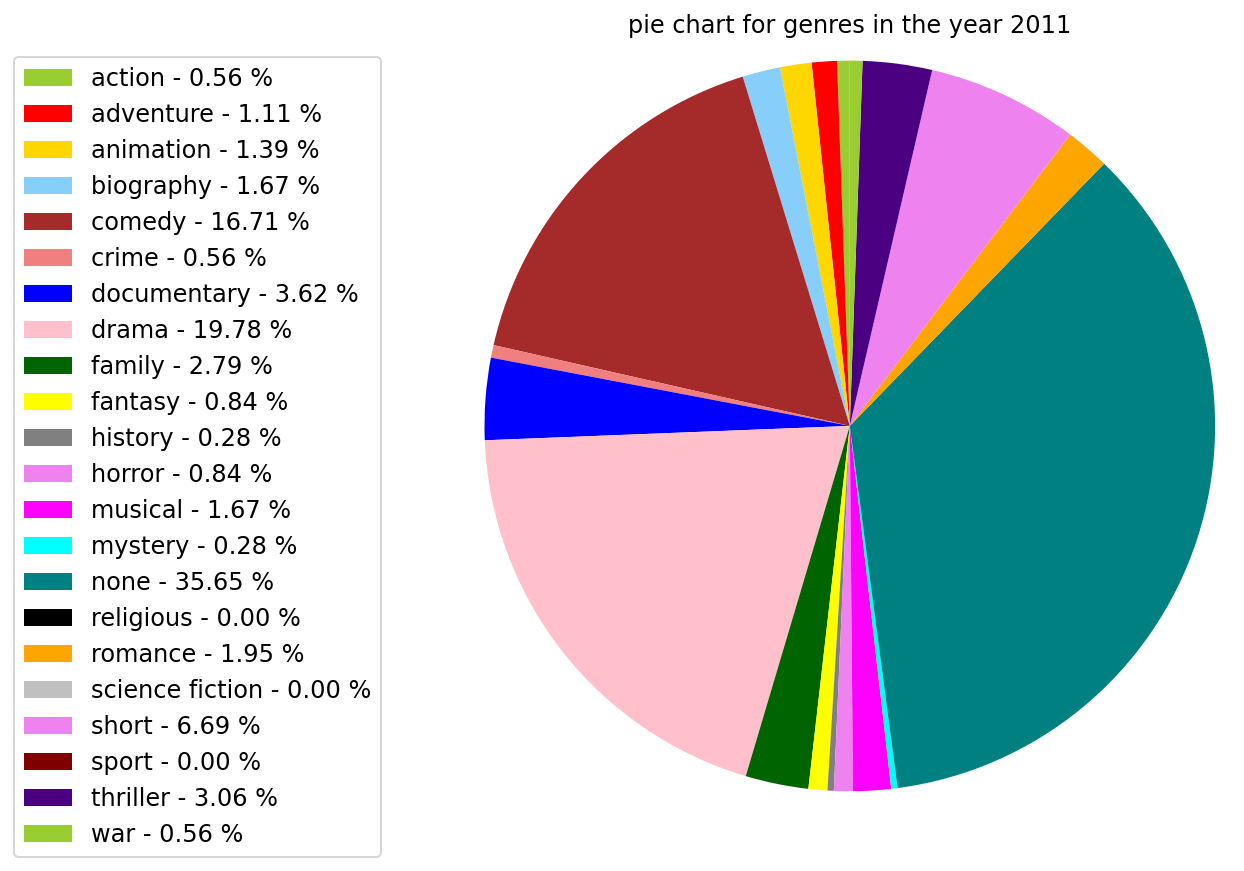

In [81]:
colors = ['yellowgreen','red','gold','lightskyblue','brown','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','teal','black','orange','silver','violet','maroon','indigo']
#to set the different colours in the pie chart
porcent = 100.*movies_bygenres2011/movies_bygenres2011.sum()
#to be able to show percentage in the legend, this code was made to calculate the percentage of each genre

patches, texts = plt.pie(movies_bygenres2011, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(movie_genres, porcent)]

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title("pie chart for genres in the year 2011")

Text(0.5, 1.0, 'Bar Chart for the year 2012')

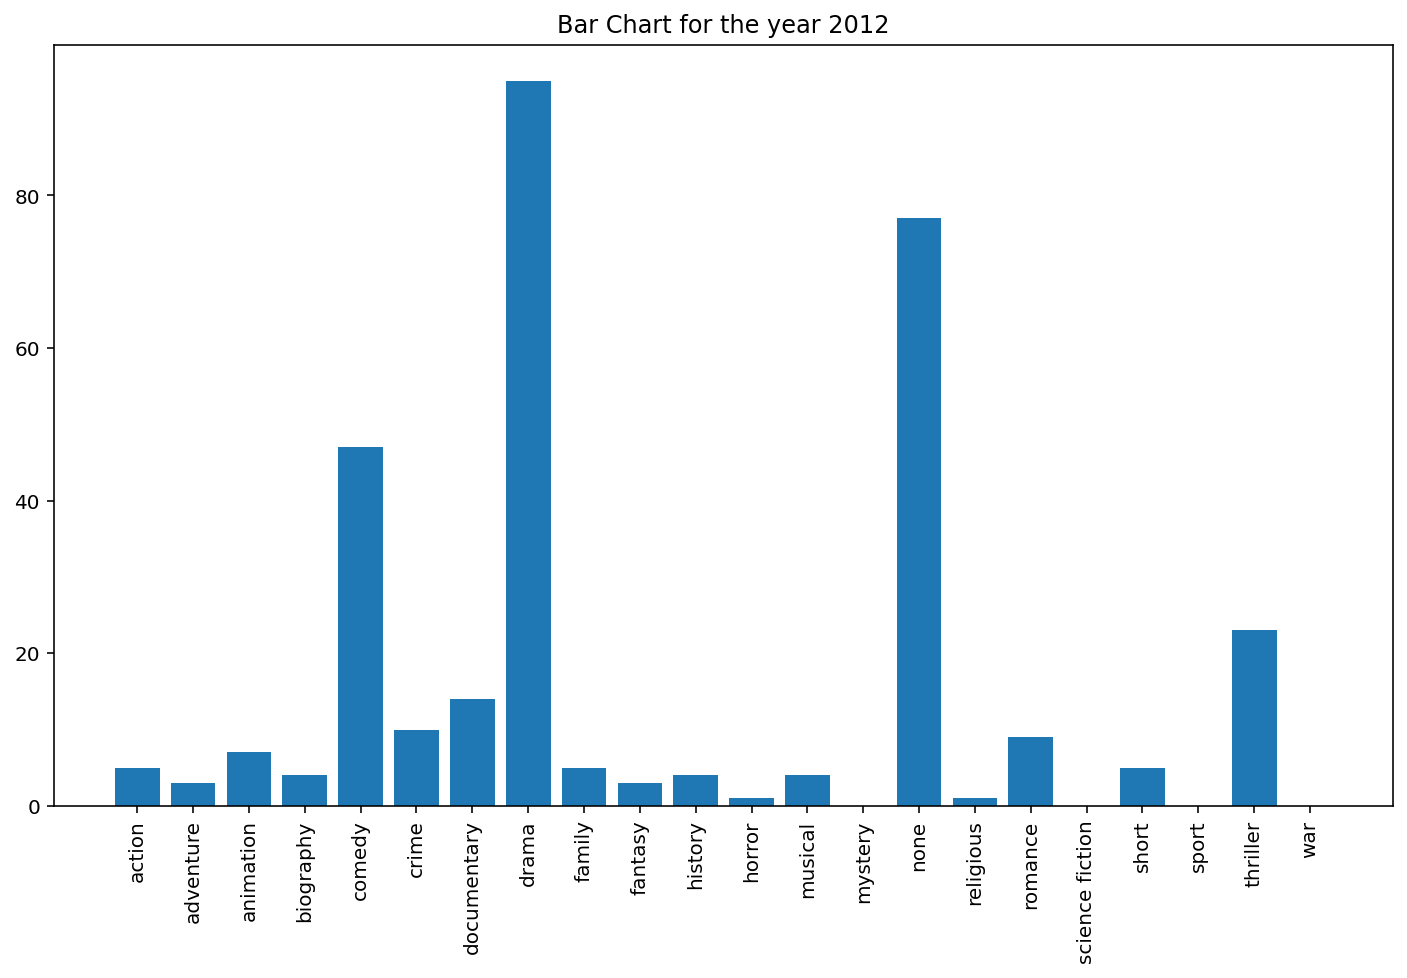

In [82]:
#code for bar chart for the number of the different genres of all the media types produced in the year 2012
bar_for2012= plt.bar(movie_genres,movies_bygenres2012)
plt.xticks(movie_genres, rotation=90) #to make x-axis labels vertical 
plt.title("Bar Chart for the year 2012")


Text(0.5, 1.0, 'pie chart for genres in the year 2012')

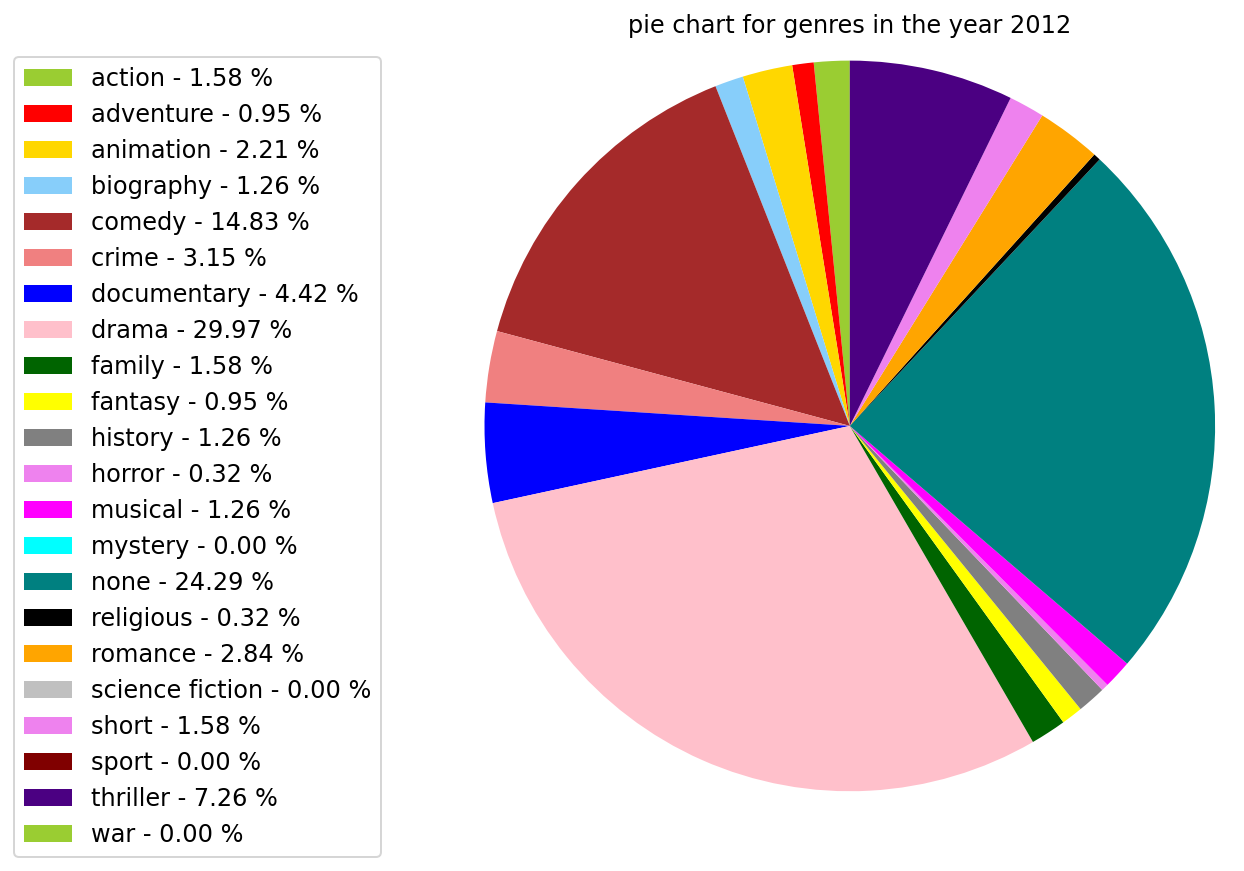

In [83]:
colors = ['yellowgreen','red','gold','lightskyblue','brown','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','teal','black','orange','silver','violet','maroon','indigo']
#to set the different colours in the pie chart
porcent = 100.*movies_bygenres2012/movies_bygenres2012.sum()
#to be able to show percentage in the legend, this code was made to calculate the percentage of each genre

patches, texts = plt.pie(movies_bygenres2012, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(movie_genres, porcent)]


plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title("pie chart for genres in the year 2012")

Text(0.5, 1.0, 'Bar Chart for the year 2013')

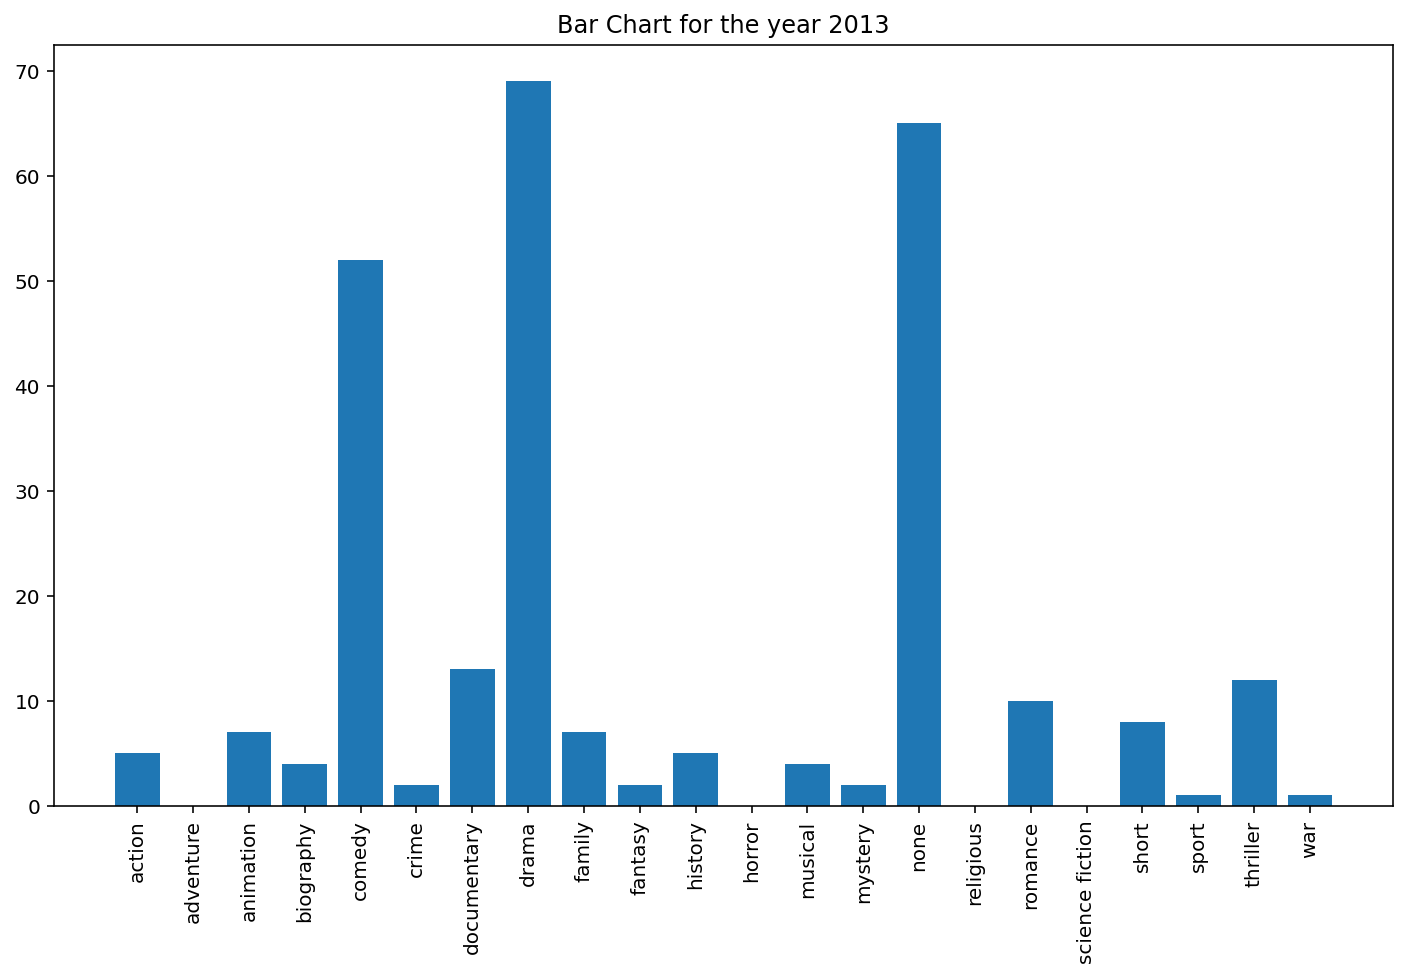

In [84]:
#code for bar chart for the number of the different genres of all the media types produced in the year 2013
bar_for2013= plt.bar(movie_genres,movies_bygenres2013)
plt.xticks(movie_genres, rotation=90) #to make x-axis labels vertical 
plt.title("Bar Chart for the year 2013")


Text(0.5, 1.0, 'pie chart for genres in the year 2013')

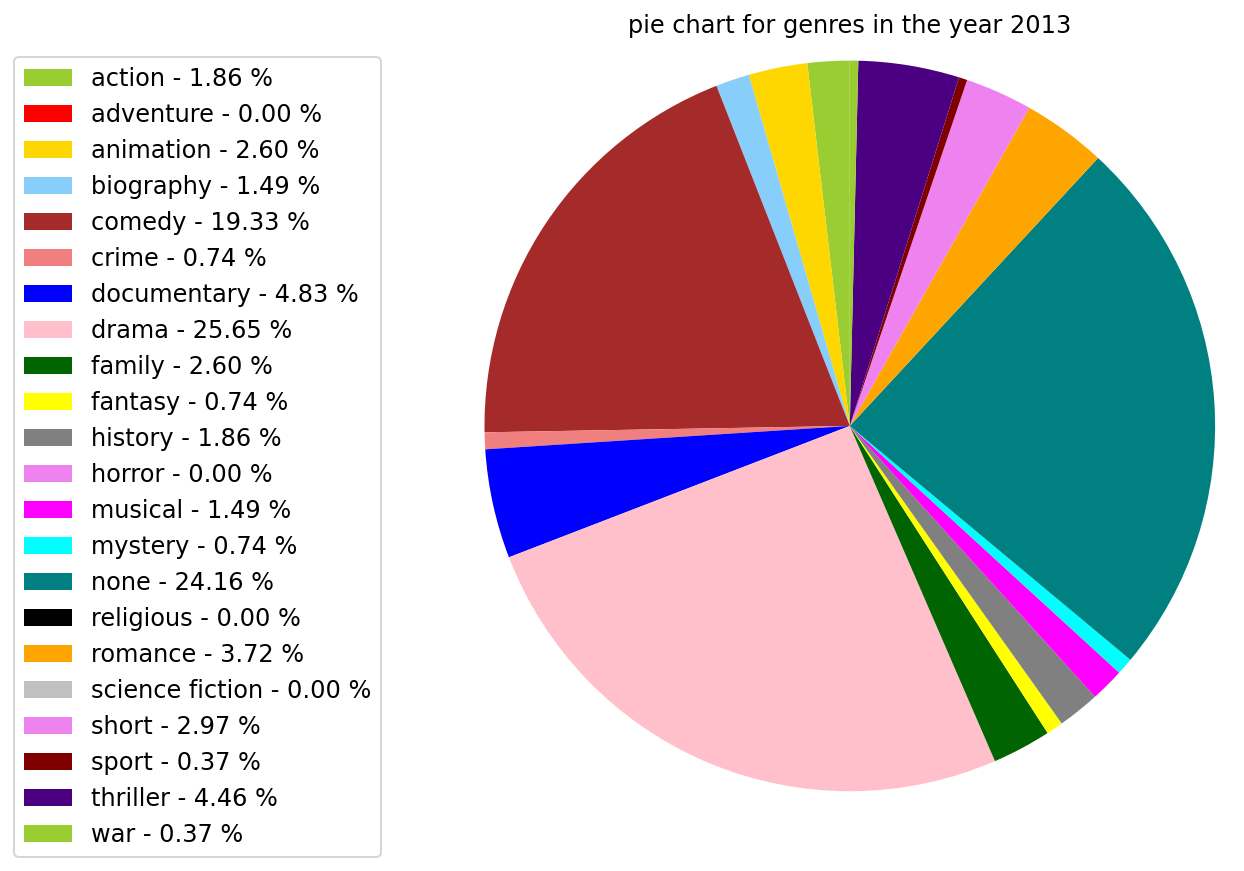

In [85]:
colors = ['yellowgreen','red','gold','lightskyblue','brown','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','teal','black','orange','silver','violet','maroon','indigo']
#to set the different colours in the pie chart
porcent = 100.*movies_bygenres2013/movies_bygenres2013.sum()
#to be able to show percentage in the legend, this code was made to calculate the percentage of each genre

patches, texts = plt.pie(movies_bygenres2013, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(movie_genres, porcent)]


plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title("pie chart for genres in the year 2013")

Text(0.5, 1.0, 'Bar Chart for the year 2014')

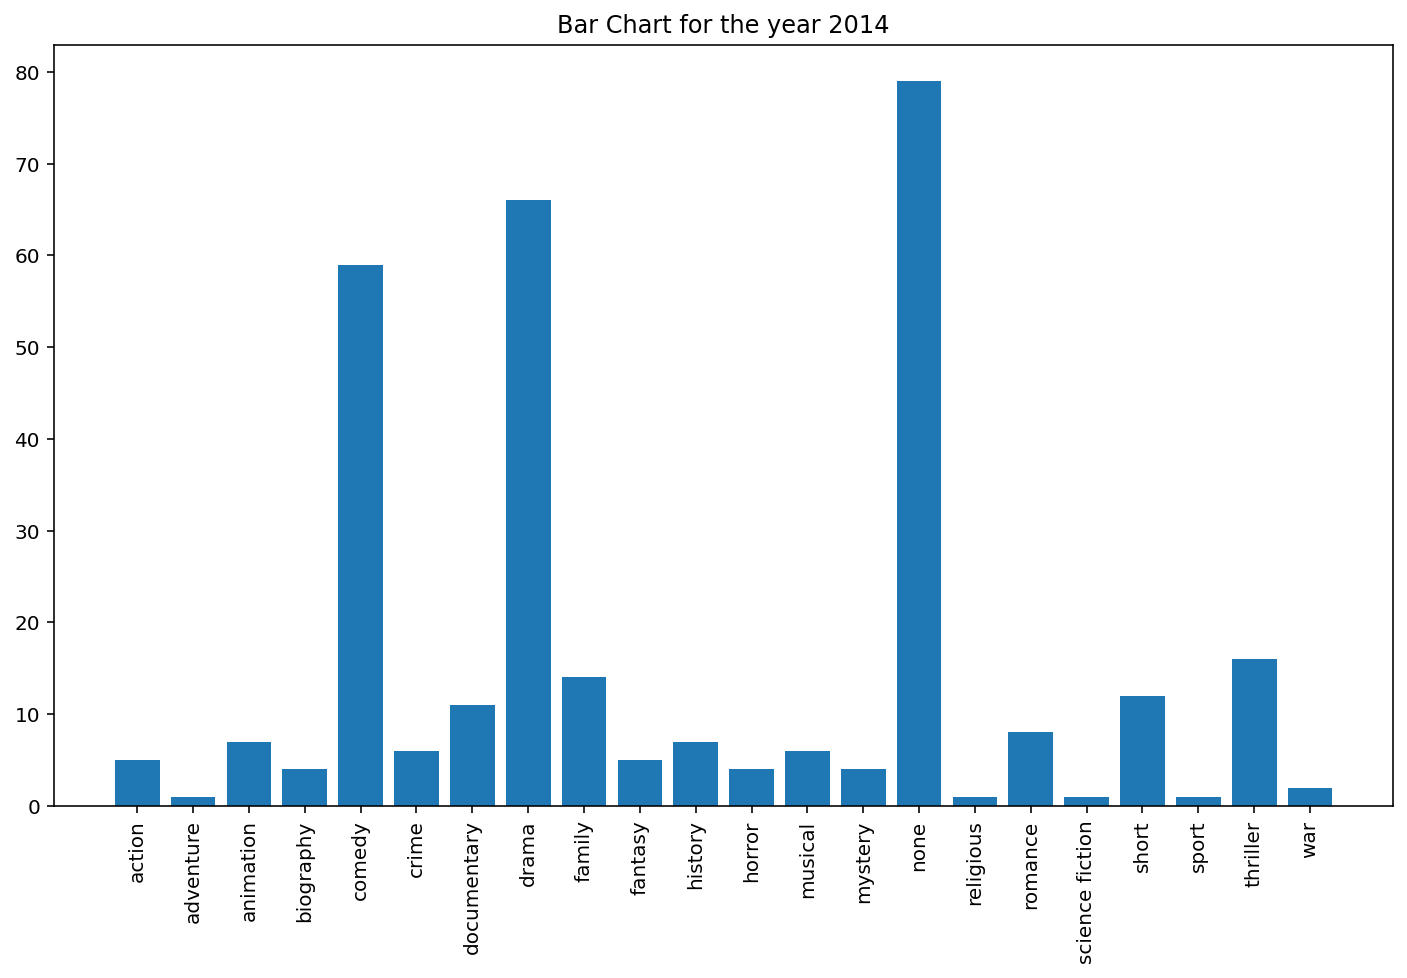

In [86]:
#code for bar chart for the number of the different genres of all the media types produced in the year 2014
bar_for2014= plt.bar(movie_genres,movies_bygenres2014)
plt.xticks(movie_genres, rotation=90) #to make x-axis labels vertical 
plt.title("Bar Chart for the year 2014")


Text(0.5, 1.0, 'pie chart for genres in the year 2014')

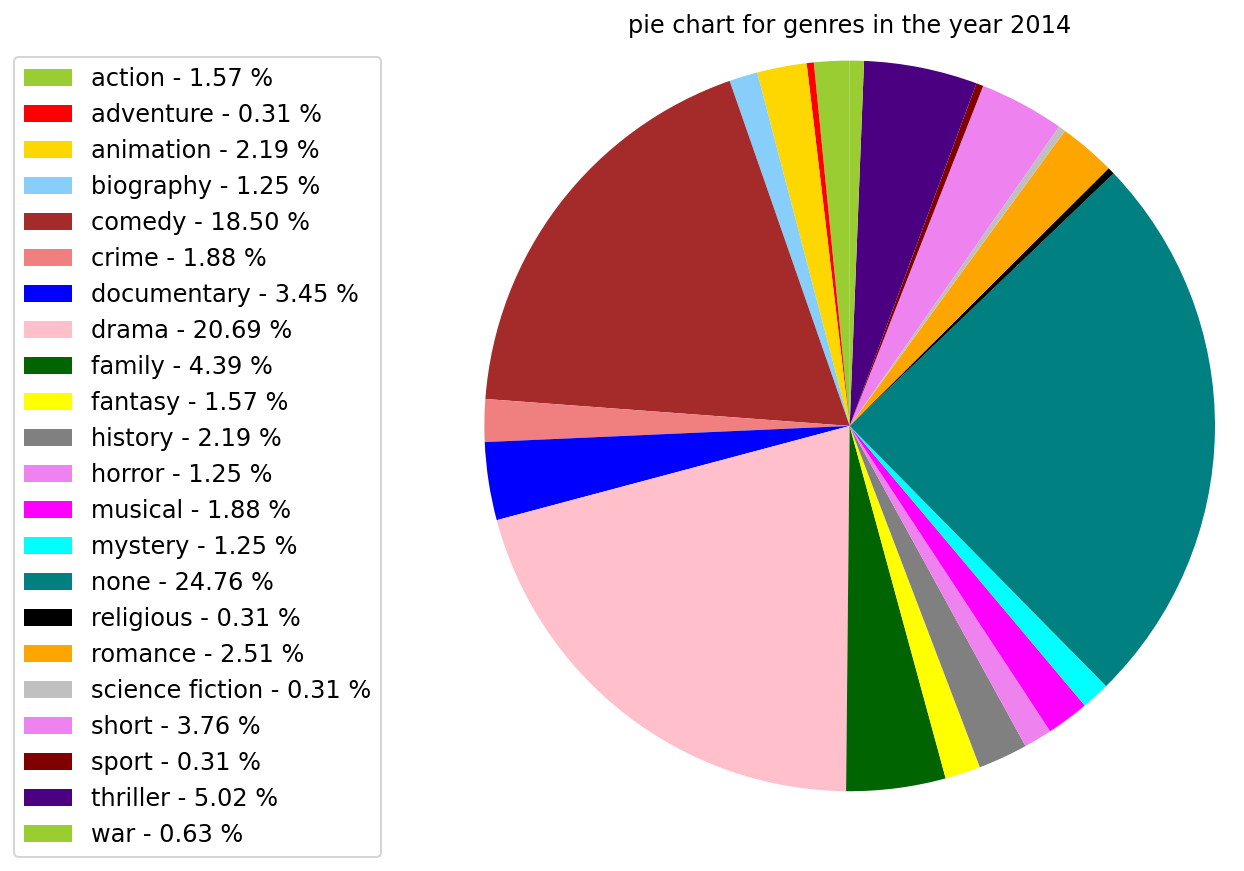

In [87]:
colors = ['yellowgreen','red','gold','lightskyblue','brown','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','teal','black','orange','silver','violet','maroon','indigo']
#to set the different colours in the pie chart
porcent = 100.*movies_bygenres2014/movies_bygenres2014.sum()
#to be able to show percentage in the legend, this code was made to calculate the percentage of each genre

patches, texts = plt.pie(movies_bygenres2014, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(movie_genres, porcent)]


plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title("pie chart for genres in the year 2014")

Text(0.5, 1.0, 'Bar Chart for the year 2015')

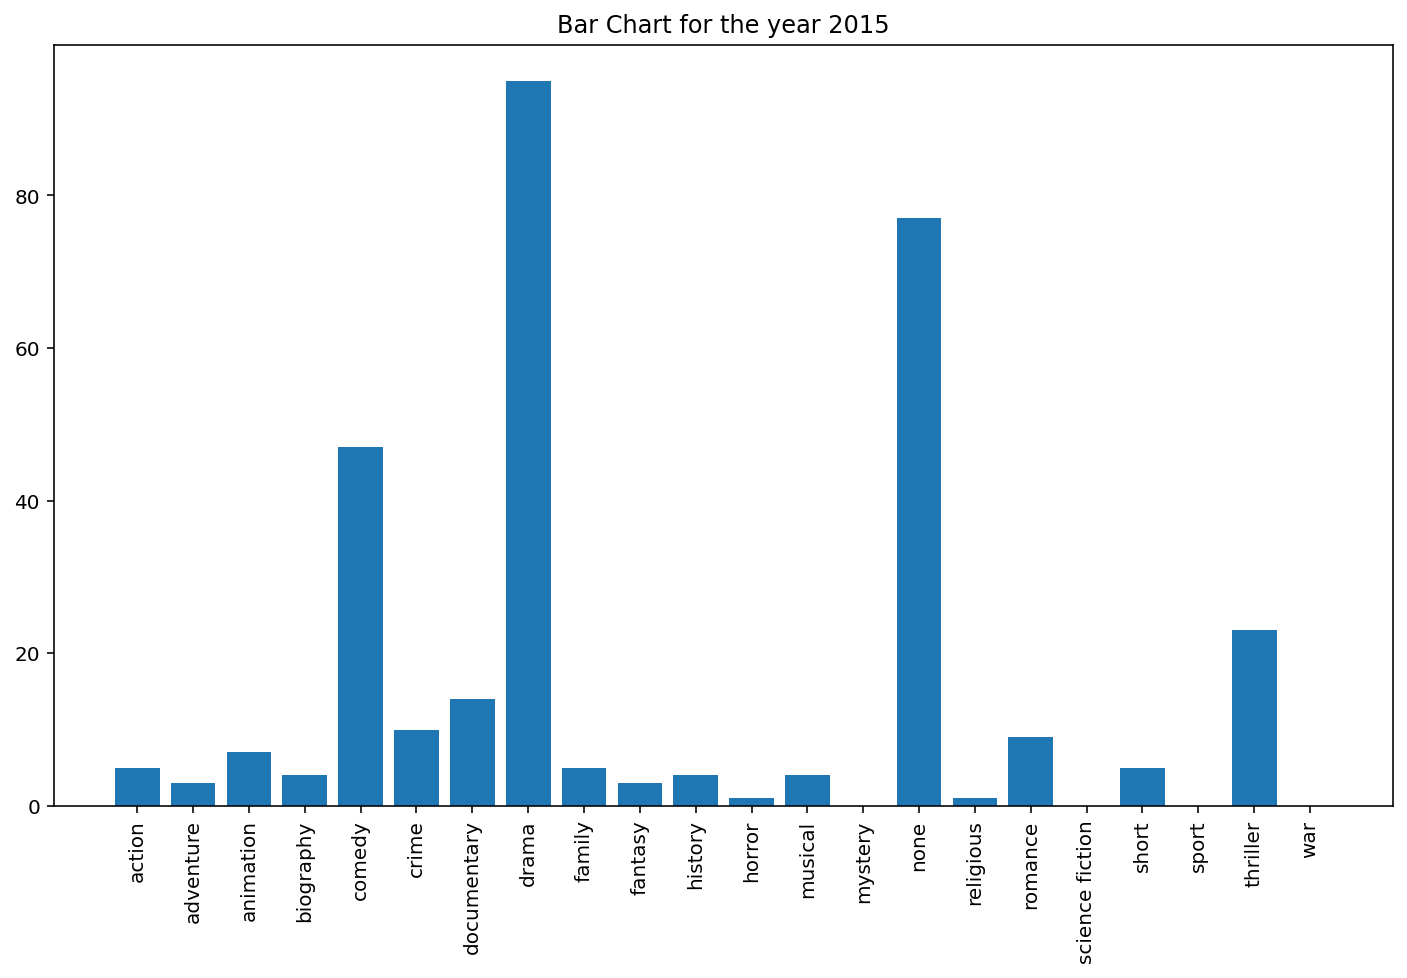

In [88]:
#code for bar chart for the number of the different genres of all the media types produced in the year 2015
bar_for2015= plt.bar(movie_genres,movies_bygenres2015)
plt.xticks(movie_genres, rotation=90) #to make x-axis labels vertical 
plt.title("Bar Chart for the year 2015")


Text(0.5, 1.0, 'pie chart for genres in the year 2015')

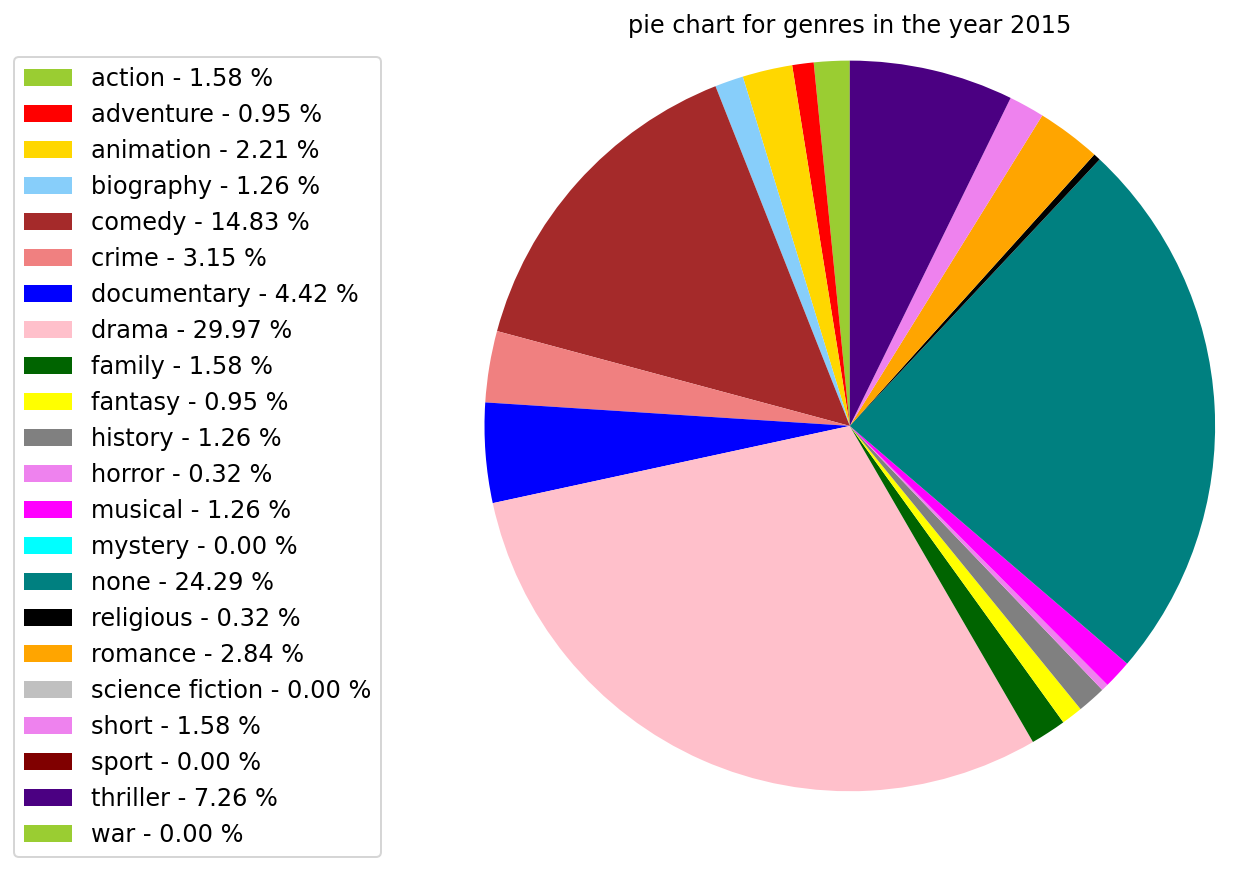

In [89]:
colors = ['yellowgreen','red','gold','lightskyblue','brown','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','teal','black','orange','silver','violet','maroon','indigo']
#to set the different colours in the pie chart
porcent = 100.*movies_bygenres2015/movies_bygenres2015.sum()
#to be able to show percentage in the legend, this code was made to calculate the percentage of each genre

patches, texts = plt.pie(movies_bygenres2015, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(movie_genres, porcent)]


plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title("pie chart for genres in the year 2015")

Text(0.5, 1.0, 'Bar Chart for the year 2016')

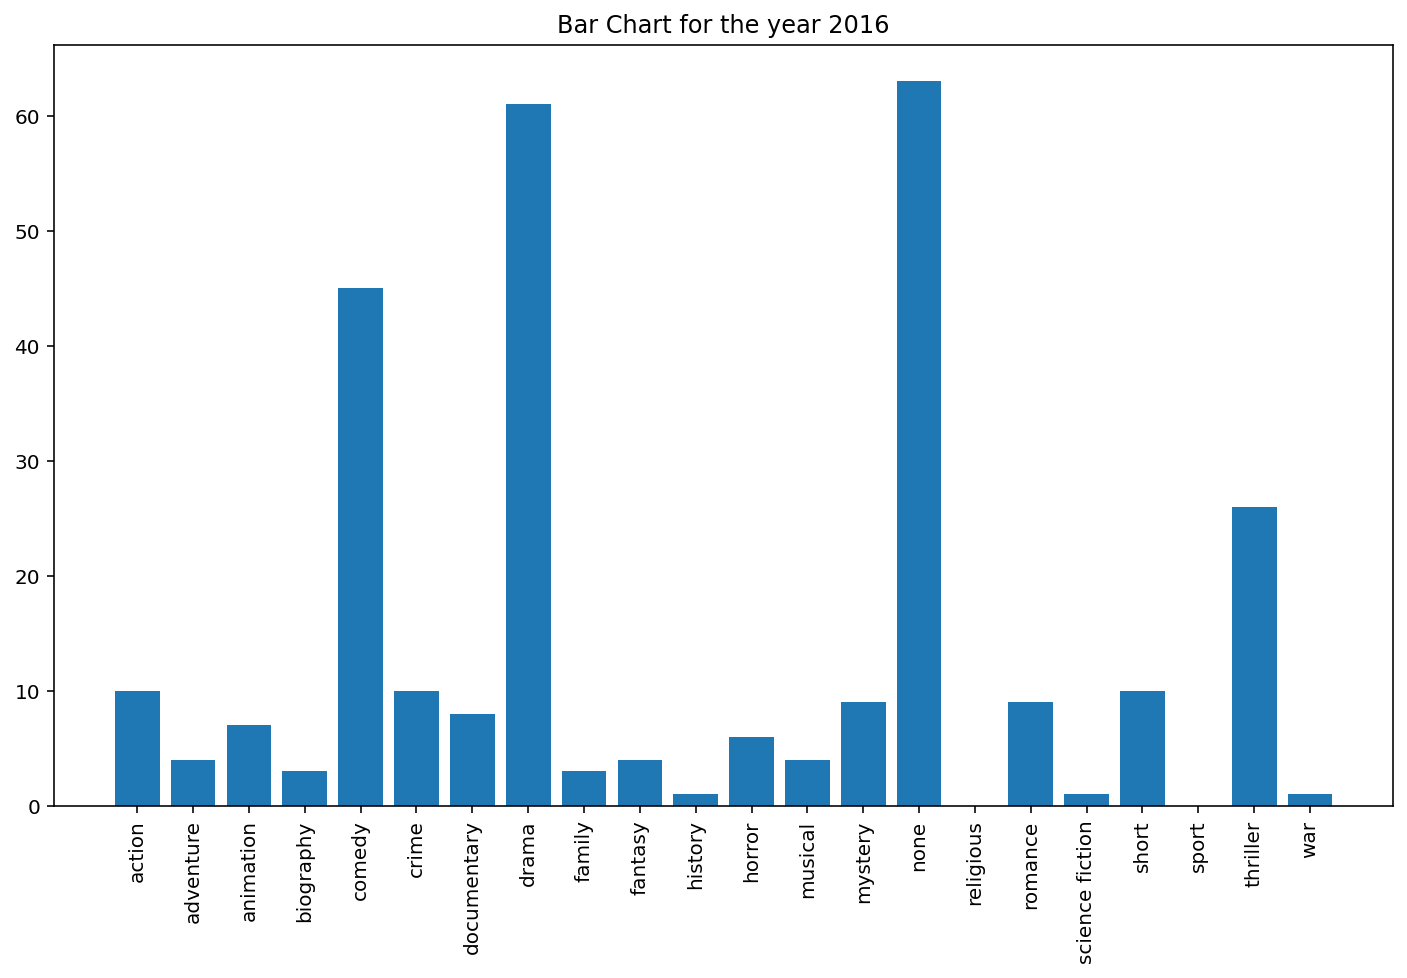

In [90]:
#code for bar chart for the number of the different genres of all the media types produced in the year 2016
bar_for2016= plt.bar(movie_genres,movies_bygenres2016)
plt.xticks(movie_genres, rotation=90) #to make x-axis labels vertical 
plt.title("Bar Chart for the year 2016")


Text(0.5, 1.0, 'pie chart for genres in the year 2016')

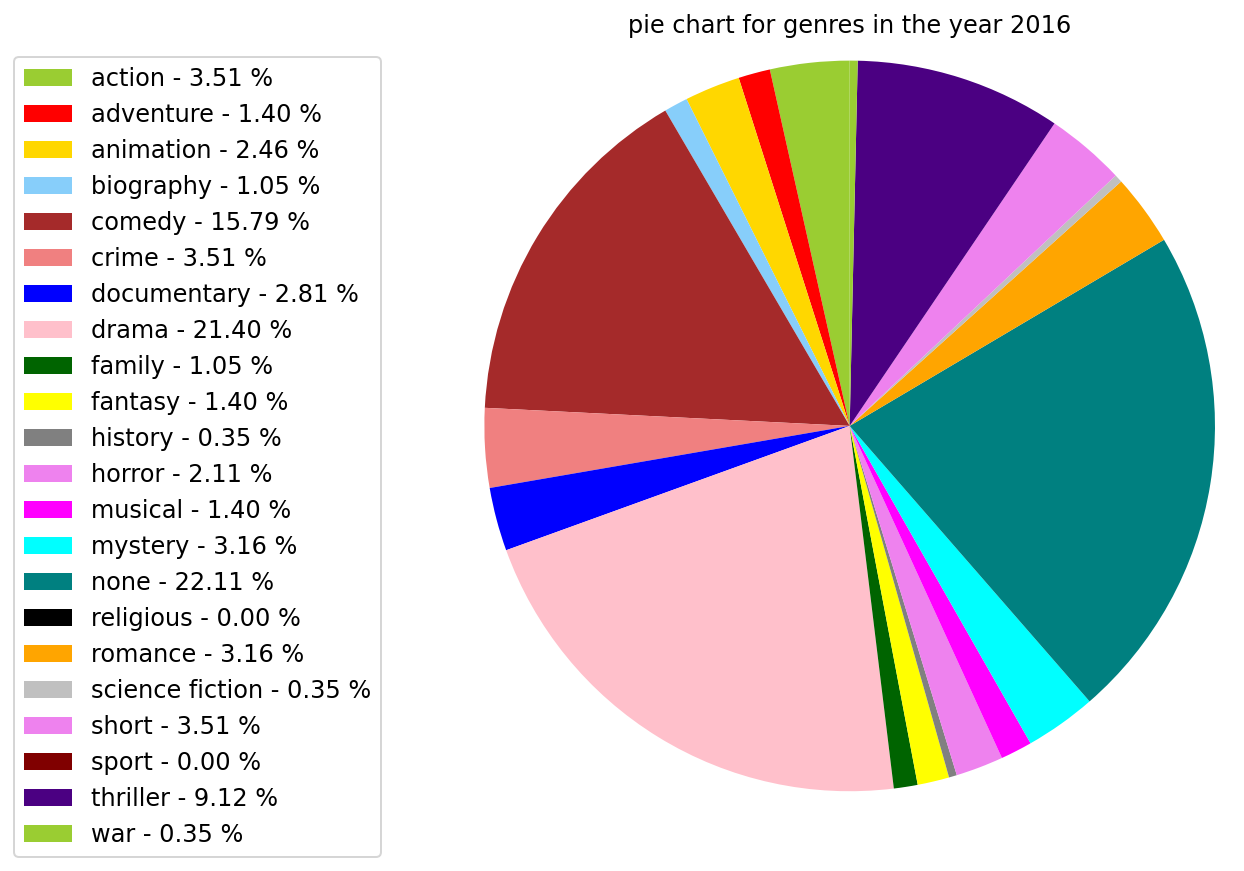

In [91]:
colors = ['yellowgreen','red','gold','lightskyblue','brown','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','teal','black','orange','silver','violet','maroon','indigo']
#to set the different colours in the pie chart
porcent = 100.*movies_bygenres2016/movies_bygenres2016.sum()
#to be able to show percentage in the legend, this code was made to calculate the percentage of each genre

patches, texts = plt.pie(movies_bygenres2016, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(movie_genres, porcent)]


plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title("pie chart for genres in the year 2016")

Text(0.5, 1.0, 'Bar Chart for the year 2017')

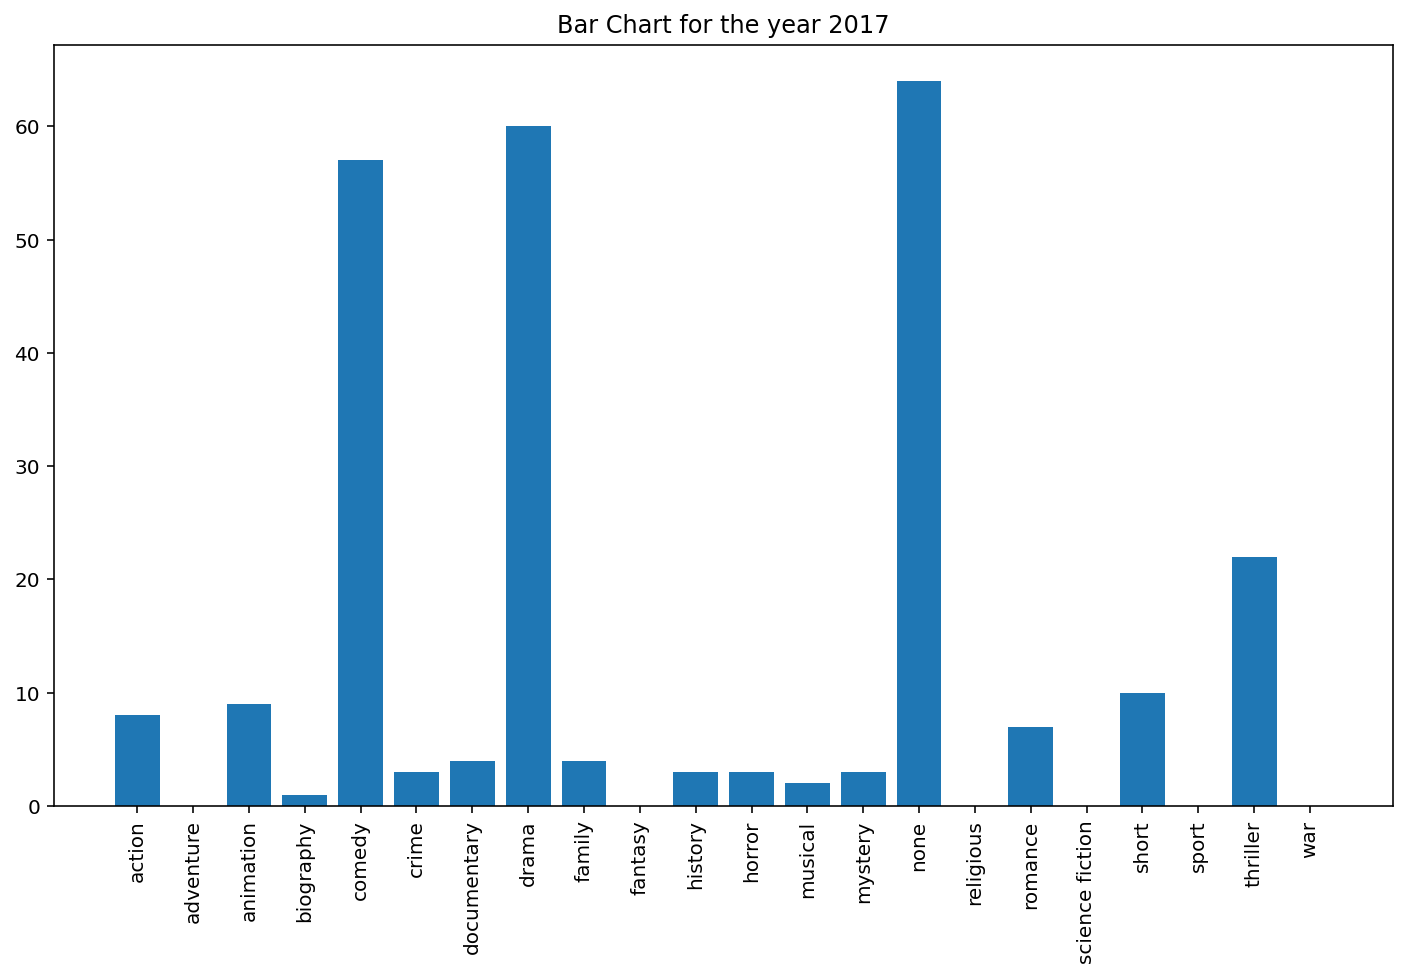

In [92]:
#code for bar chart for the number of the different genres of all the media types produced in the year 2017
bar_for2017= plt.bar(movie_genres,movies_bygenres2017)
plt.xticks(movie_genres, rotation=90) #to make x-axis labels vertical 
plt.title("Bar Chart for the year 2017")


Text(0.5, 1.0, 'pie chart for genres in the year 2017')

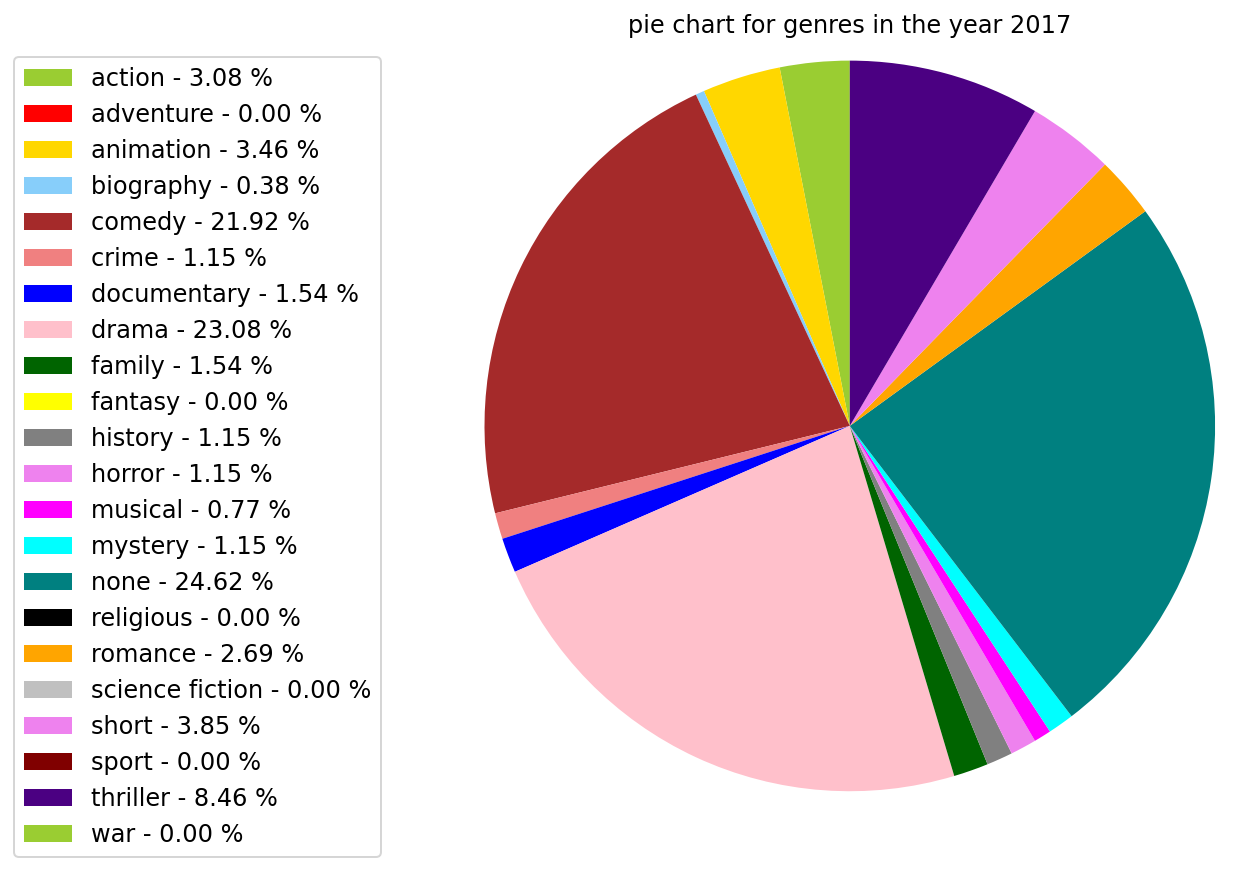

In [93]:
colors = ['yellowgreen','red','gold','lightskyblue','brown','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','teal','black','orange','silver','violet','maroon','indigo']
#to set the different colours in the pie chart
porcent = 100.*movies_bygenres2017/movies_bygenres2017.sum()
#to be able to show percentage in the legend, this code was made to calculate the percentage of each genre

patches, texts = plt.pie(movies_bygenres2017, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(movie_genres, porcent)]

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title("pie chart for genres in the year 2017")

Text(0.5, 1.0, 'Bar Chart for the year 2018')

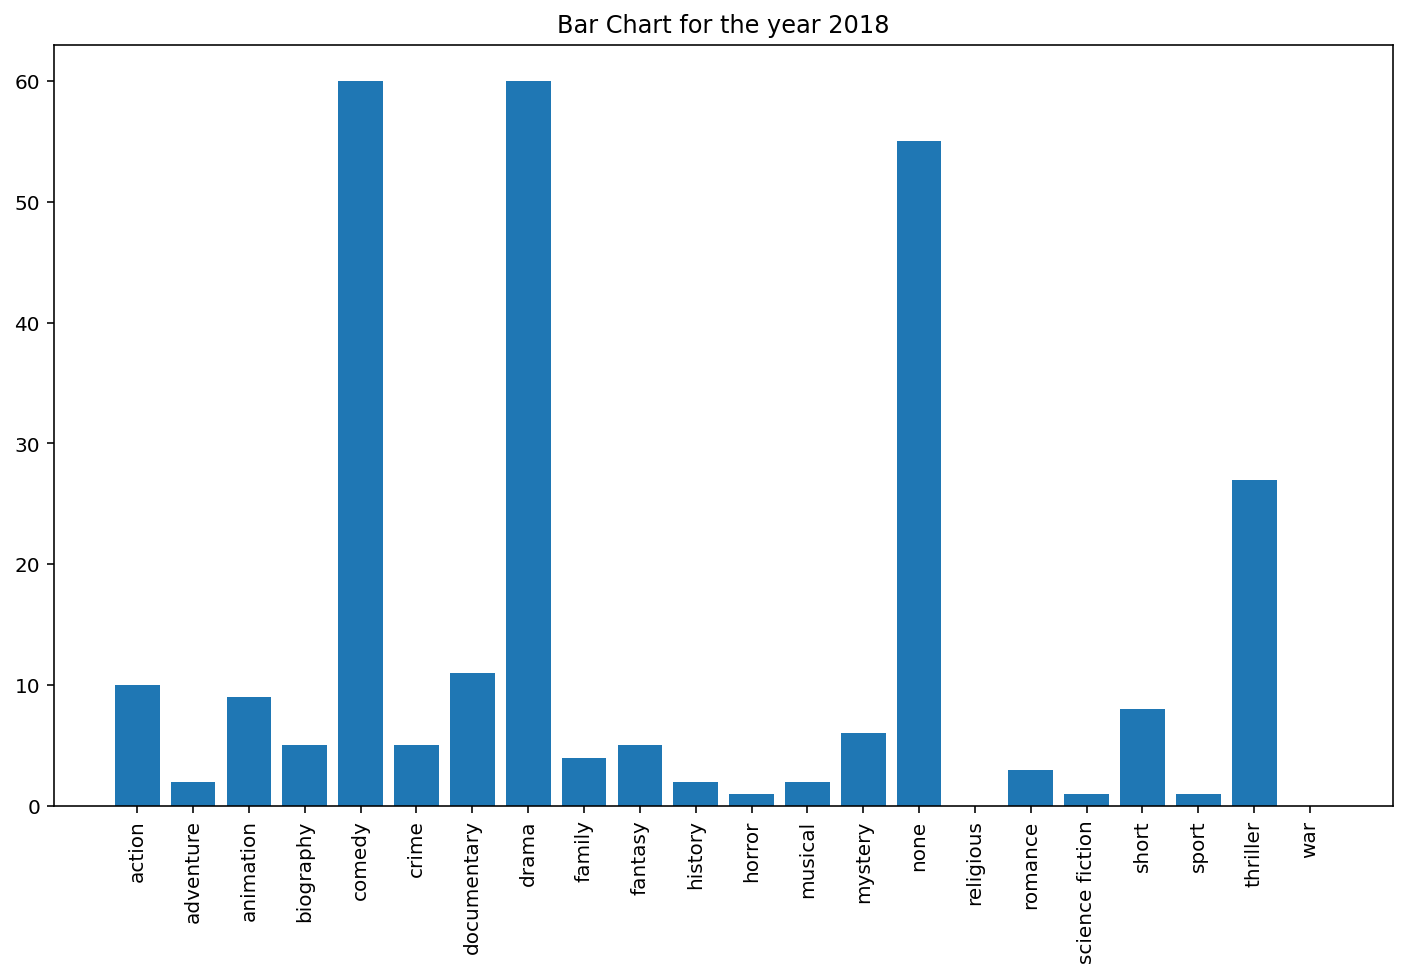

In [94]:
#code for bar chart for the number of the different genres of all the media types produced in the year 2018
bar_for2018= plt.bar(movie_genres,movies_bygenres2018)
plt.xticks(movie_genres, rotation=90) #to make x-axis labels vertical 
plt.title("Bar Chart for the year 2018")


Text(0.5, 1.0, 'pie chart for genres in the year 2018')

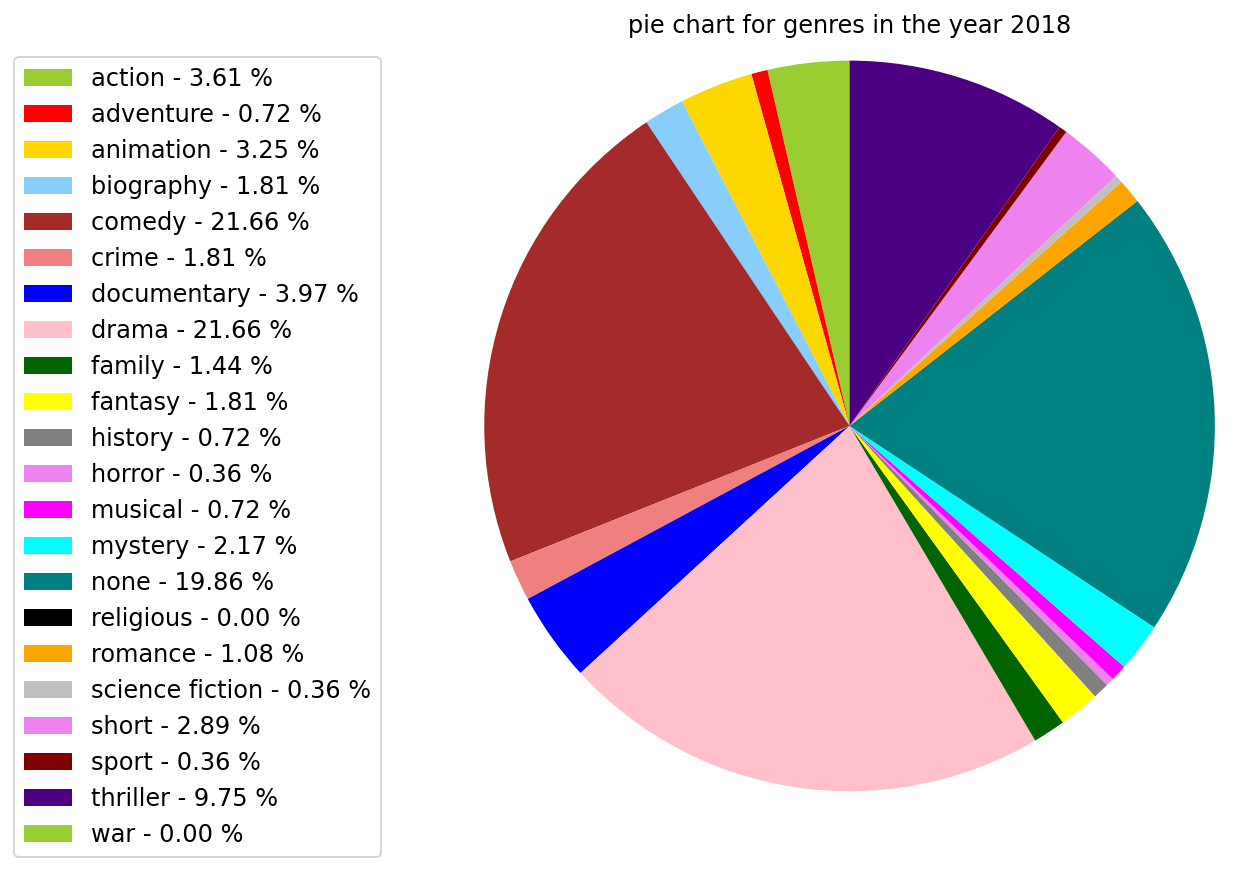

In [95]:
colors = ['yellowgreen','red','gold','lightskyblue','brown','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','teal','black','orange','silver','violet','maroon','indigo']
#to set the different colours in the pie chart
porcent = 100.*movies_bygenres2018/movies_bygenres2018.sum()
#to be able to show percentage in the legend, this code was made to calculate the percentage of each genre

patches, texts = plt.pie(movies_bygenres2018, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(movie_genres, porcent)]

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title("pie chart for genres in the year 2018")

Text(0.5, 1.0, 'Bar Chart for the year 2019')

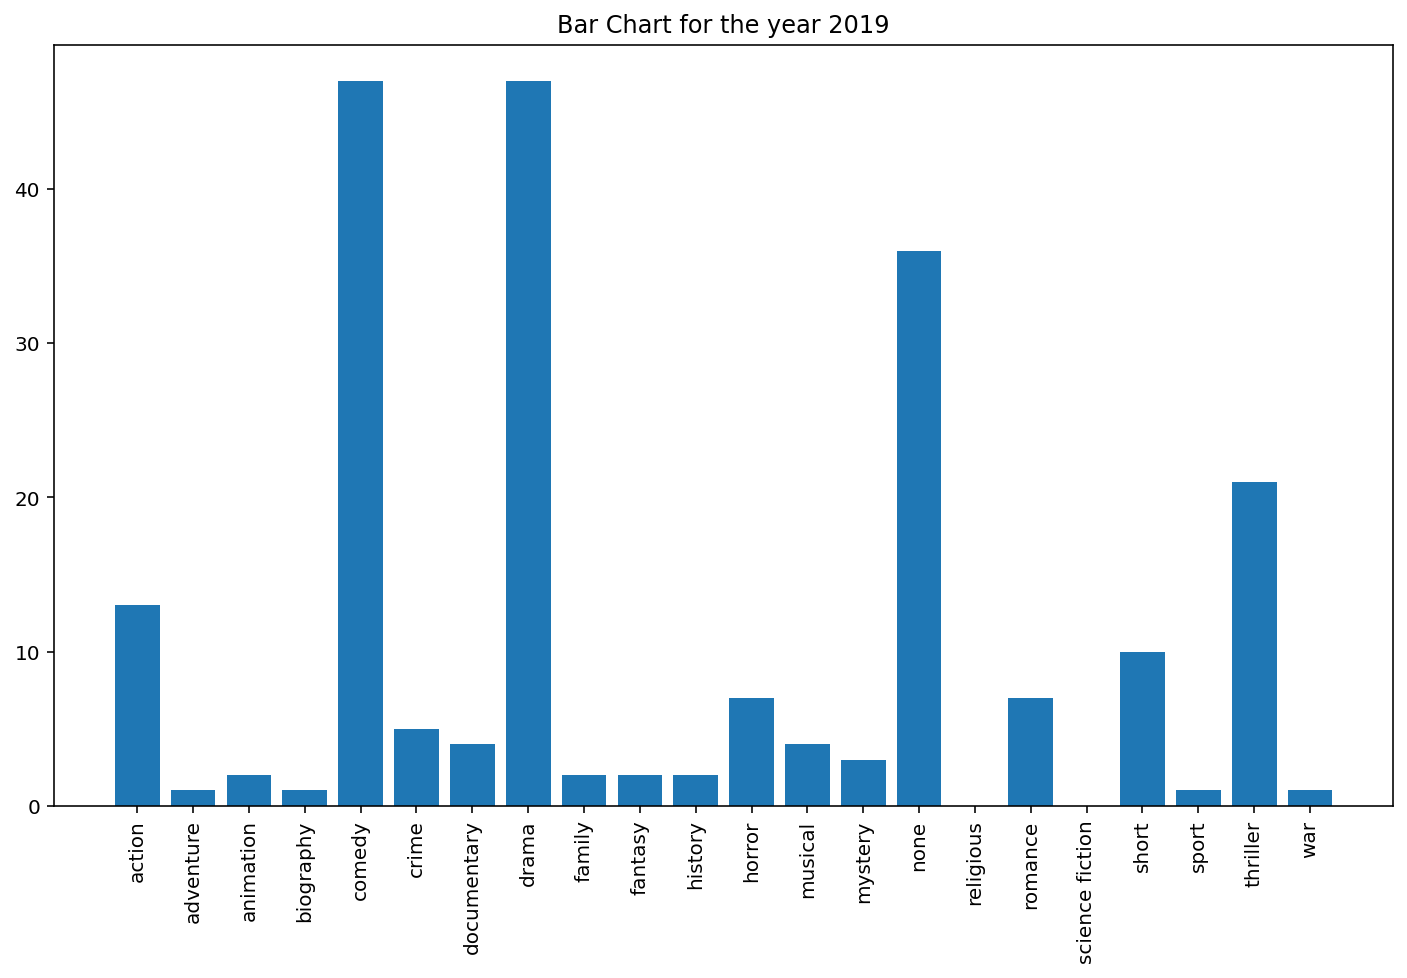

In [96]:
#code for bar chart for the number of the different genres of all the media types produced in the year 2019
bar_for2019= plt.bar(movie_genres,movies_bygenres2019)
plt.xticks(movie_genres, rotation=90) #to make x-axis labels vertical 
plt.title("Bar Chart for the year 2019")


Text(0.5, 1.0, 'pie chart for genres in the year 2019')

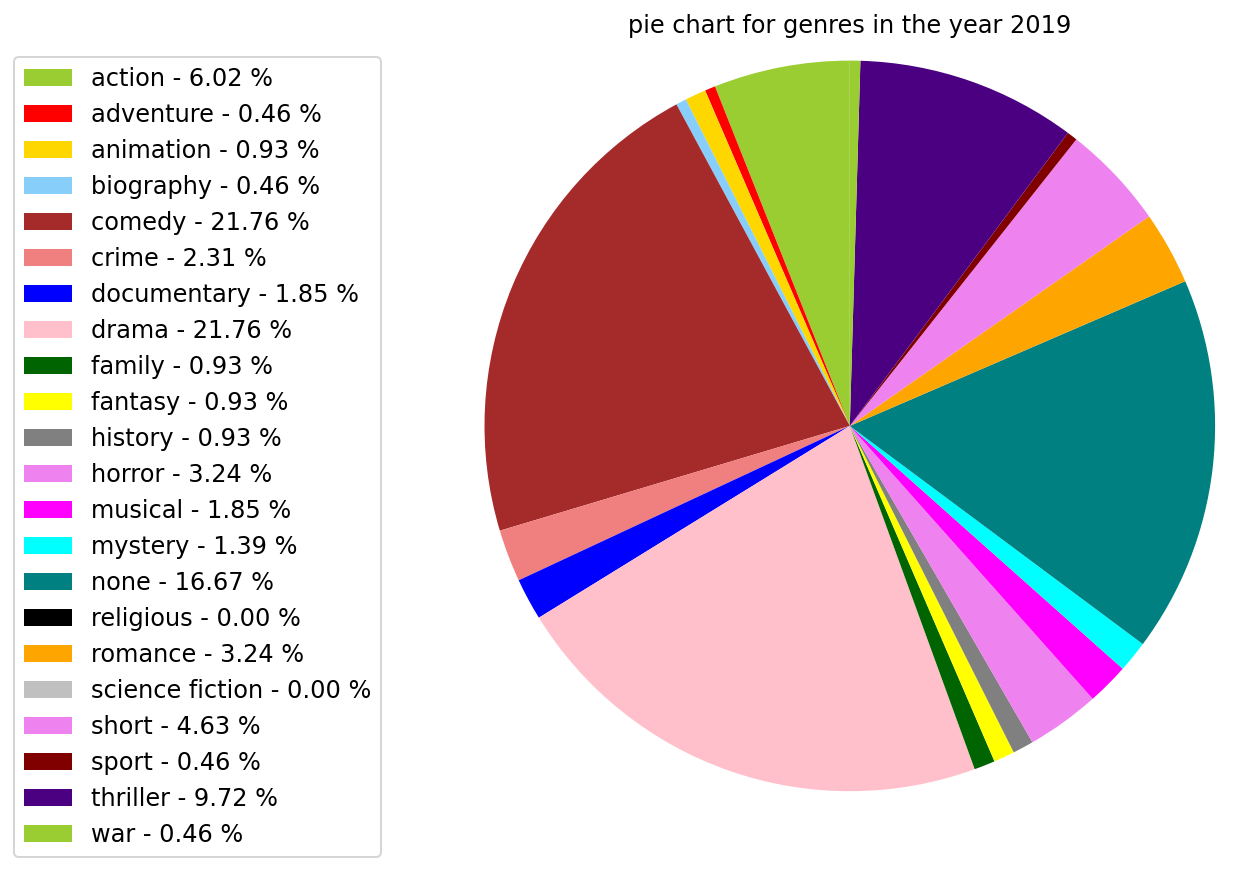

In [97]:
colors = ['yellowgreen','red','gold','lightskyblue','brown','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','teal','black','orange','silver','violet','maroon','indigo']
#to set the different colours in the pie chart
porcent = 100.*movies_bygenres2019/movies_bygenres2019.sum()
#to be able to show percentage in the legend, this code was made to calculate the percentage of each genre

patches, texts = plt.pie(movies_bygenres2019, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(movie_genres, porcent)]


plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title("pie chart for genres in the year 2019")

Text(0.5, 1.0, 'Bar Chart for the year 2020')

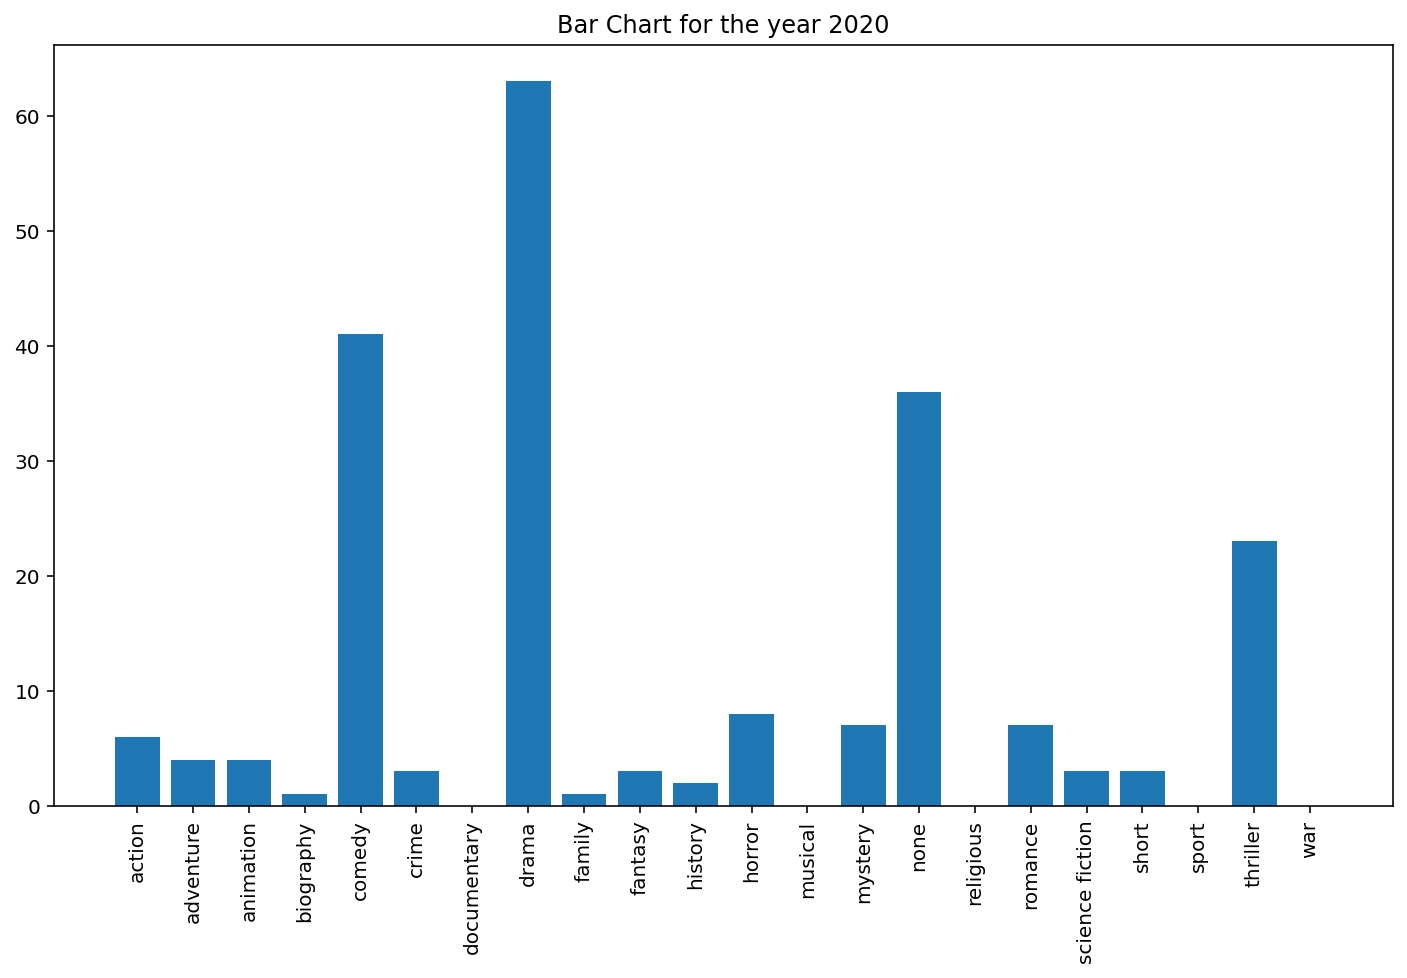

In [98]:
#code for bar chart for the number of the different genres of all the media types produced in the year 2020
bar_for2020= plt.bar(movie_genres,movies_bygenres2020)
plt.xticks(movie_genres, rotation=90) #to make x-axis labels vertical 
plt.title("Bar Chart for the year 2020")


Text(0.5, 1.0, 'pie chart for genres in the year 2020')

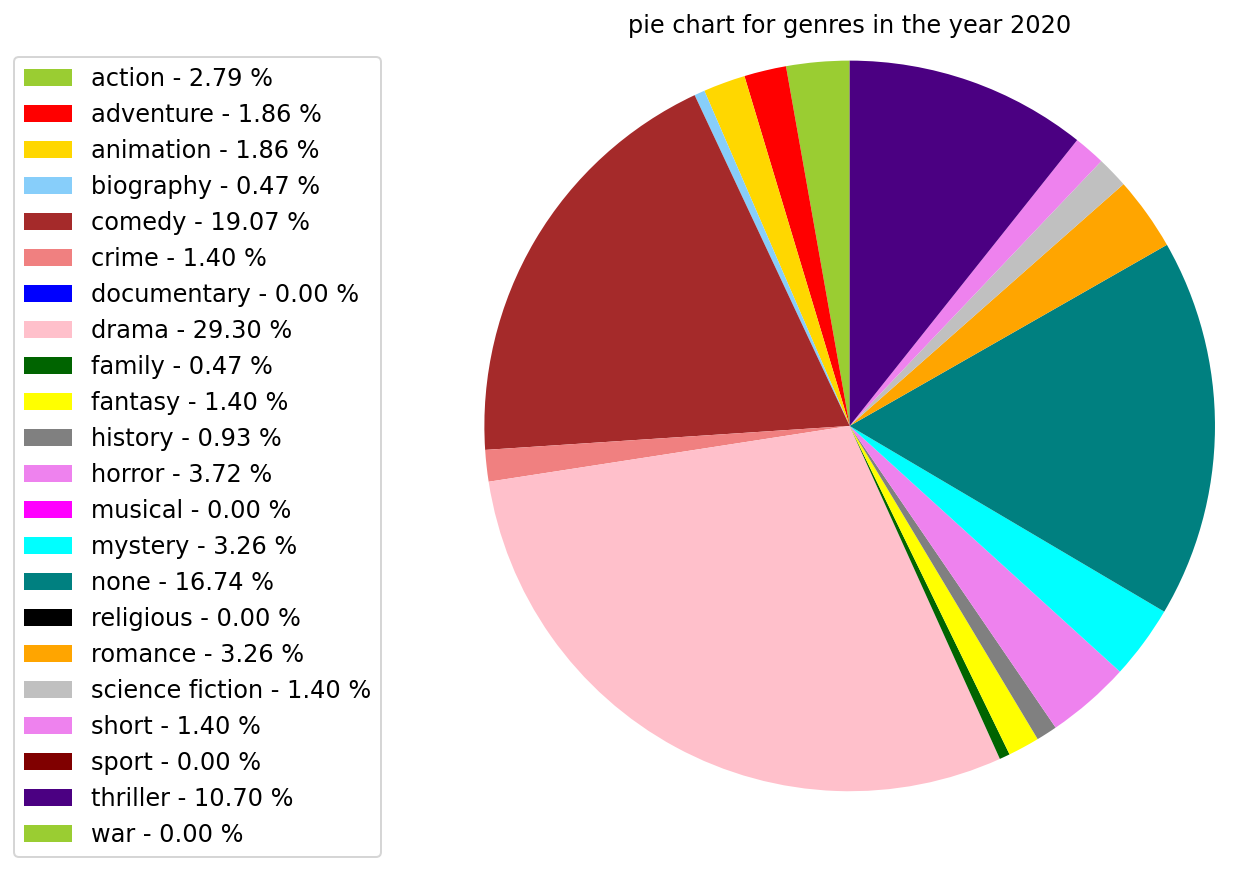

In [99]:
colors = ['yellowgreen','red','gold','lightskyblue','brown','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','teal','black','orange','silver','violet','maroon','indigo']
#to set the different colours in the pie chart
porcent = 100.*movies_bygenres2020/movies_bygenres2020.sum()
#to be able to show percentage in the legend, this code was made to calculate the percentage of each genre

patches, texts = plt.pie(movies_bygenres2020, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(movie_genres, porcent)]


plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title("pie chart for genres in the year 2020")

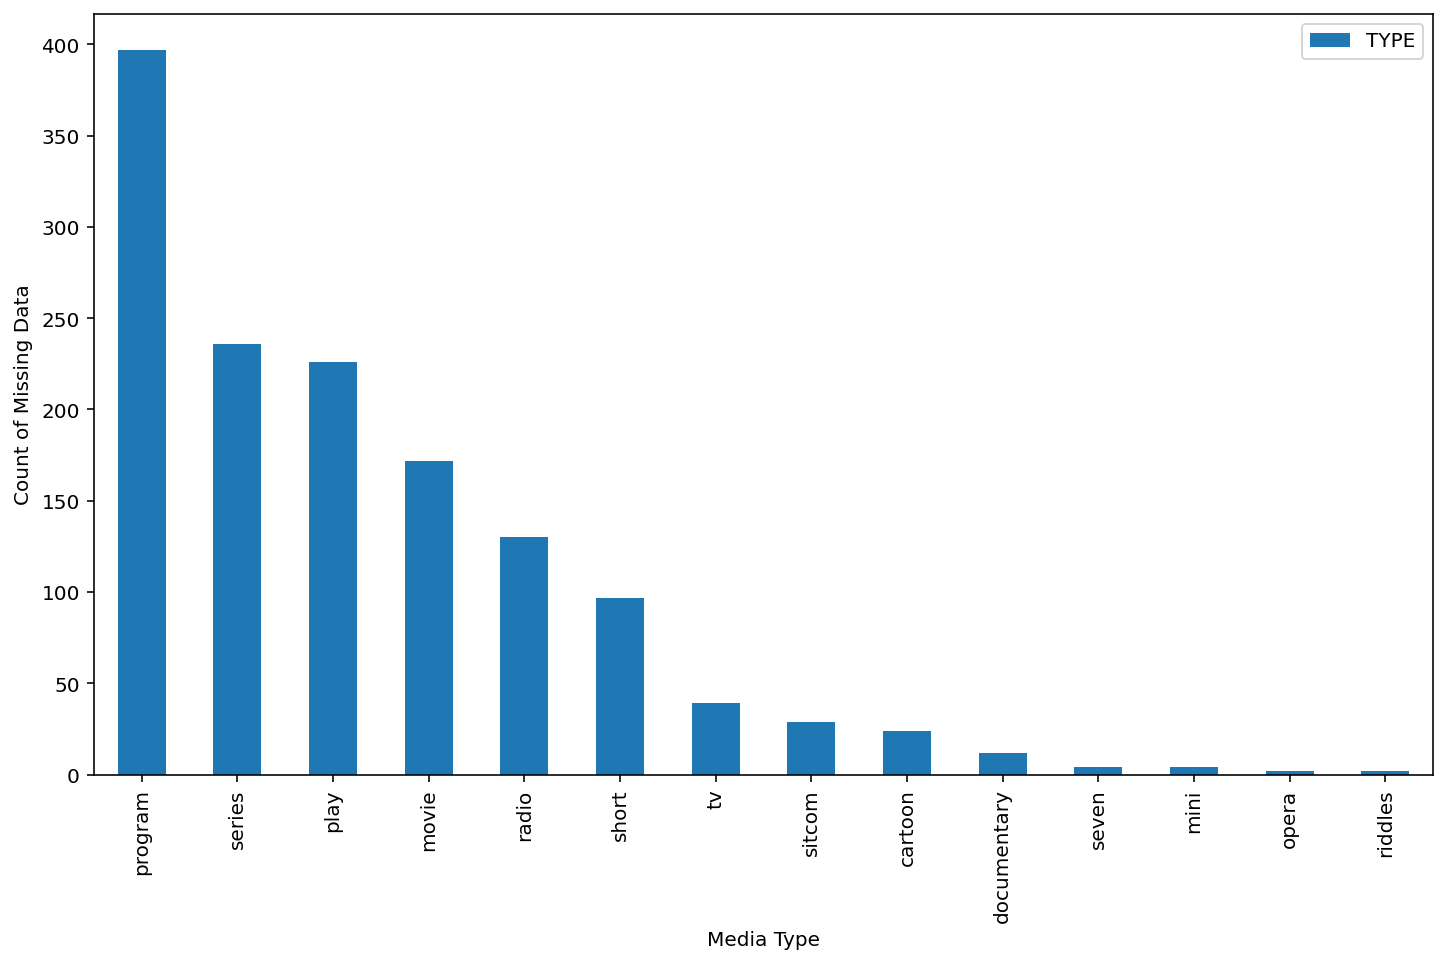

In [100]:
#seperating the media rype with missing genre data
missingd= df_new.loc[df_new['GENRES']=='none']
missingd

#selecting the media types column with missing data
mediat_missingd= missingd['TYPE']
mediat_missingd

#creating a data frame with the value counts of each media type and it's missing data 
missing_data_df= mediat_missingd.value_counts().to_frame()
missing_data_df

#plotting the bar chart
missing_data_df.plot(kind = 'bar')
plt.xlabel('Media Type')
plt.ylabel('Count of Missing Data')
plt.show()